In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [2]:
# Importing the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Set Rows and columns to max for full view
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)

In [4]:
# Reading the dataset
app_df = pd.read_csv(r'E:\upGrad & IIITB  Data Science Program\Credit EDA Case Study Assignment\Case Study data\application_data.csv')

In [5]:
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [6]:
# Number of rows and columns
app_df.shape

(307511, 122)

In [7]:
app_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [8]:
# Column wise datatype
app_df.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [9]:
# Number of values present in every column
app_df.count()

SK_ID_CURR                      307511
TARGET                          307511
NAME_CONTRACT_TYPE              307511
CODE_GENDER                     307511
FLAG_OWN_CAR                    307511
FLAG_OWN_REALTY                 307511
CNT_CHILDREN                    307511
AMT_INCOME_TOTAL                307511
AMT_CREDIT                      307511
AMT_ANNUITY                     307499
AMT_GOODS_PRICE                 307233
NAME_TYPE_SUITE                 306219
NAME_INCOME_TYPE                307511
NAME_EDUCATION_TYPE             307511
NAME_FAMILY_STATUS              307511
NAME_HOUSING_TYPE               307511
REGION_POPULATION_RELATIVE      307511
DAYS_BIRTH                      307511
DAYS_EMPLOYED                   307511
DAYS_REGISTRATION               307511
DAYS_ID_PUBLISH                 307511
OWN_CAR_AGE                     104582
FLAG_MOBIL                      307511
FLAG_EMP_PHONE                  307511
FLAG_WORK_PHONE                 307511
FLAG_CONT_MOBILE         

In [10]:
# Check missing values
app_df.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [11]:
# Taking rows with less than 50% data missing
app_df = app_df.loc[:, app_df.isnull().mean() <=0.5]
app_df.shape

(307511, 81)

In [12]:
app_df.isnull().sum().sort_values(ascending=False)

FLOORSMAX_AVG                   153020
FLOORSMAX_MODE                  153020
FLOORSMAX_MEDI                  153020
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BEGINEXPLUATATION_MEDI    150007
TOTALAREA_MODE                  148431
EMERGENCYSTATE_MODE             145755
OCCUPATION_TYPE                  96391
EXT_SOURCE_3                     60965
AMT_REQ_CREDIT_BUREAU_YEAR       41519
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
NAME_TYPE_SUITE                   1292
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
DEF_60_CNT_SOCIAL_CIRCLE          1021
OBS_30_CNT_SOCIAL_CIRCLE          1021
EXT_SOURCE_2                       660
AMT_GOODS_PRICE                    278
AMT_ANNUITY                         12
CNT_FAM_MEMBERS                      2
DAYS_LAST_PHONE_CHANGE   

In [13]:
nulls = app_df.isnull().sum()
nulls[nulls>0]

AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
OCCUPATION_TYPE                  96391
CNT_FAM_MEMBERS                      2
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
YEARS_BEGINEXPLUATATION_AVG     150007
FLOORSMAX_AVG                   153020
YEARS_BEGINEXPLUATATION_MODE    150007
FLOORSMAX_MODE                  153020
YEARS_BEGINEXPLUATATION_MEDI    150007
FLOORSMAX_MEDI                  153020
TOTALAREA_MODE                  148431
EMERGENCYSTATE_MODE             145755
OBS_30_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
DEF_60_CNT_SOCIAL_CIRCLE          1021
DAYS_LAST_PHONE_CHANGE               1
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_YEA

In [14]:
df_missing = app_df.count() / len(app_df)
df_missing

SK_ID_CURR                      1.000000
TARGET                          1.000000
NAME_CONTRACT_TYPE              1.000000
CODE_GENDER                     1.000000
FLAG_OWN_CAR                    1.000000
FLAG_OWN_REALTY                 1.000000
CNT_CHILDREN                    1.000000
AMT_INCOME_TOTAL                1.000000
AMT_CREDIT                      1.000000
AMT_ANNUITY                     0.999961
AMT_GOODS_PRICE                 0.999096
NAME_TYPE_SUITE                 0.995799
NAME_INCOME_TYPE                1.000000
NAME_EDUCATION_TYPE             1.000000
NAME_FAMILY_STATUS              1.000000
NAME_HOUSING_TYPE               1.000000
REGION_POPULATION_RELATIVE      1.000000
DAYS_BIRTH                      1.000000
DAYS_EMPLOYED                   1.000000
DAYS_REGISTRATION               1.000000
DAYS_ID_PUBLISH                 1.000000
FLAG_MOBIL                      1.000000
FLAG_EMP_PHONE                  1.000000
FLAG_WORK_PHONE                 1.000000
FLAG_CONT_MOBILE

Checking the percentage values missing in each column

In [15]:
df_missing = (1-df_missing)*100
df_missing

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

In [16]:
df_missing.sort_values(ascending=False)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

Missing value treatment
Some of the columns have around 50% missing values. These missing values are mostly replaced with the help of either mean, median or mode.

# Data Cleaning

In [17]:
app_df[app_df['AMT_ANNUITY'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
47531       155054       0         Cash loans           M            N   
50035       157917       0         Cash loans           F            N   
51594       159744       0         Cash loans           F            N   
55025       163757       0         Cash loans           F            N   
59934       169487       0         Cash loans           M            Y   
75873       187985       0         Cash loans           M            Y   
89343       203726       0         Cash loans           F            Y   
123872      243648       0         Cash loans           F            N   
207186      340147       0         Cash loans           M            N   
227939      364022       0         Cash loans           F            N   
239329      377174       0         Cash loans           F            N   
241835      379997       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
47531                N             0          180000.0    450000.0   
50035                N             0           94500.0    450000.0   
51594                N             0          202500.0    539100.0   
55025                N             0          162000.0    296280.0   
59934                N             0          202500.0    360000.0   
75873                N             0          144000.0    219249.0   
89343                N             0           90000.0    157500.0   
123872               Y             0          202500.0    929088.0   
207186               N             0          171000.0    486000.0   
227939               Y             0          315000.0    628069.5   
239329               Y             0          157500.0    792000.0   
241835               N             0          315000.0   1483231.5   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
47531           NaN         450000.0   Unaccompanied  Commercial associate   
50035           NaN         450000.0   Unaccompanied               Working   
51594           NaN         450000.0   Unaccompanied               Working   
55025           NaN         225000.0   Unaccompanied         State servant   
59934           NaN         360000.0   Unaccompanied               Working   
75873           NaN         166500.0   Unaccompanied               Working   
89343           NaN         157500.0   Unaccompanied         State servant   
123872          NaN         720000.0   Unaccompanied               Working   
207186          NaN         486000.0   Unaccompanied  Commercial associate   
227939          NaN         499500.0   Unaccompanied  Commercial associate   
239329          NaN         792000.0          Family         State servant   
241835          NaN        1354500.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
47531               Incomplete higher  Single / not married   
50035                 Lower secondary        Civil marriage   
51594   Secondary / secondary special               Married   
55025                Higher education               Married   
59934   Secondary / secondary special  Single / not married   
75873                Higher education  Single / not married   
89343   Secondary / secondary special               Married   
123872  Secondary / secondary special        Civil marriage   
207186               Higher education               Married   
227939               Higher education               Married   
239329  Secondary / secondary special               Married   
241835               Higher education               Married   

          NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
47531     House / apartment                    0.026392      -10668   
50035     House / apartment                    0.035792       -9027   
51594     House / apartment                    0.046220      -17376   
55025     House

In [18]:
app_df[app_df['NAME_TYPE_SUITE'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
64          100076       0         Cash loans           M            Y   
724         100837       0    Revolving loans           F            N   
1199        101414       0         Cash loans           M            Y   
1669        101954       0         Cash loans           F            Y   
1862        102183       0         Cash loans           F            Y   
...            ...     ...                ...         ...          ...   
306273      454852       0    Revolving loans           M            N   
306544      455158       0         Cash loans           F            N   
306615      455245       0         Cash loans           M            N   
306636      455270       0         Cash loans           M            Y   
306725      455367       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
64                   N             0          180000.0    315000.0   
724                  Y             2           45000.0    135000.0   
1199                 N             0          135000.0    533668.5   
1669                 N             2          153000.0   1162170.0   
1862                 N             0          121500.0    268659.0   
...                ...           ...               ...         ...   
306273               Y             2           67500.0    202500.0   
306544               N             0          180000.0    894825.0   
306615               N             0          180000.0    225000.0   
306636               N             2          189000.0    677664.0   
306725               Y             0          202500.0    755190.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
64           9679.5         315000.0             NaN  Commercial associate   
724          6750.0              NaN             NaN  Commercial associate   
1199        34636.5         477000.0             NaN               Working   
1669        30654.0         832500.0             NaN         State servant   
1862        13774.5         243000.0             NaN  Commercial associate   
...             ...              ...             ...                   ...   
306273      10125.0              NaN             NaN               Working   
306544      23602.5         894825.0             NaN  Commercial associate   
306615       8469.0         225000.0             NaN  Commercial associate   
306636      21406.5         585000.0             NaN         State servant   
306725      27985.5         675000.0             NaN             Pensioner   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
64      Secondary / secondary special               Married   
724     Secondary / secondary special               Married   
1199    Secondary / secondary special        Civil marriage   
1669                 Higher education             Separated   
1862    Secondary / secondary special               Married   
...                               ...                   ...   
306273               Higher education               Married   
306544  Secondary / secondary special  Single / not married   
306615               Higher education               Married   
306636               Higher education               Married   
306725  Secondary / secondary special                 Widow   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
64      House / apartment                    0.028663      -13866   
724     House / apartment                    0.024610      -10072   
1199    House / apartment                    0.046220      -21717   
1669    House / apartment                    0.024610      -12975   
1862    House / apartment                    0.010147      -12870   
...                   ...                         ...         ...   
306273  House / apartment                    0.020713      -14079   
306544  House / apartment       

In [19]:
app_df['NAME_TYPE_SUITE'].value_counts(dropna=False)

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1292
Other_A               866
Group of people       271
Name: count, dtype: int64

In [20]:
app_df['NAME_TYPE_SUITE'].fillna(value=(app_df['NAME_TYPE_SUITE'].mode()[0]), inplace = True)

In [21]:
app_df['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [22]:
app_df['FLOORSMAX_AVG'].head()

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
Name: FLOORSMAX_AVG, dtype: float64

In [23]:
app_df['FLOORSMAX_AVG'].mean()

0.22628190703665588

In [24]:
app_df['FLOORSMAX_AVG'].median()

0.1667

In [25]:
app_df['FLOORSMAX_AVG'].mode()

0    0.1667
Name: FLOORSMAX_AVG, dtype: float64

In [26]:
app_df['FLOORSMAX_AVG'].describe()

count    154491.000000
mean          0.226282
std           0.144641
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64

<Axes: xlabel='FLOORSMAX_AVG', ylabel='Density'>

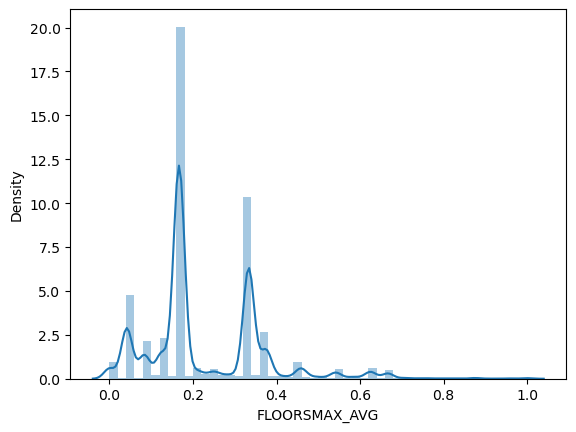

In [27]:
sns.distplot(app_df['FLOORSMAX_AVG'])
plt.show()

In [28]:
app_df['FLOORSMAX_AVG'].fillna(value=(app_df['FLOORSMAX_AVG'].mean()), inplace = True)

In [29]:
app_df['FLOORSMAX_AVG'].isnull().sum()

0

<Axes: xlabel='FLOORSMAX_AVG', ylabel='Density'>

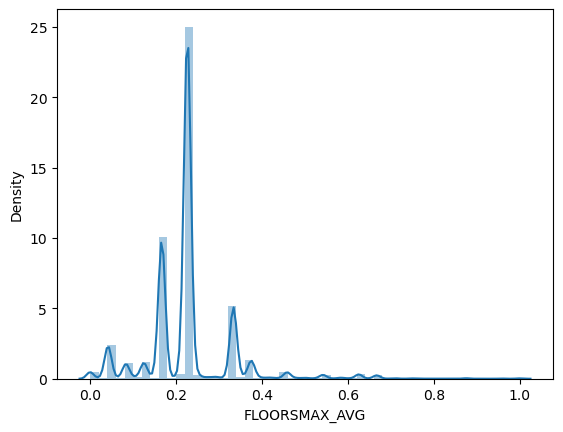

In [30]:
sns.distplot(app_df['FLOORSMAX_AVG'])

In [31]:
df_missing.sort_values(ascending=False).head(30)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

In [32]:
app_df['FLOORSMAX_MODE'].head()

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
Name: FLOORSMAX_MODE, dtype: float64

In [33]:
app_df['FLOORSMAX_MODE'].mean()

0.2223150474784939

In [34]:
app_df['FLOORSMAX_MODE'].mode()

0    0.1667
Name: FLOORSMAX_MODE, dtype: float64

<Axes: xlabel='FLOORSMAX_MODE', ylabel='Density'>

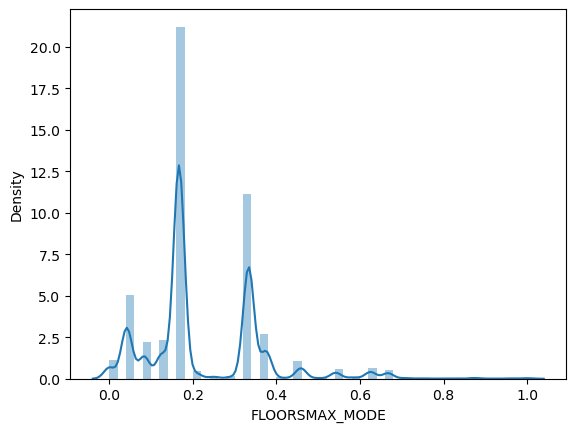

In [35]:
sns.distplot(app_df['FLOORSMAX_MODE'])
plt.show()

In [36]:
app_df['FLOORSMAX_MODE'].fillna(value=(app_df['FLOORSMAX_MODE'].mean()), inplace = True)

In [37]:
app_df['FLOORSMAX_MODE'].isnull().sum()

0

<Axes: xlabel='FLOORSMAX_MODE', ylabel='Density'>

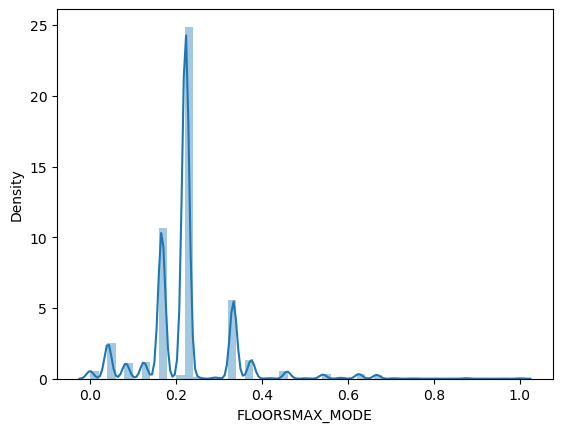

In [38]:
sns.distplot(app_df['FLOORSMAX_MODE'])
plt.show()

In [39]:
app_df['FLOORSMAX_MEDI'].head()

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
Name: FLOORSMAX_MEDI, dtype: float64

In [40]:
app_df['FLOORSMAX_MEDI'].mean()

0.22589659009262678

In [41]:
app_df['FLOORSMAX_MEDI'].median()

0.1667

In [42]:
app_df['FLOORSMAX_MEDI'].mode()

0    0.1667
Name: FLOORSMAX_MEDI, dtype: float64

<Axes: xlabel='FLOORSMAX_MEDI', ylabel='Density'>

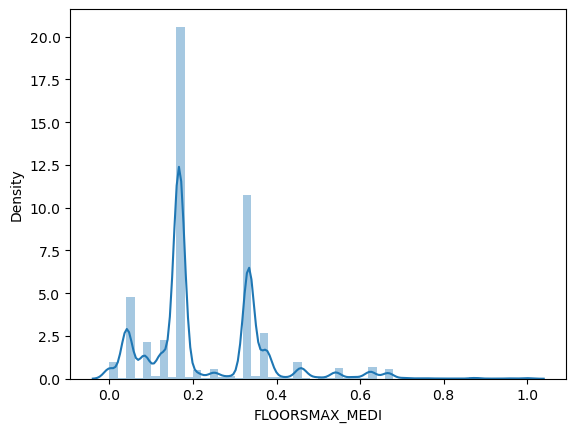

In [43]:
sns.distplot(app_df['FLOORSMAX_MEDI'])
plt.show()

In [44]:
app_df['FLOORSMAX_MEDI'].fillna(value=(app_df['FLOORSMAX_MEDI'].mean()), inplace = True)

In [45]:
app_df['FLOORSMAX_MEDI'].isnull().sum()

0

<Axes: xlabel='FLOORSMAX_MEDI', ylabel='Density'>

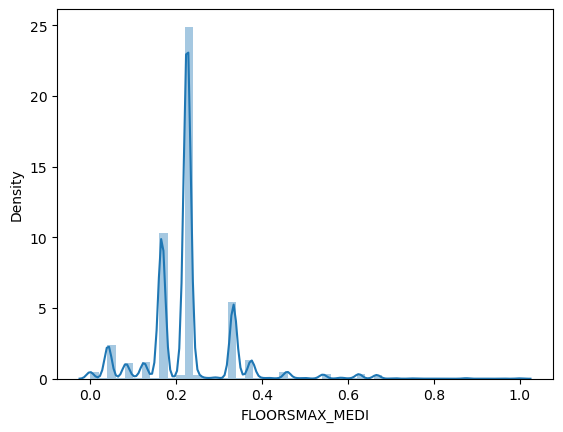

In [46]:
sns.distplot(app_df['FLOORSMAX_MEDI'])
plt.show()

In [47]:
app_df['YEARS_BEGINEXPLUATATION_AVG'].head()

0    0.9722
1    0.9851
2       NaN
3       NaN
4       NaN
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64

In [48]:
app_df['YEARS_BEGINEXPLUATATION_AVG'].mean()

0.9777348581623325

In [49]:
app_df['YEARS_BEGINEXPLUATATION_AVG'].median()

0.9816

In [50]:
app_df['YEARS_BEGINEXPLUATATION_AVG'].mode()

0    0.9871
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64

<Axes: xlabel='YEARS_BEGINEXPLUATATION_AVG', ylabel='Density'>

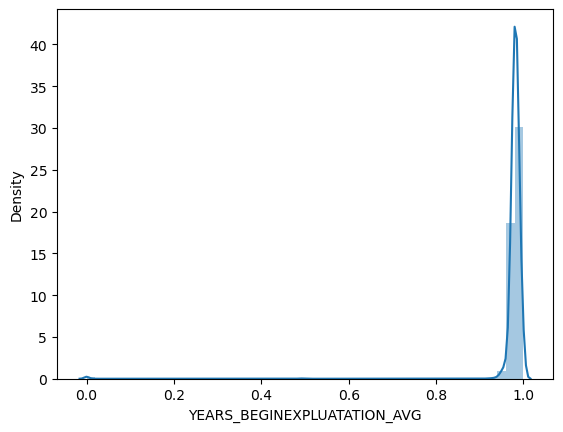

In [51]:
sns.distplot(app_df['YEARS_BEGINEXPLUATATION_AVG'])
plt.show()

In [52]:
app_df['YEARS_BEGINEXPLUATATION_AVG'].fillna(value=(app_df['YEARS_BEGINEXPLUATATION_AVG'].mean()), inplace = True)

In [53]:
app_df['YEARS_BEGINEXPLUATATION_AVG'].isnull().sum()

0

<Axes: xlabel='YEARS_BEGINEXPLUATATION_AVG', ylabel='Density'>

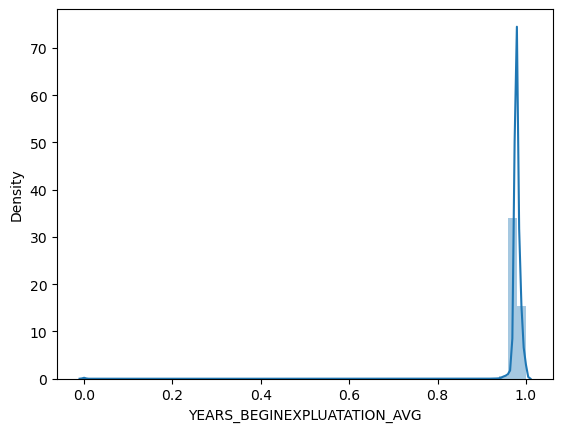

In [54]:
sns.distplot(app_df['YEARS_BEGINEXPLUATATION_AVG'])
plt.show()

In [55]:
app_df['YEARS_BEGINEXPLUATATION_MODE'].head()

0    0.9722
1    0.9851
2       NaN
3       NaN
4       NaN
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64

In [56]:
app_df['YEARS_BEGINEXPLUATATION_MODE'].mean()

0.9770653729429093

In [57]:
app_df['YEARS_BEGINEXPLUATATION_MODE'].mode()

0    0.9871
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64

<Axes: xlabel='YEARS_BEGINEXPLUATATION_MODE', ylabel='Density'>

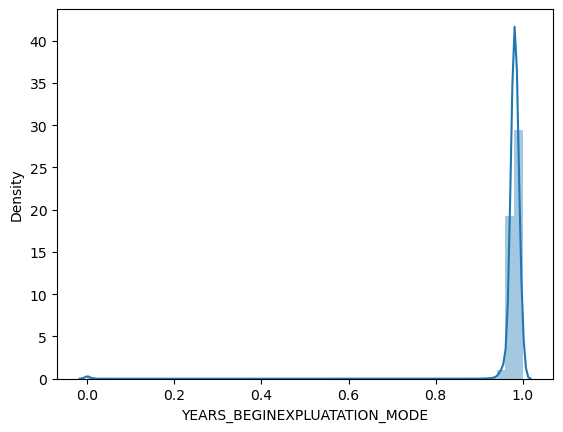

In [58]:
sns.distplot(app_df['YEARS_BEGINEXPLUATATION_MODE'])
plt.show()

In [59]:
app_df['YEARS_BEGINEXPLUATATION_MODE'].fillna(value=(app_df['YEARS_BEGINEXPLUATATION_MODE'].mean()), inplace = True)

In [60]:
app_df['YEARS_BEGINEXPLUATATION_MODE'].isnull().sum()

0

<Axes: xlabel='YEARS_BEGINEXPLUATATION_MODE', ylabel='Density'>

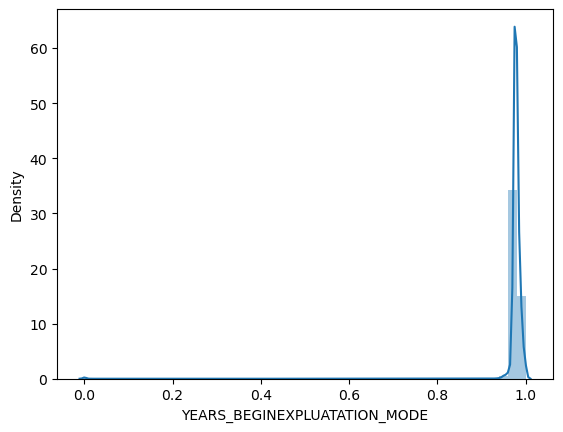

In [61]:
sns.distplot(app_df['YEARS_BEGINEXPLUATATION_MODE'])
plt.show()

In [62]:
app_df['YEARS_BEGINEXPLUATATION_MEDI'].head()

0    0.9722
1    0.9851
2       NaN
3       NaN
4       NaN
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64

In [63]:
app_df['YEARS_BEGINEXPLUATATION_MEDI'].mean()

0.9777522640694839

In [64]:
app_df['YEARS_BEGINEXPLUATATION_MEDI'].mode()

0    0.9871
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64

<Axes: xlabel='YEARS_BEGINEXPLUATATION_MEDI', ylabel='Density'>

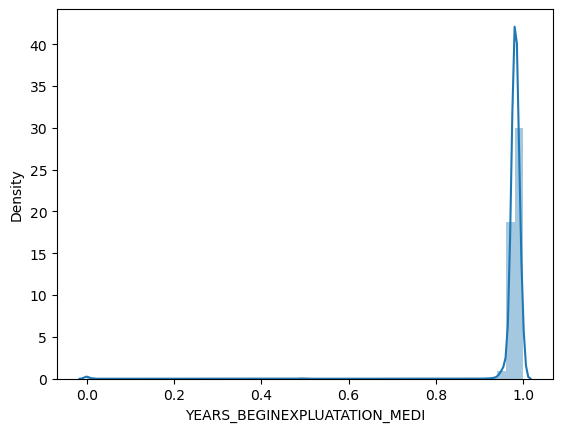

In [65]:
sns.distplot(app_df['YEARS_BEGINEXPLUATATION_MEDI'])
plt.show()

In [66]:
app_df['YEARS_BEGINEXPLUATATION_MEDI'].fillna(value=(app_df['YEARS_BEGINEXPLUATATION_MEDI'].mean()), inplace = True)

In [67]:
app_df['YEARS_BEGINEXPLUATATION_MEDI'].isnull().sum()

0

<Axes: xlabel='YEARS_BEGINEXPLUATATION_MEDI', ylabel='Density'>

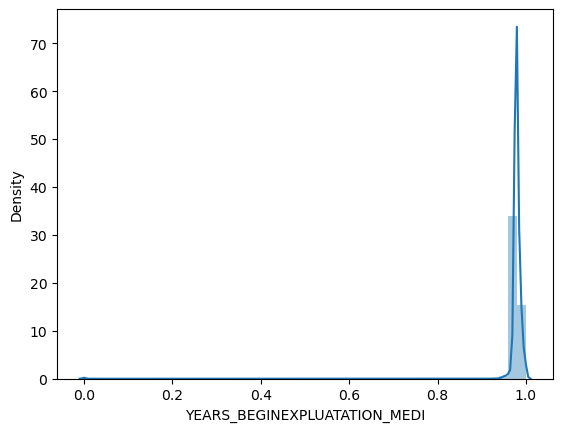

In [68]:
sns.distplot(app_df['YEARS_BEGINEXPLUATATION_MEDI'])
plt.show()

In [69]:
app_df['TOTALAREA_MODE'].head()

0    0.0149
1    0.0714
2       NaN
3       NaN
4       NaN
Name: TOTALAREA_MODE, dtype: float64

In [70]:
app_df['TOTALAREA_MODE'].mean()

0.10254666268544127

In [71]:
app_df['TOTALAREA_MODE'].median()

0.0688

In [72]:
app_df['TOTALAREA_MODE'].mode()

0    0.0
Name: TOTALAREA_MODE, dtype: float64

<Axes: xlabel='TOTALAREA_MODE', ylabel='Density'>

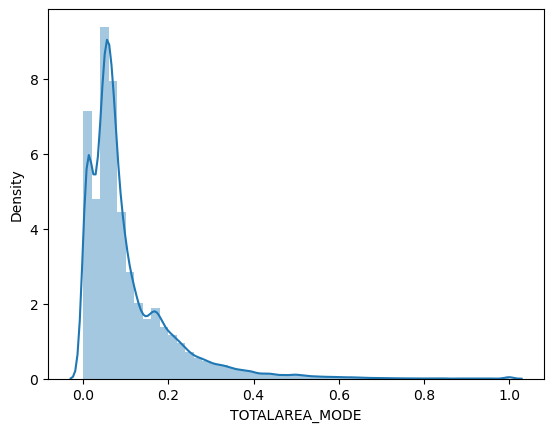

In [73]:
sns.distplot(app_df['TOTALAREA_MODE'])
plt.show()

In [74]:
app_df['TOTALAREA_MODE'].fillna(value=(app_df['TOTALAREA_MODE'].mean()), inplace = True)

In [75]:
app_df['TOTALAREA_MODE'].isnull().sum()

0

<Axes: xlabel='TOTALAREA_MODE', ylabel='Density'>

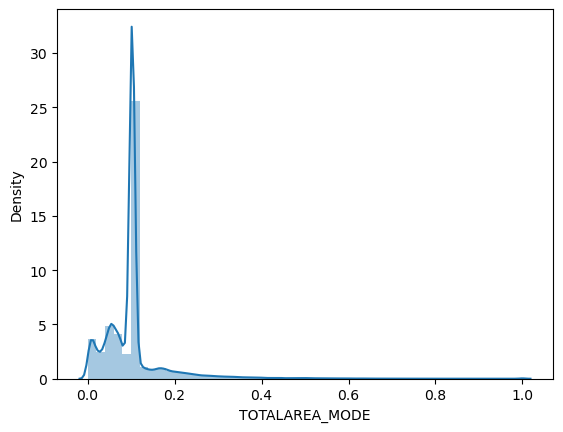

In [76]:
sns.distplot(app_df['TOTALAREA_MODE'])
plt.show()

In [77]:
app_df['OCCUPATION_TYPE'].head()

0      Laborers
1    Core staff
2      Laborers
3      Laborers
4    Core staff
Name: OCCUPATION_TYPE, dtype: object

<Axes: xlabel='OCCUPATION_TYPE', ylabel='count'>

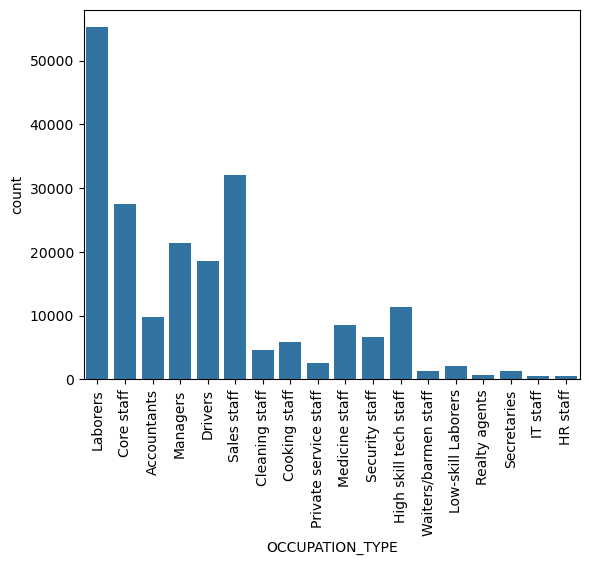

In [78]:
sns.countplot(x= 'OCCUPATION_TYPE', data= app_df)
plt.tick_params(axis='x', labelrotation=90)

Column: OCCUPATION_TYPE

OCCUPATION_TYPE column has 31% missing data, which is also a large number. So, it would be appropriate to remove this column, but the datain this column seems to look important. So i would not remove the missing data.

In [79]:
app_df['EXT_SOURCE_3'].head(10)

0    0.139376
1         NaN
2    0.729567
3         NaN
4         NaN
5    0.621226
6    0.492060
7    0.540654
8    0.751724
9         NaN
Name: EXT_SOURCE_3, dtype: float64

<Axes: ylabel='Frequency'>

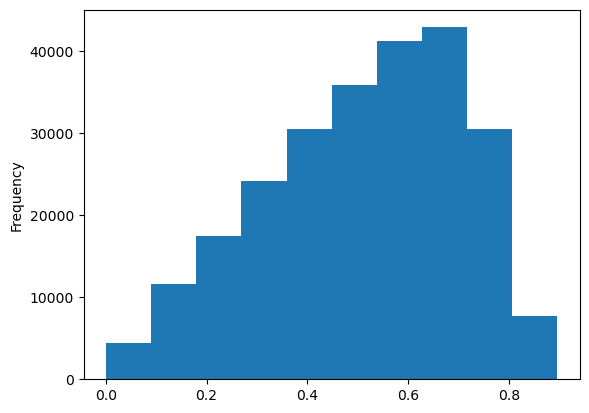

In [80]:
app_df['EXT_SOURCE_3'].plot.hist()

In [81]:
app_df['EXT_SOURCE_3'].mean()

0.5108529061799658

In [82]:
app_df['EXT_SOURCE_3'].mode()

0    0.7463
Name: EXT_SOURCE_3, dtype: float64

In [83]:
app_df['AMT_REQ_CREDIT_BUREAU_QRT'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

<Axes: ylabel='Frequency'>

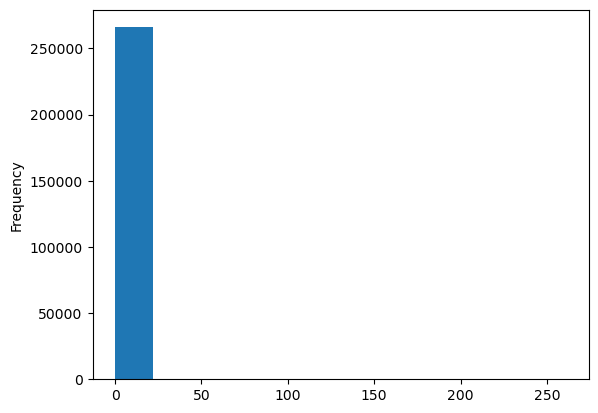

In [84]:
num_unique_values =  len(app_df.AMT_REQ_CREDIT_BUREAU_QRT.unique())
app_df['AMT_REQ_CREDIT_BUREAU_QRT'].plot.hist(bins = num_unique_values)

In [85]:
app_df.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

AMT_REQ_CREDIT_BUREAU_QRT
0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: count, dtype: int64

In [86]:
app_df['AMT_REQ_CREDIT_BUREAU_QRT'].mean()

0.26547414959848414

In [87]:
app_df['AMT_REQ_CREDIT_BUREAU_QRT'].mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [88]:
app_df['AMT_REQ_CREDIT_BUREAU_QRT']= app_df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(app_df['AMT_REQ_CREDIT_BUREAU_QRT'].mode().iloc[0])

In [89]:
app_df['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

0

In [90]:
df_missing.sort_values(ascending=False).head(30)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

In [91]:
app_df['AMT_REQ_CREDIT_BUREAU_YEAR'].head()

0    1.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

<Axes: ylabel='Frequency'>

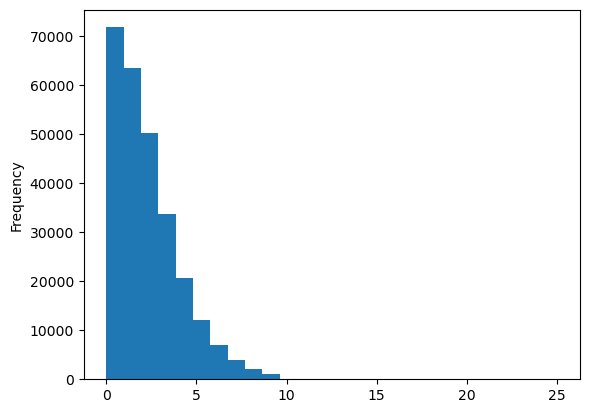

In [92]:
num_unique_values =  len(app_df.AMT_REQ_CREDIT_BUREAU_YEAR.unique())
app_df['AMT_REQ_CREDIT_BUREAU_YEAR'].plot.hist(bins = num_unique_values)

In [93]:
app_df.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

AMT_REQ_CREDIT_BUREAU_YEAR
0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: count, dtype: int64

In [94]:
app_df['AMT_REQ_CREDIT_BUREAU_YEAR'].mean()

1.899974435321363

In [95]:
app_df['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [96]:
app_df['AMT_REQ_CREDIT_BUREAU_YEAR']= app_df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(app_df['AMT_REQ_CREDIT_BUREAU_YEAR'].mode().iloc[0])

In [97]:
app_df['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum()

0

In [98]:
app_df['AMT_REQ_CREDIT_BUREAU_MON'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

<Axes: ylabel='Frequency'>

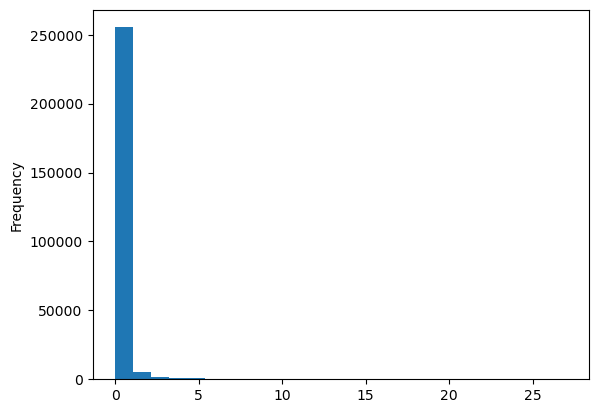

In [99]:
num_unique_values =  len(app_df.AMT_REQ_CREDIT_BUREAU_MON.unique())
app_df['AMT_REQ_CREDIT_BUREAU_MON'].plot.hist(bins = num_unique_values)

In [100]:
app_df.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

AMT_REQ_CREDIT_BUREAU_MON
0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: count, dtype: int64

In [101]:
app_df['AMT_REQ_CREDIT_BUREAU_MON'].mean()

0.26739526000781977

In [102]:
app_df['AMT_REQ_CREDIT_BUREAU_MON'].mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [103]:
app_df['AMT_REQ_CREDIT_BUREAU_MON']= app_df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(app_df['AMT_REQ_CREDIT_BUREAU_MON'].mode().iloc[0])

In [104]:
app_df['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

0

In [105]:
app_df['AMT_REQ_CREDIT_BUREAU_WEEK'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

<Axes: ylabel='Frequency'>

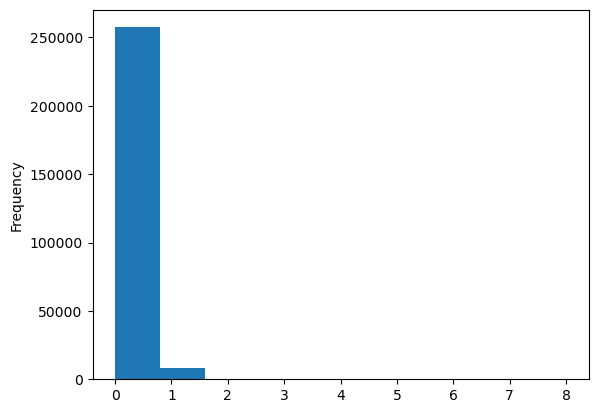

In [106]:
num_unique_values =  len(app_df.AMT_REQ_CREDIT_BUREAU_WEEK.unique())
app_df['AMT_REQ_CREDIT_BUREAU_WEEK'].plot.hist(bins = num_unique_values)

In [107]:
app_df.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()

AMT_REQ_CREDIT_BUREAU_WEEK
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: count, dtype: int64

In [108]:
app_df['AMT_REQ_CREDIT_BUREAU_WEEK'].mean()

0.0343619356973142

In [109]:
app_df['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [110]:
app_df['AMT_REQ_CREDIT_BUREAU_WEEK']= app_df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(app_df['AMT_REQ_CREDIT_BUREAU_WEEK'].mode().iloc[0])

In [111]:
app_df['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

0

In [112]:
app_df['AMT_REQ_CREDIT_BUREAU_DAY'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

<Axes: ylabel='Frequency'>

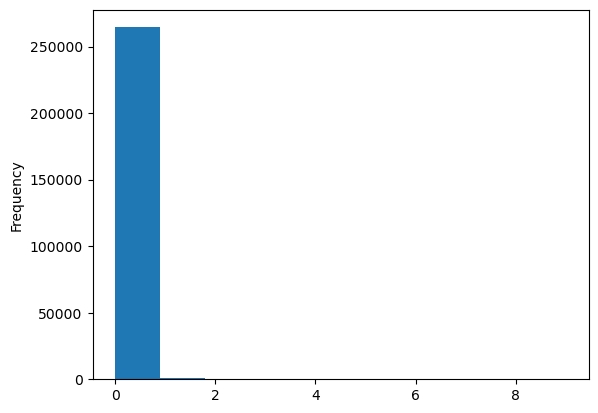

In [113]:
num_unique_values =  len(app_df.AMT_REQ_CREDIT_BUREAU_DAY.unique())
app_df['AMT_REQ_CREDIT_BUREAU_DAY'].plot.hist(bins = num_unique_values)

In [114]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

AMT_REQ_CREDIT_BUREAU_DAY
0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: count, dtype: int64

In [115]:
app_df['AMT_REQ_CREDIT_BUREAU_DAY'].mean()

0.0070002105326475985

In [116]:
app_df['AMT_REQ_CREDIT_BUREAU_DAY'].mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [117]:
app_df['AMT_REQ_CREDIT_BUREAU_DAY']= app_df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(app_df['AMT_REQ_CREDIT_BUREAU_DAY'].mode().iloc[0])

In [118]:
app_df['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum()

0

In [119]:
app_df['AMT_REQ_CREDIT_BUREAU_HOUR'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

<Axes: ylabel='Frequency'>

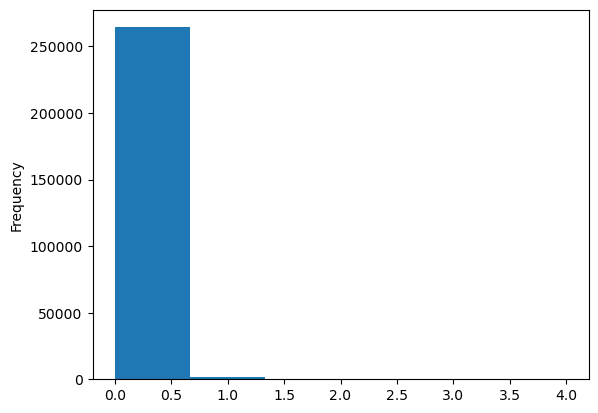

In [120]:
num_unique_values =  len(app_df.AMT_REQ_CREDIT_BUREAU_HOUR.unique())
app_df['AMT_REQ_CREDIT_BUREAU_HOUR'].plot.hist(bins = num_unique_values)

In [121]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: count, dtype: int64

In [122]:
app_df['AMT_REQ_CREDIT_BUREAU_HOUR'].mean()

0.006402448193930645

In [123]:
app_df['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [124]:
app_df['AMT_REQ_CREDIT_BUREAU_HOUR']= app_df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(app_df['AMT_REQ_CREDIT_BUREAU_HOUR'].mode().iloc[0])

In [125]:
app_df['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

0

In [126]:
df_missing.sort_values(ascending=False).head(30)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

In [127]:
app_df['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [128]:
app_df['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

In [129]:
app_df['DEF_60_CNT_SOCIAL_CIRCLE'].unique()

array([ 2.,  0.,  1., nan,  3.,  5.,  4.,  7., 24.,  6.])

In [130]:
app_df['DEF_60_CNT_SOCIAL_CIRCLE'].mean()

0.10004894123788705

In [131]:
app_df['DEF_60_CNT_SOCIAL_CIRCLE'].median()

0.0

In [132]:
app_df['DEF_60_CNT_SOCIAL_CIRCLE'].mode()

0    0.0
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

<Axes: xlabel='DEF_60_CNT_SOCIAL_CIRCLE', ylabel='count'>

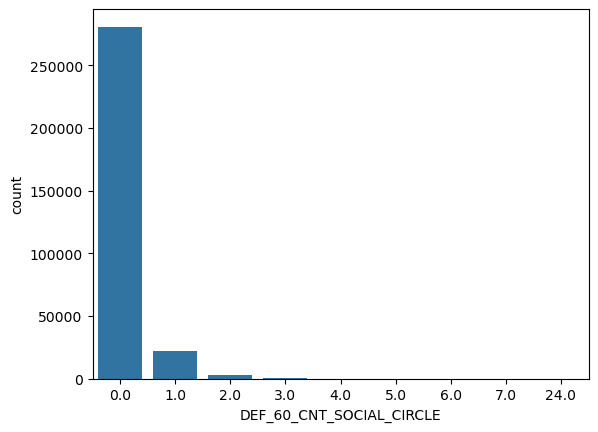

In [133]:
sns.countplot(x= 'DEF_60_CNT_SOCIAL_CIRCLE', data= app_df)

In [134]:
app_df['DEF_60_CNT_SOCIAL_CIRCLE']=app_df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(app_df['DEF_60_CNT_SOCIAL_CIRCLE'].mode().iloc[0])

In [135]:
app_df['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

<Axes: xlabel='DEF_60_CNT_SOCIAL_CIRCLE', ylabel='count'>

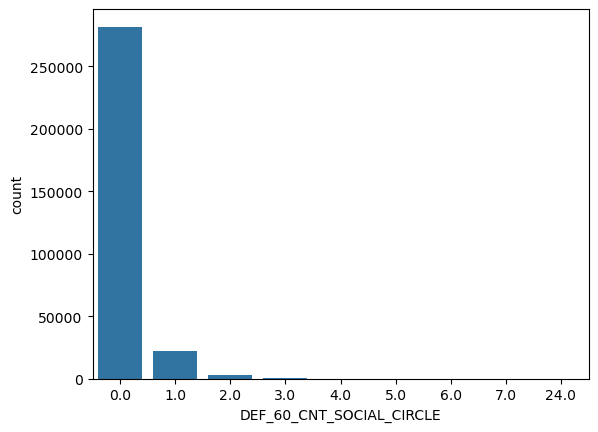

In [136]:
sns.countplot(x= 'DEF_60_CNT_SOCIAL_CIRCLE', data= app_df)

In [137]:
app_df['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [138]:
app_df['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

In [139]:
app_df['OBS_30_CNT_SOCIAL_CIRCLE'].unique()

array([  2.,   1.,   0.,   4.,   8.,  10.,  nan,   7.,   3.,   6.,   5.,
        12.,   9.,  13.,  11.,  14.,  22.,  16.,  15.,  17.,  20.,  25.,
        19.,  18.,  21.,  24.,  23.,  28.,  26.,  29.,  27.,  47., 348.,
        30.])

In [140]:
app_df['OBS_30_CNT_SOCIAL_CIRCLE'].mean()

1.4222454239942575

In [141]:
app_df['OBS_30_CNT_SOCIAL_CIRCLE'].mode()

0    0.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

<Axes: xlabel='OBS_30_CNT_SOCIAL_CIRCLE', ylabel='count'>

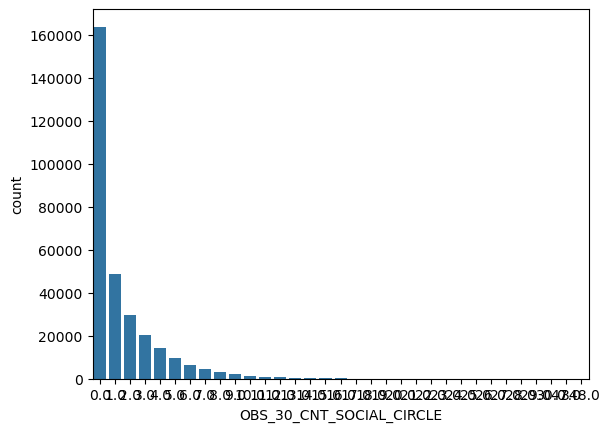

In [142]:
sns.countplot(x= 'OBS_30_CNT_SOCIAL_CIRCLE', data= app_df)

In [143]:
app_df['OBS_30_CNT_SOCIAL_CIRCLE']=app_df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(app_df['OBS_30_CNT_SOCIAL_CIRCLE'].mode().iloc[0])

In [144]:
app_df['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

<Axes: xlabel='OBS_30_CNT_SOCIAL_CIRCLE', ylabel='count'>

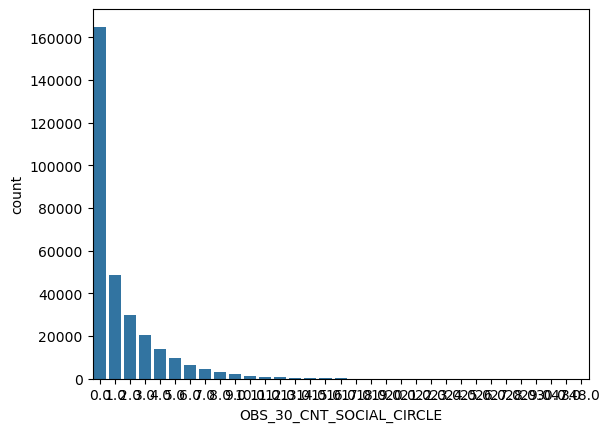

In [145]:
sns.countplot(x= 'OBS_30_CNT_SOCIAL_CIRCLE', data= app_df)

In [146]:
app_df['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [147]:
app_df['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

In [148]:
app_df['DEF_30_CNT_SOCIAL_CIRCLE'].unique()

array([ 2.,  0.,  1., nan,  3.,  4.,  5.,  6.,  7., 34.,  8.])

In [149]:
app_df['DEF_30_CNT_SOCIAL_CIRCLE'].mean()

0.1434206662533851

In [150]:
app_df['DEF_30_CNT_SOCIAL_CIRCLE'].mode()

0    0.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

<Axes: xlabel='DEF_30_CNT_SOCIAL_CIRCLE', ylabel='count'>

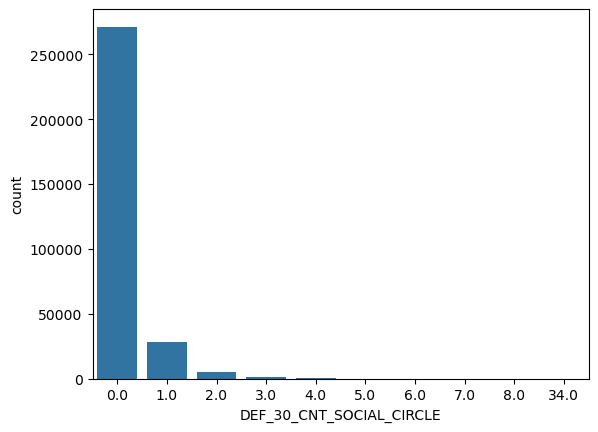

In [151]:
sns.countplot(x= 'DEF_30_CNT_SOCIAL_CIRCLE', data= app_df)

In [152]:
app_df['DEF_30_CNT_SOCIAL_CIRCLE']=app_df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(app_df['DEF_30_CNT_SOCIAL_CIRCLE'].mode().iloc[0])

In [153]:
app_df['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

<Axes: xlabel='DEF_30_CNT_SOCIAL_CIRCLE', ylabel='count'>

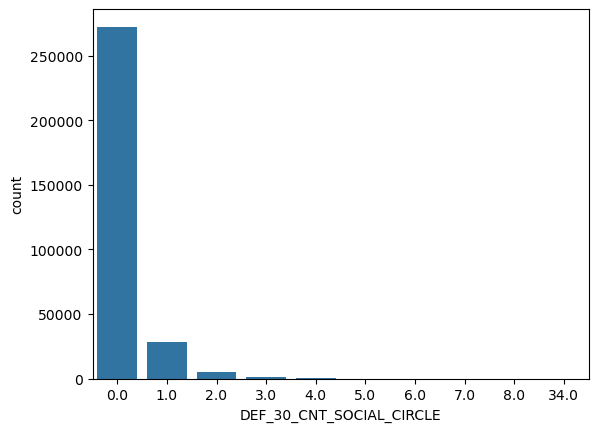

In [154]:
sns.countplot(x= 'DEF_30_CNT_SOCIAL_CIRCLE', data= app_df)

In [155]:
app_df['OBS_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [156]:
app_df['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

In [157]:
app_df['OBS_60_CNT_SOCIAL_CIRCLE'].unique()

array([  2.,   1.,   0.,   4.,   8.,  10.,  nan,   7.,   3.,   6.,   5.,
        12.,   9.,  13.,  11.,  14.,  21.,  15.,  22.,  16.,  20.,  25.,
        17.,  19.,  18.,  24.,  23.,  28.,  29.,  27.,  47., 344.,  30.,
        26.])

In [158]:
app_df['OBS_60_CNT_SOCIAL_CIRCLE'].mean()

1.4052921791901856

In [159]:
app_df['OBS_60_CNT_SOCIAL_CIRCLE'].mode()

0    0.0
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

<Axes: xlabel='OBS_60_CNT_SOCIAL_CIRCLE', ylabel='count'>

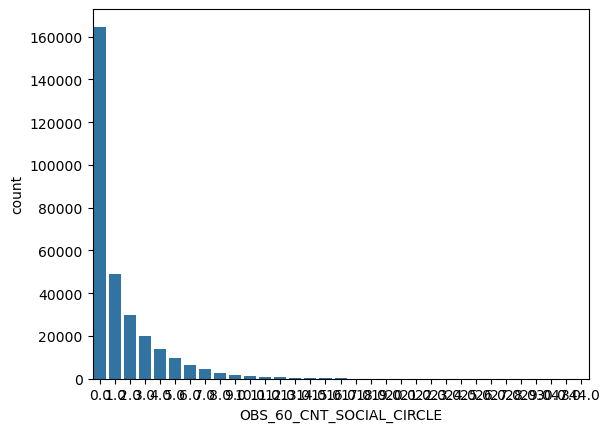

In [160]:
sns.countplot(x= 'OBS_60_CNT_SOCIAL_CIRCLE', data= app_df)

In [161]:
app_df['OBS_60_CNT_SOCIAL_CIRCLE']=app_df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(app_df['OBS_60_CNT_SOCIAL_CIRCLE'].mode().iloc[0])

In [162]:
app_df['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

<Axes: xlabel='OBS_60_CNT_SOCIAL_CIRCLE', ylabel='count'>

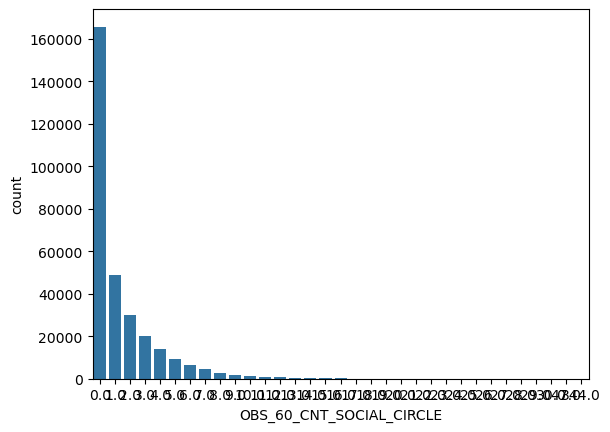

In [163]:
sns.countplot(x= 'OBS_60_CNT_SOCIAL_CIRCLE', data= app_df)

In [164]:
# Categorical columns are:
list(set(app_df.columns) - set(app_df.describe().columns)) 

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'NAME_HOUSING_TYPE',
 'EMERGENCYSTATE_MODE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_FAMILY_STATUS',
 'FLAG_OWN_REALTY',
 'OCCUPATION_TYPE',
 'NAME_EDUCATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FLAG_OWN_CAR']

In [165]:
# Numerical columns are:
app_df.describe().columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

In [166]:
cols = list(set(app_df.columns) - set(app_df.describe().columns)) 
app_df[cols].isnull().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
NAME_HOUSING_TYPE                  0
EMERGENCYSTATE_MODE           145755
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_FAMILY_STATUS                 0
FLAG_OWN_REALTY                    0
OCCUPATION_TYPE                96391
NAME_EDUCATION_TYPE                0
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
FLAG_OWN_CAR                       0
dtype: int64

Due to the nature of missing data in OCCUPATION_TYPE column, it was not removed and in case of EMERGENCYSTATE_MODE column replacing data would result in inaccurate analysis, so i will not include it in my analysis.

# Target

In [167]:
app_df['TARGET'].head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [168]:
app_df['TARGET'].isnull().sum()

0

In [169]:
app_df['TARGET'].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='TARGET'>

Text(0.5, 1.0, 'Payment Difficulties')

Text(0.5, 0, '\n 0 - No Difficulty | 1 - Difficulty')

Text(0, 0.5, 'Normalized Values')

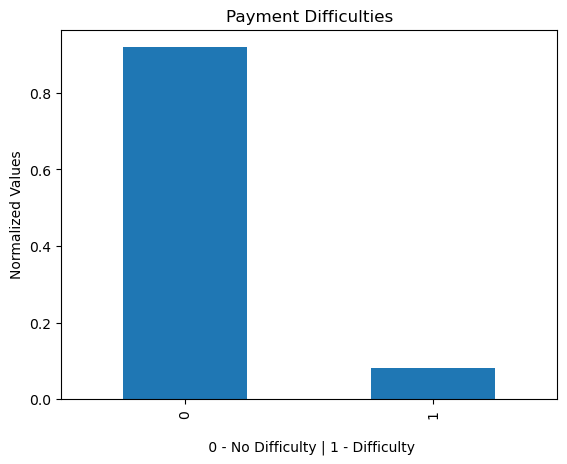

In [170]:
app_df.TARGET.value_counts(normalize  = True).plot.bar()
plt.title("Payment Difficulties")
plt.xlabel("\n 0 - No Difficulty | 1 - Difficulty")
plt.ylabel("Normalized Values")
plt.show()

People facing difficulty in payment is around 90%

In [171]:
app_df[app_df.TARGET == 0].shape[0] / app_df[app_df.TARGET == 1].shape[0]

11.387150050352467

In [172]:
train_0 = app_df.loc[app_df['TARGET'] == 0]
train_1 = app_df.loc[app_df['TARGET'] == 1]

In [173]:
# Categorical columns are:
cat_col = list(set(app_df.columns) - set(app_df.describe().columns)) 
cat_col

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'NAME_HOUSING_TYPE',
 'EMERGENCYSTATE_MODE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_FAMILY_STATUS',
 'FLAG_OWN_REALTY',
 'OCCUPATION_TYPE',
 'NAME_EDUCATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FLAG_OWN_CAR']

In [174]:
# Numerical columns are:
num_col = app_df.describe().columns
num_col

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

In [175]:
app_df.shape

(307511, 81)

In [176]:
def plotting(train, train0, train1, column):
    
    train = train
    train_0 = train0
    train_1 = train1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'TARGET', data = train, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['0']= ((train_0[col].value_counts())/len(train_0))
    df['1']= ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()

In [177]:
train_categorical = app_df.select_dtypes(include=['object']).columns
train_categorical

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

Plotting  NAME_CONTRACT_TYPE


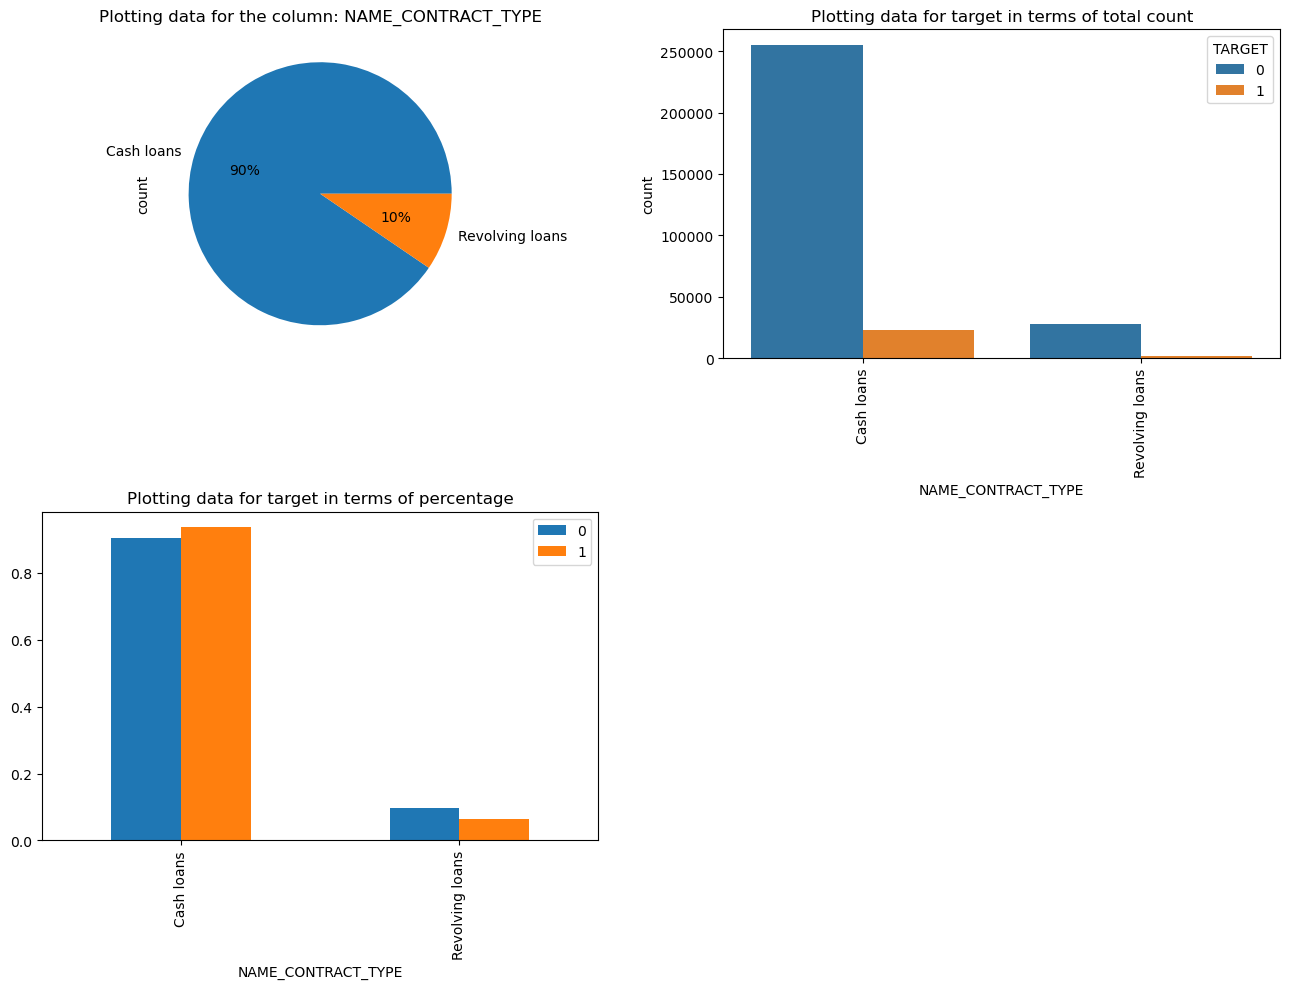

----------------------------------------------------------------------------------------------
Plotting  CODE_GENDER


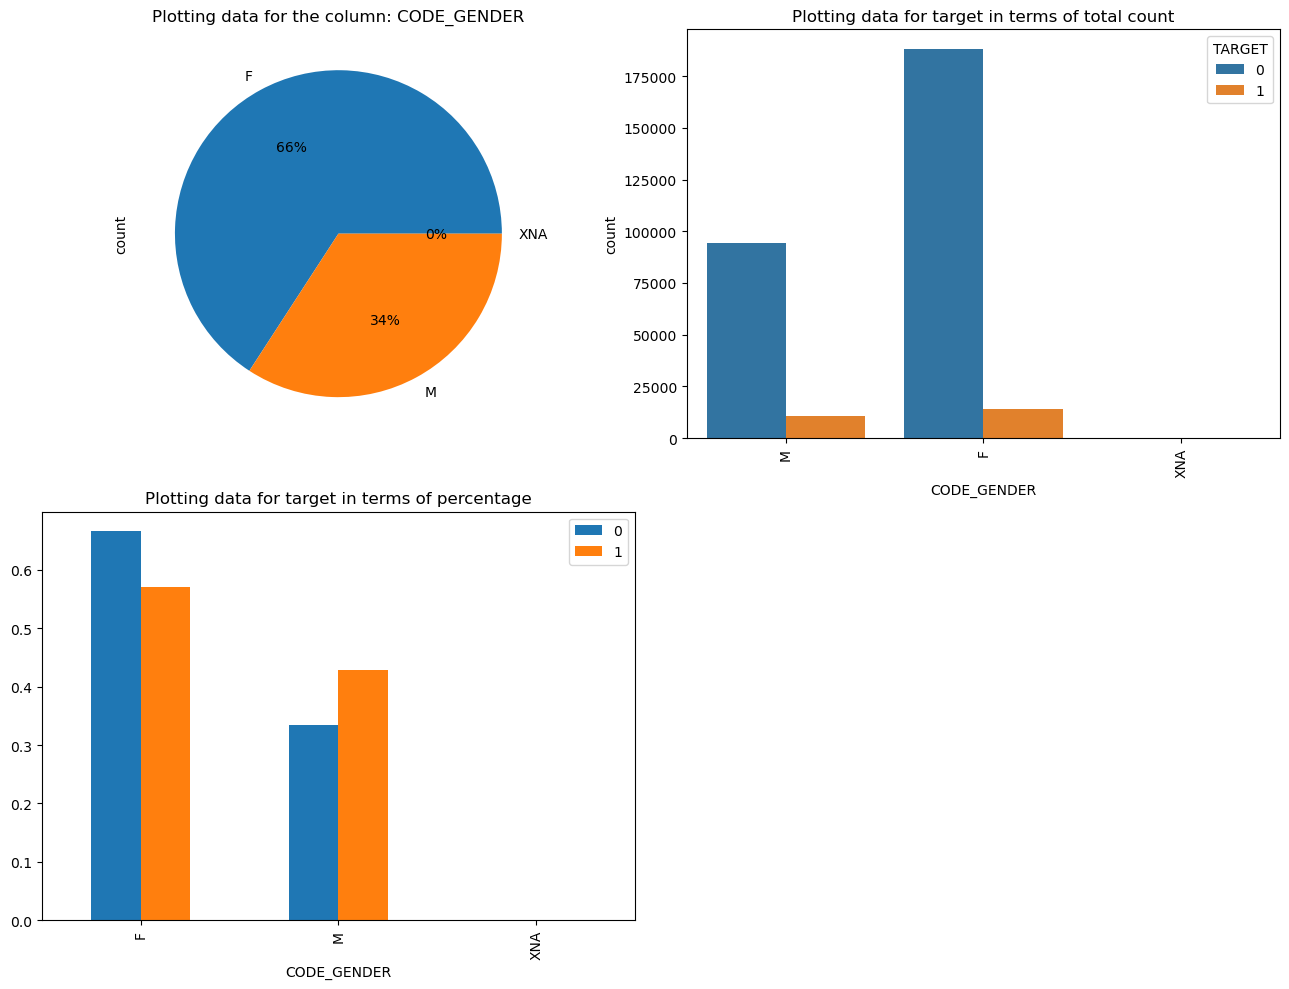

----------------------------------------------------------------------------------------------
Plotting  FLAG_OWN_CAR


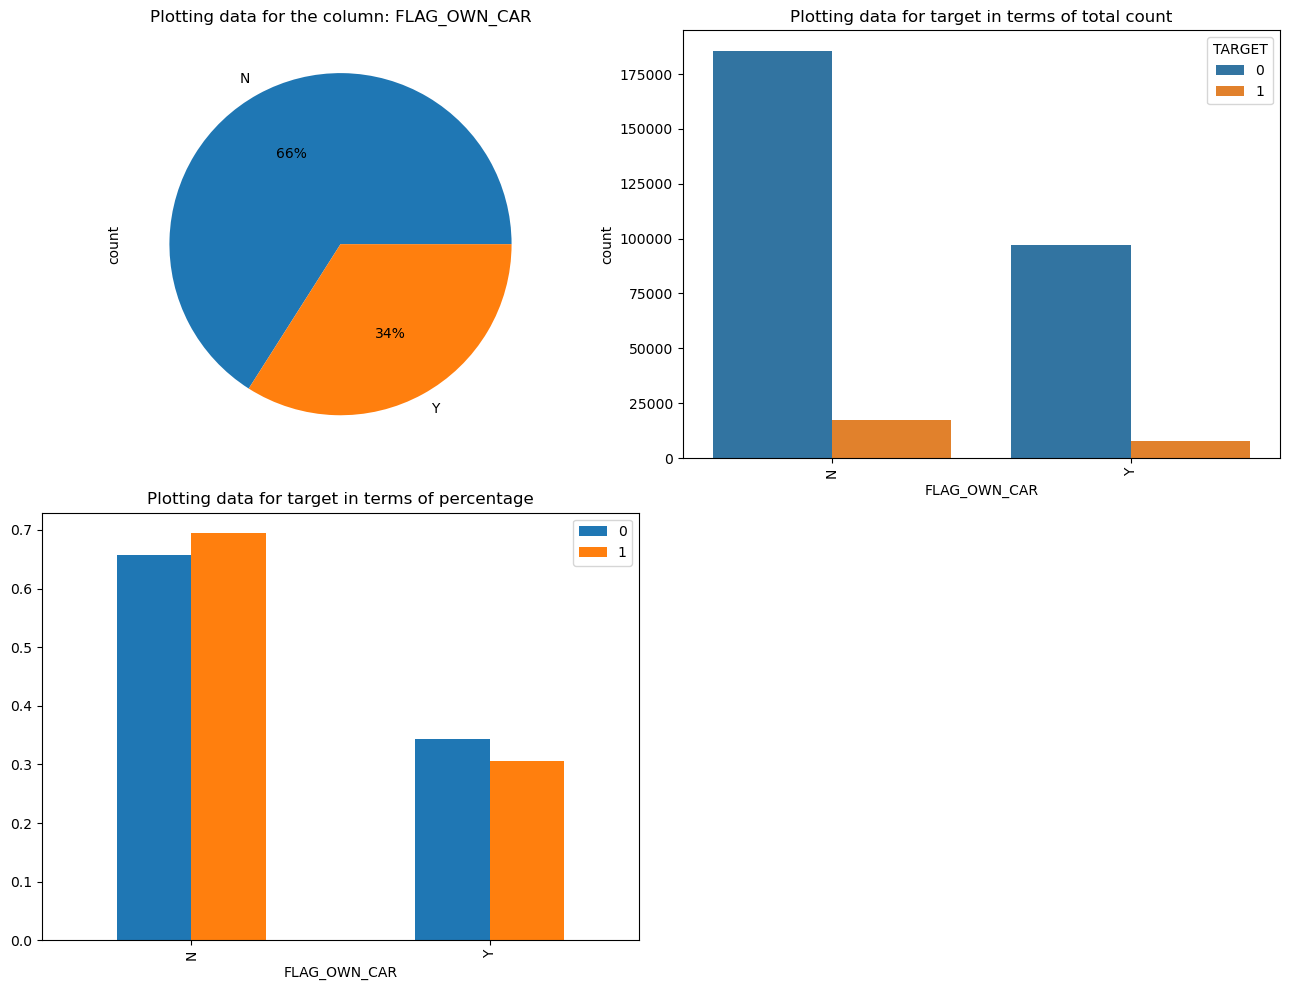

----------------------------------------------------------------------------------------------
Plotting  FLAG_OWN_REALTY


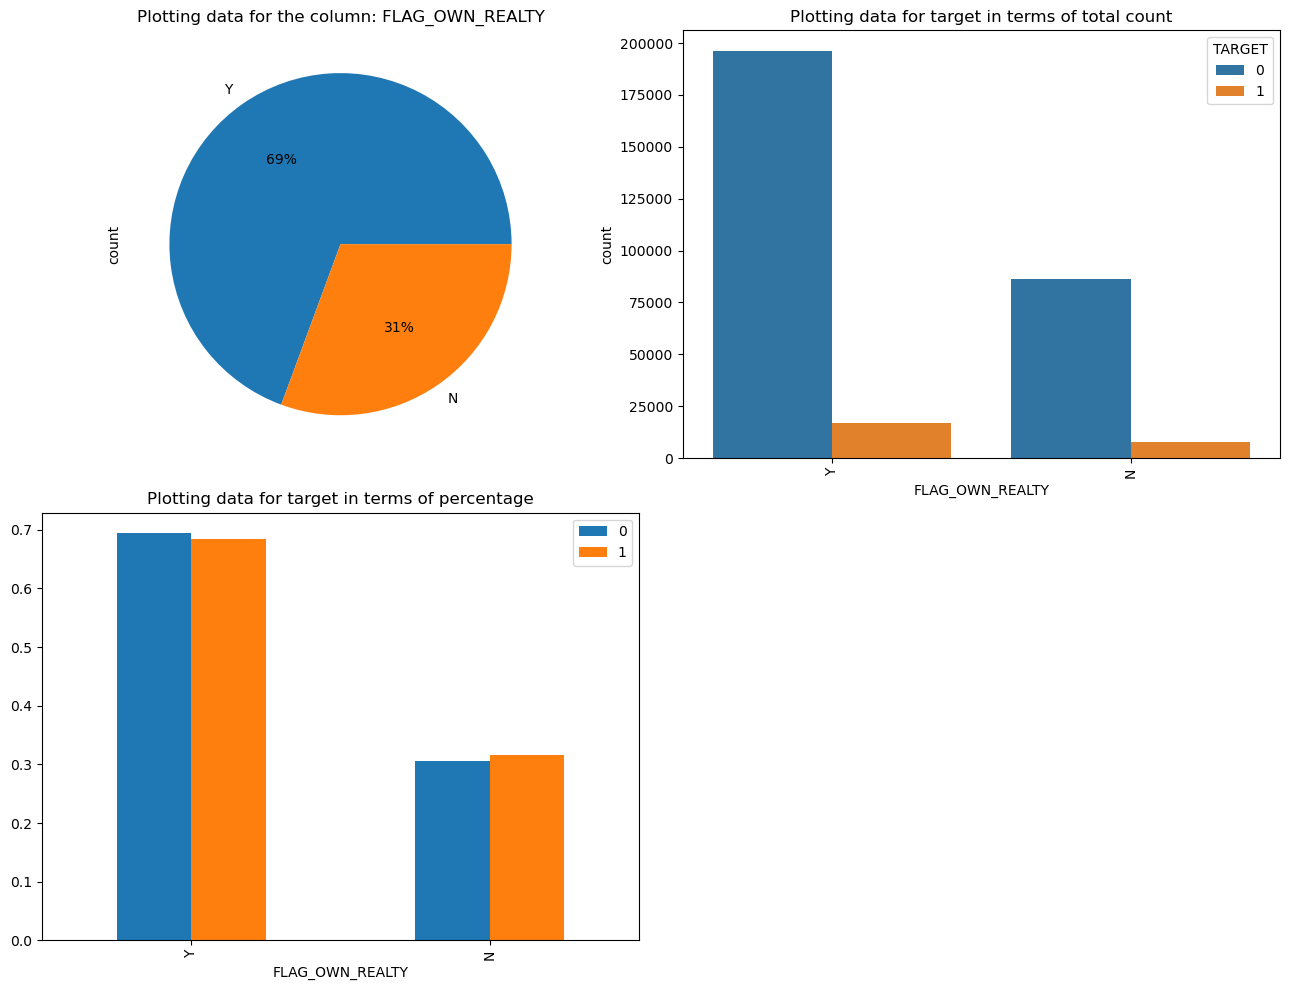

----------------------------------------------------------------------------------------------
Plotting  NAME_TYPE_SUITE


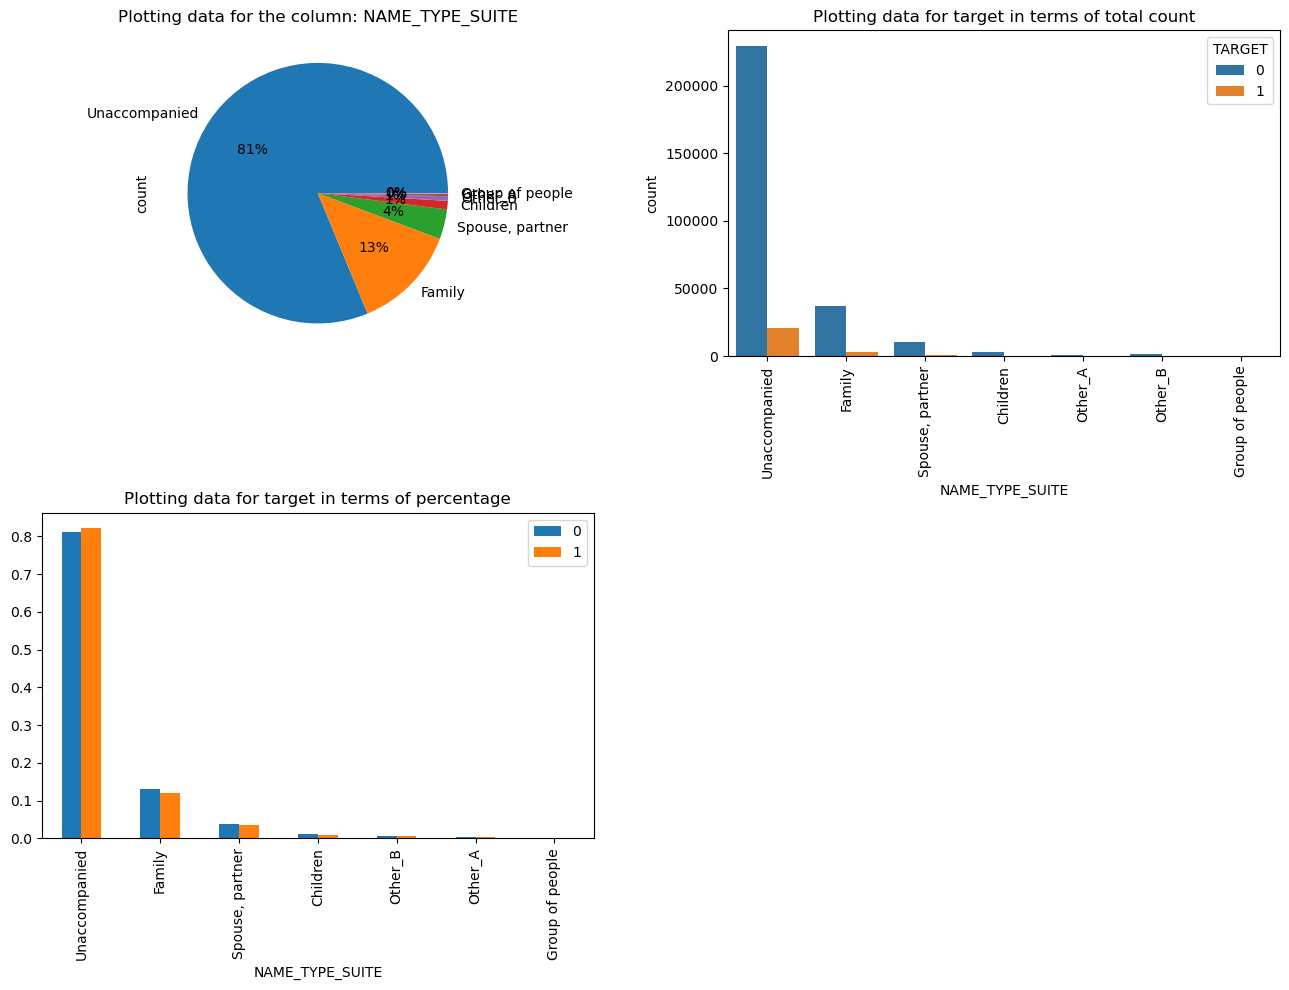

----------------------------------------------------------------------------------------------
Plotting  NAME_INCOME_TYPE


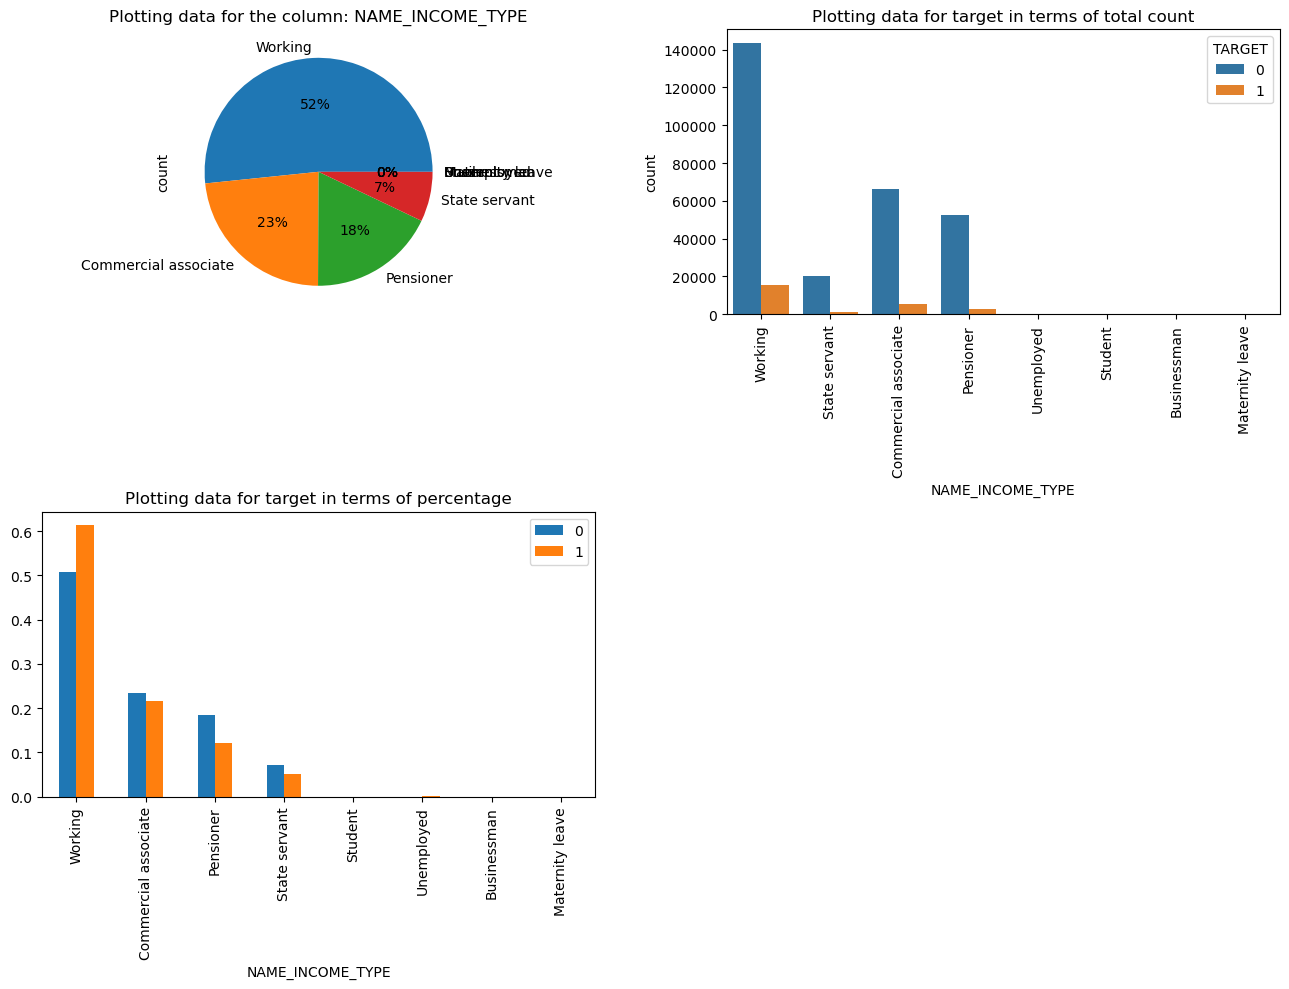

----------------------------------------------------------------------------------------------
Plotting  NAME_EDUCATION_TYPE


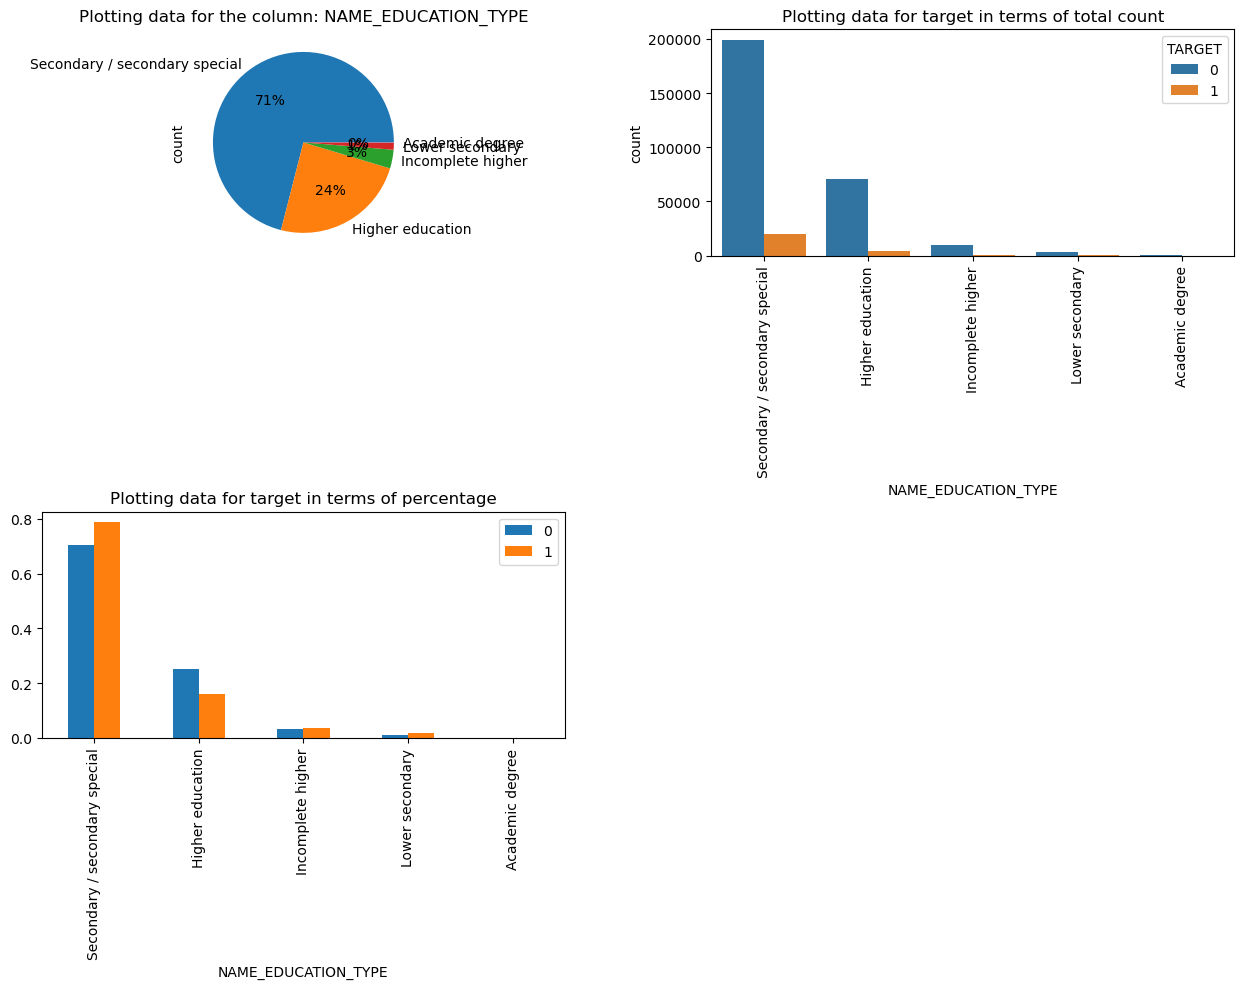

----------------------------------------------------------------------------------------------
Plotting  NAME_FAMILY_STATUS


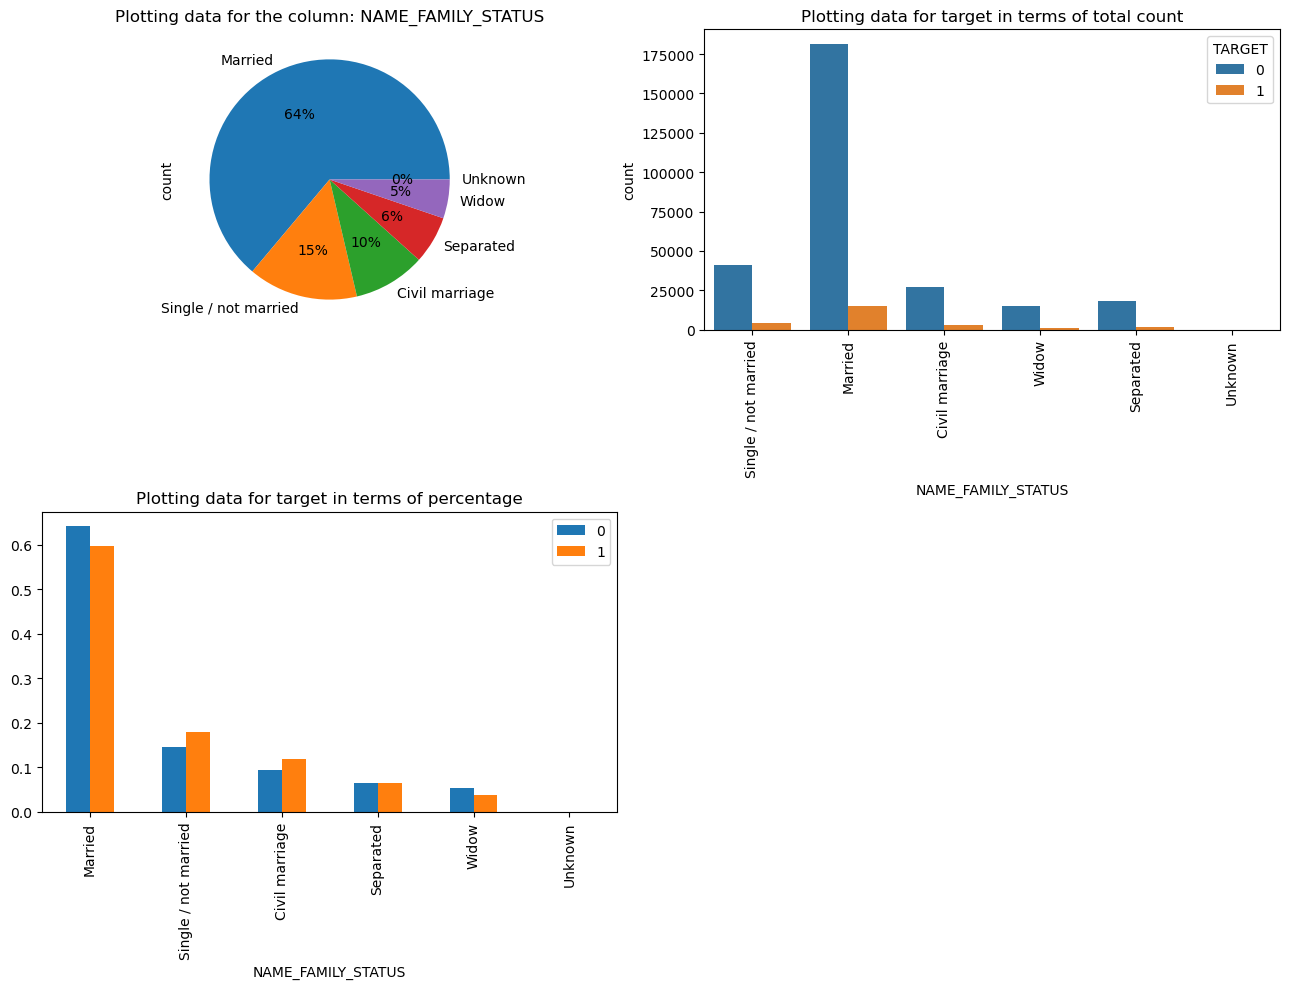

----------------------------------------------------------------------------------------------
Plotting  NAME_HOUSING_TYPE


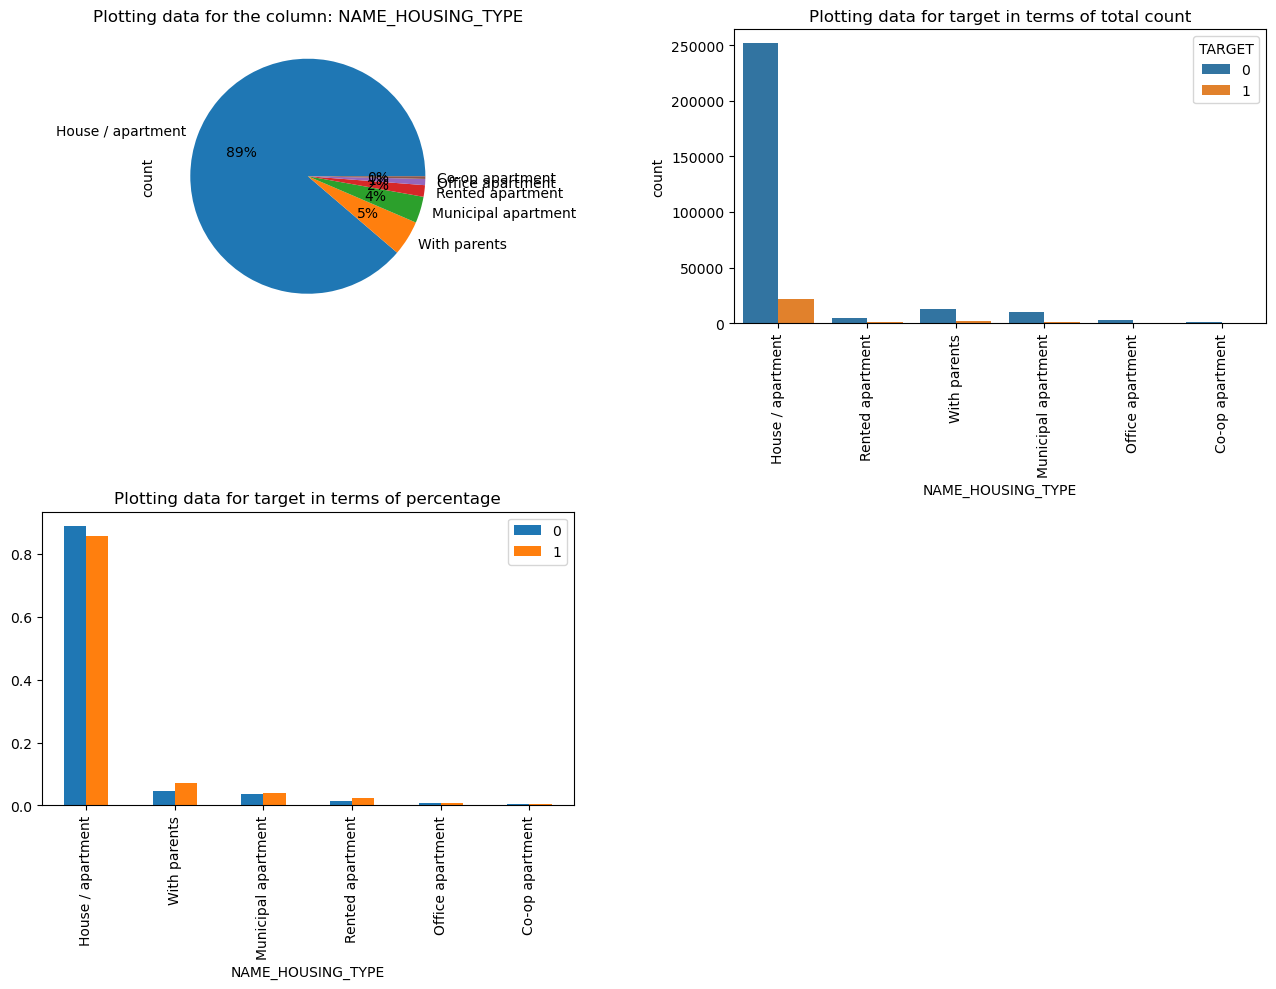

----------------------------------------------------------------------------------------------
Plotting  OCCUPATION_TYPE


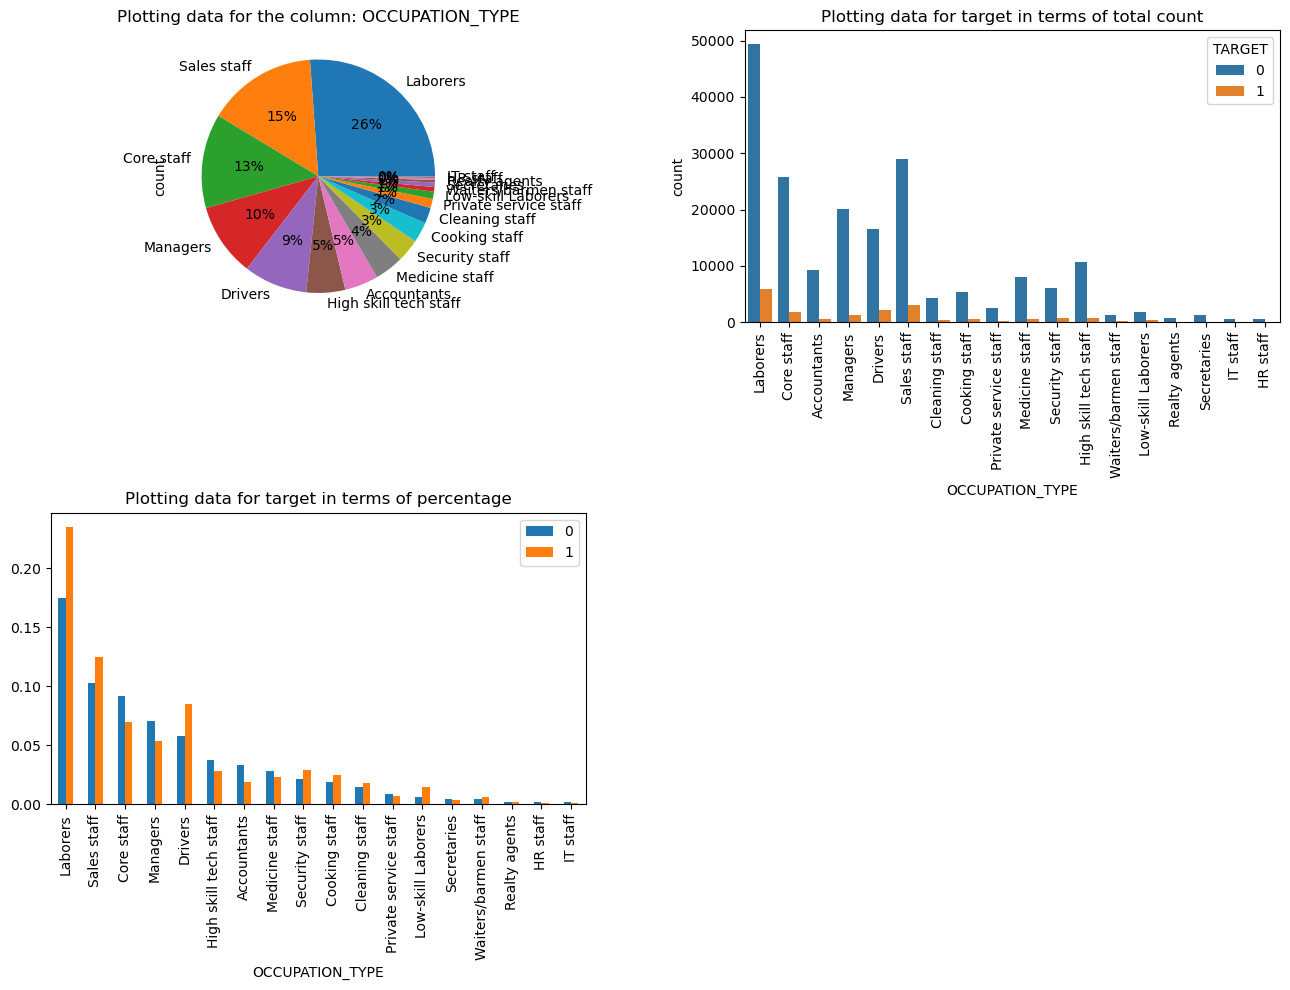

----------------------------------------------------------------------------------------------
Plotting  WEEKDAY_APPR_PROCESS_START


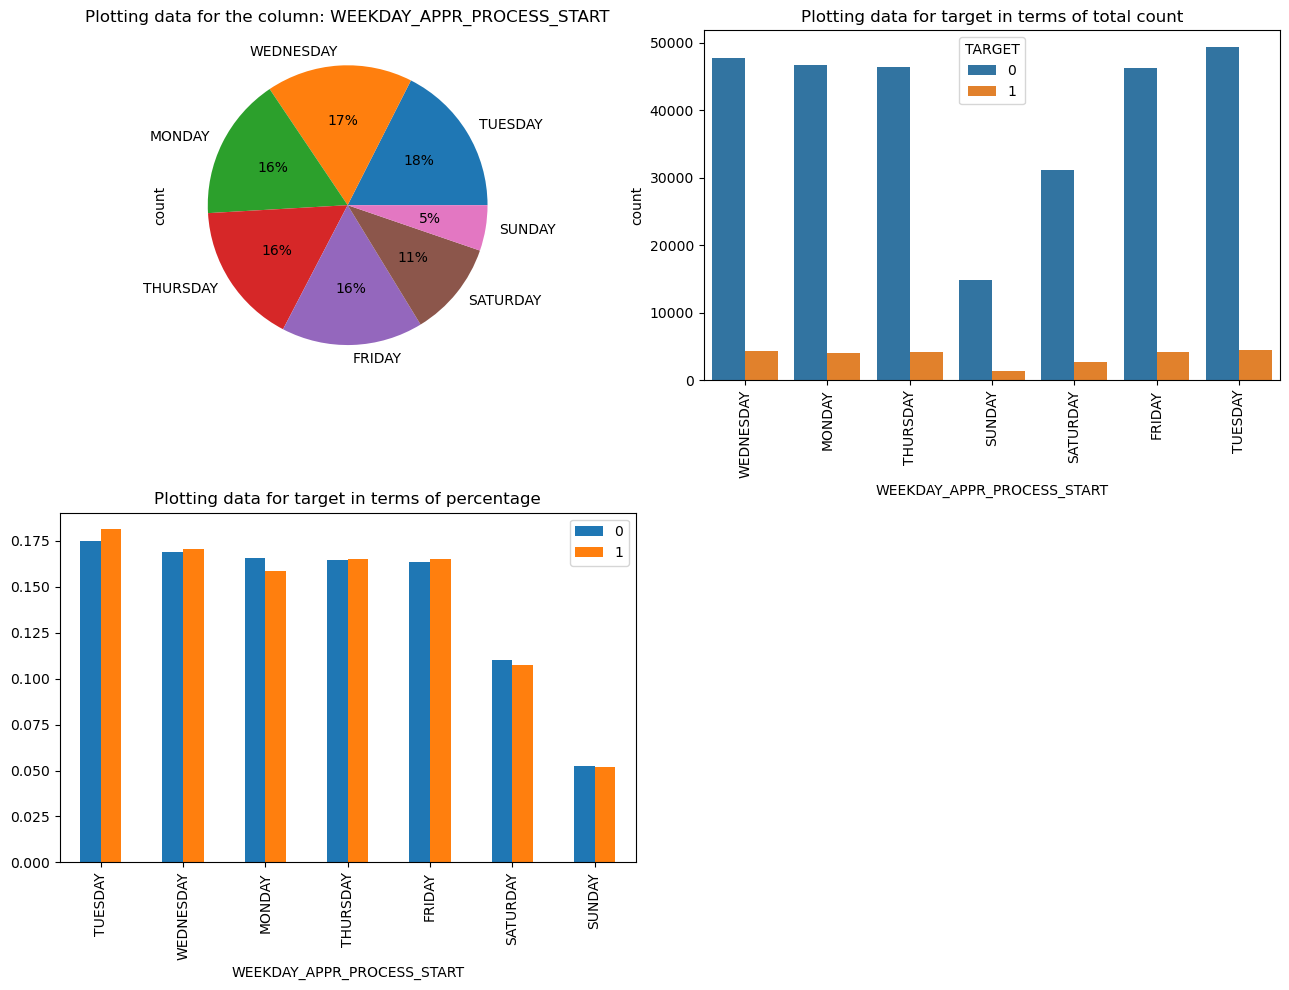

----------------------------------------------------------------------------------------------
Plotting  ORGANIZATION_TYPE


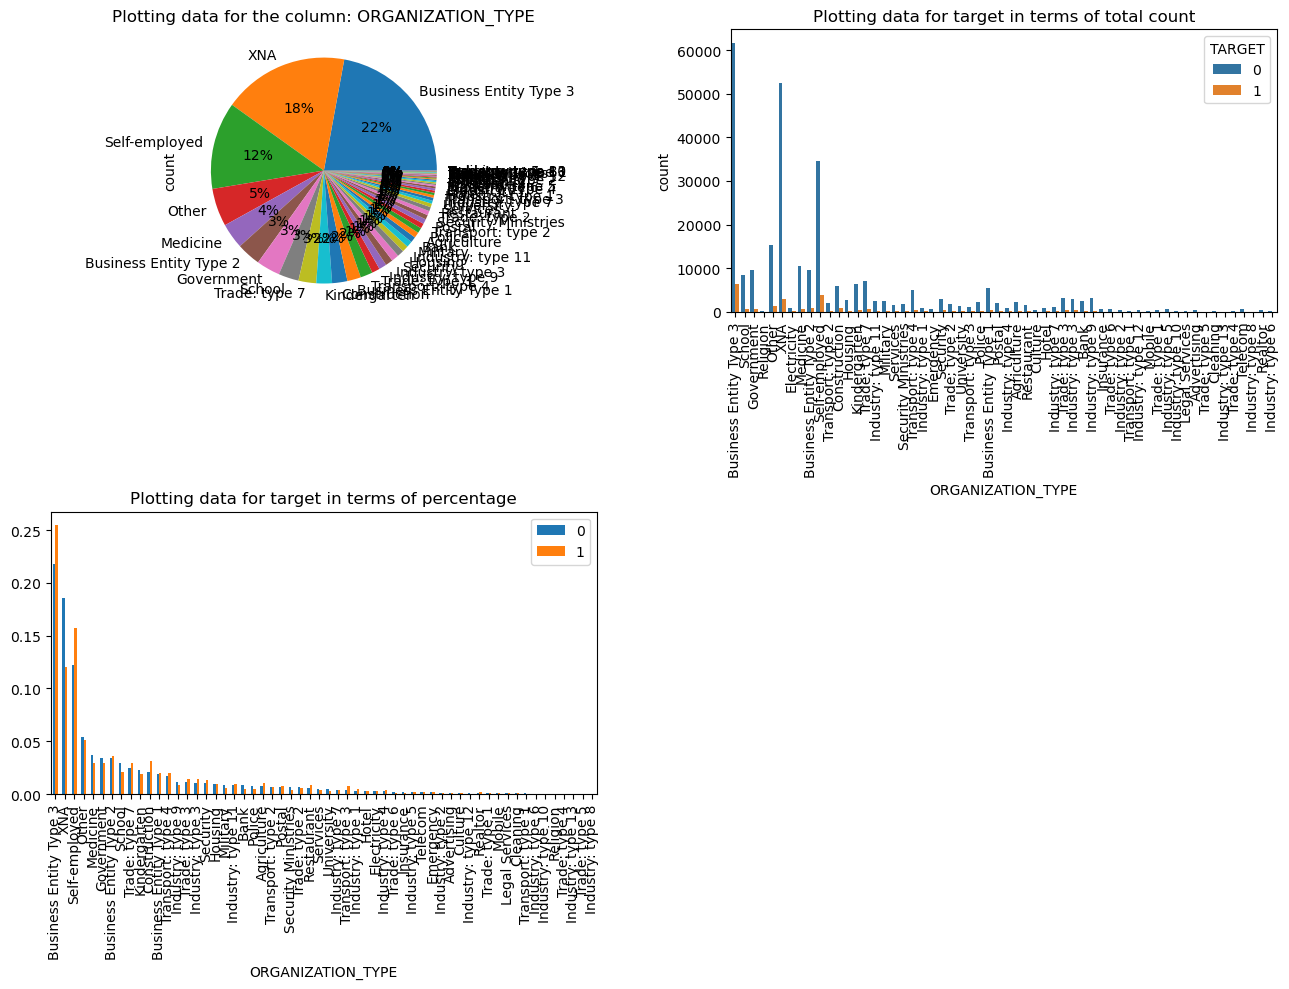

----------------------------------------------------------------------------------------------
Plotting  EMERGENCYSTATE_MODE


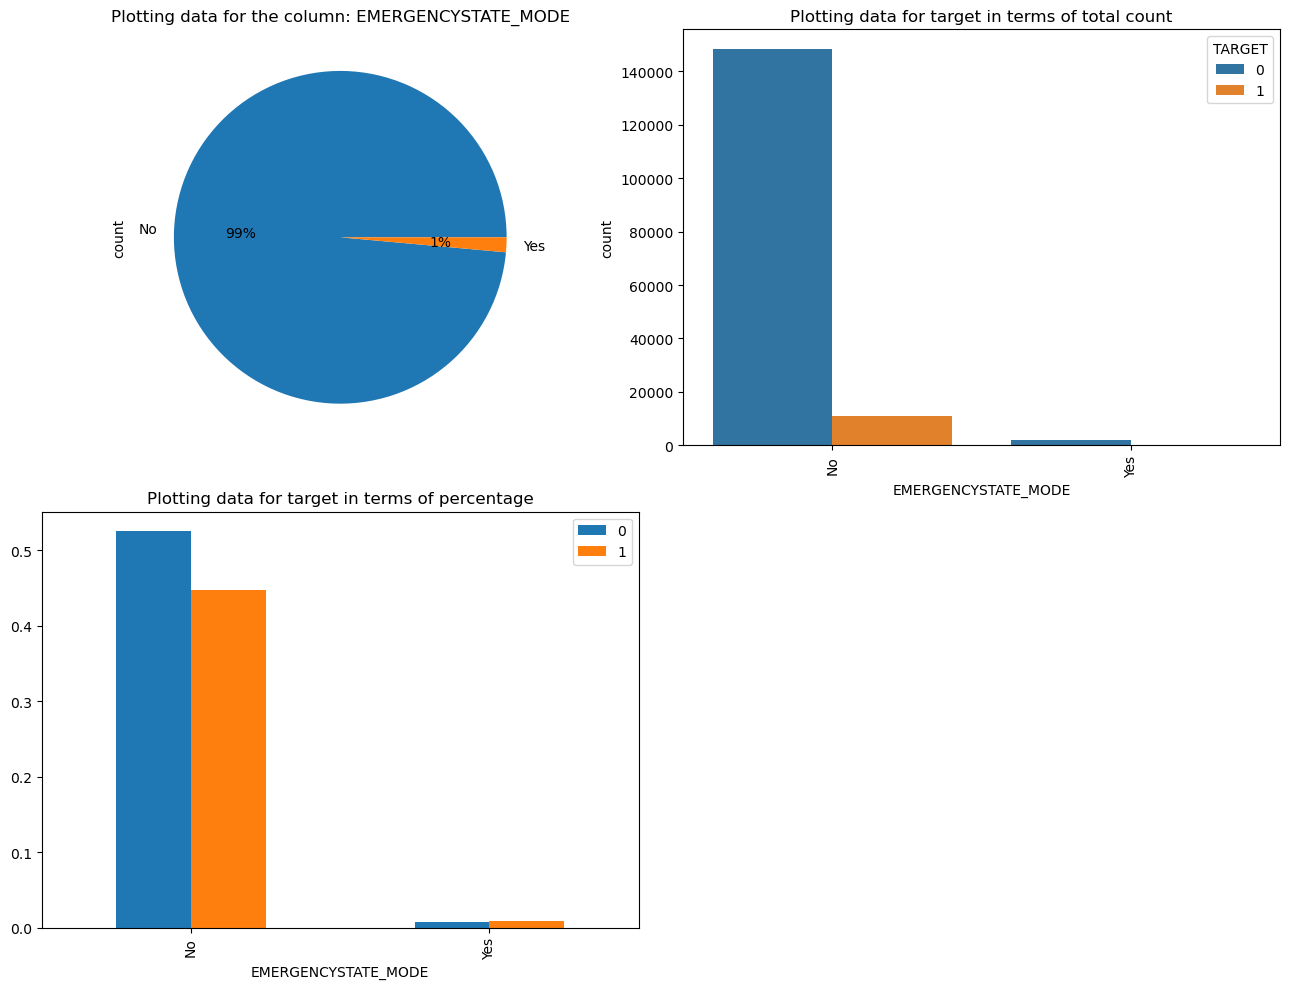

----------------------------------------------------------------------------------------------


In [178]:
for column in train_categorical:
    print("Plotting ", column)
    plotting(app_df, train_0, train_1, column)
    print('----------------------------------------------------------------------------------------------')

Observarions:

1. Total 90% of loans are in the form of cash loans and rest are revolving. People face more difficulty in case of cash     loans compared to revolving loans.

In [179]:
train_0.corr

<bound method DataFrame.corr of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
5           100008       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307505      456249       0         Cash loans           F            N   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1        

In [180]:
train_categorical = app_df.select_dtypes(include=['int64', 'float64']).columns
train_categorical

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

Text(0.5, 1.0, 'Plot of SK_ID_CURR')

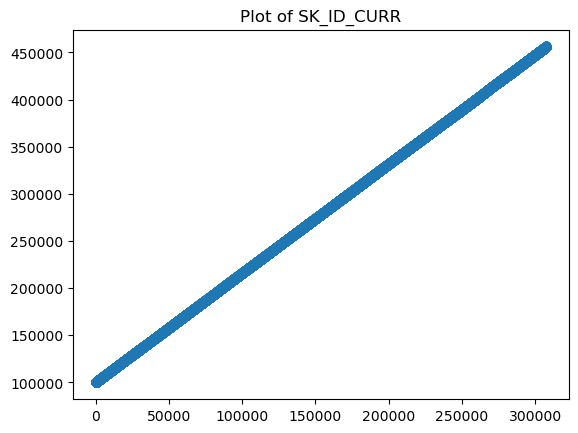

Text(0.5, 1.0, 'Plot of TARGET')

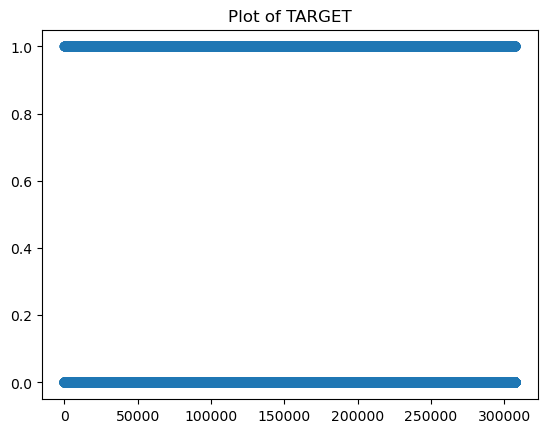

Text(0.5, 1.0, 'Plot of CNT_CHILDREN')

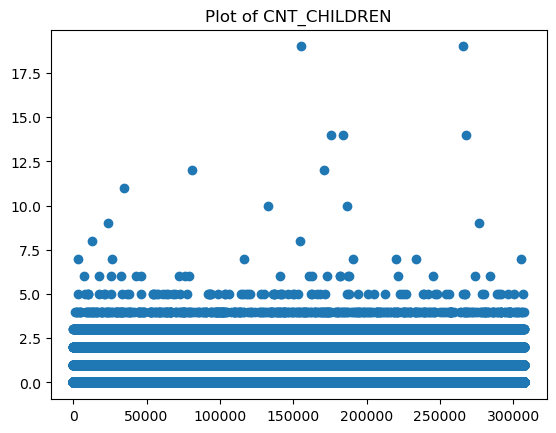

Text(0.5, 1.0, 'Plot of AMT_INCOME_TOTAL')

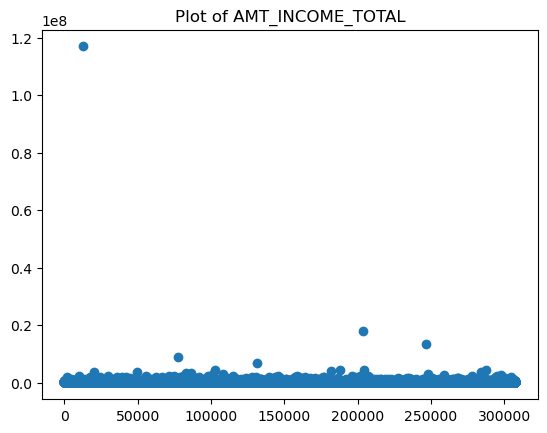

Text(0.5, 1.0, 'Plot of AMT_CREDIT')

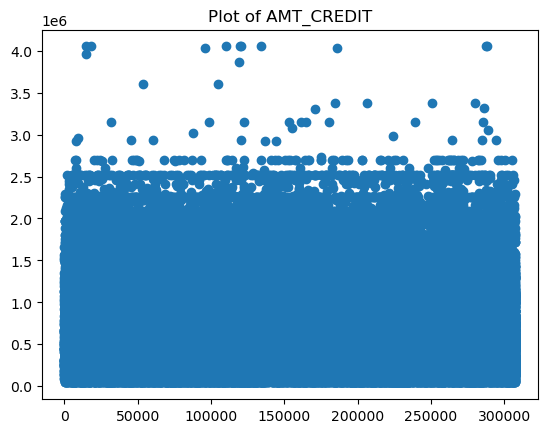

Text(0.5, 1.0, 'Plot of AMT_ANNUITY')

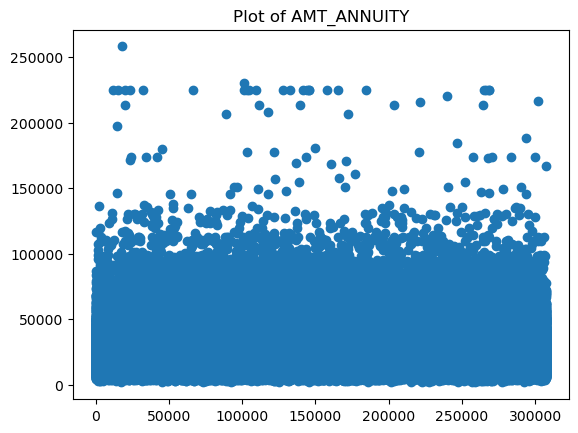

Text(0.5, 1.0, 'Plot of AMT_GOODS_PRICE')

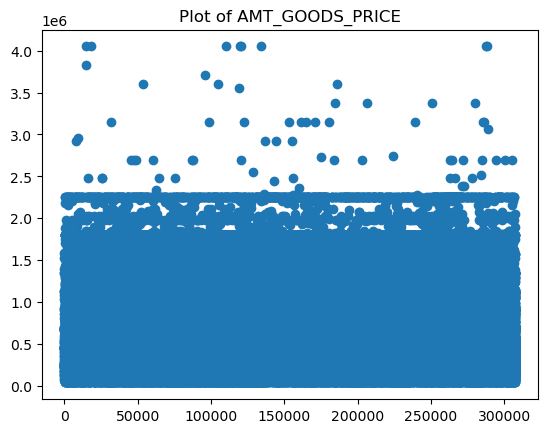

Text(0.5, 1.0, 'Plot of REGION_POPULATION_RELATIVE')

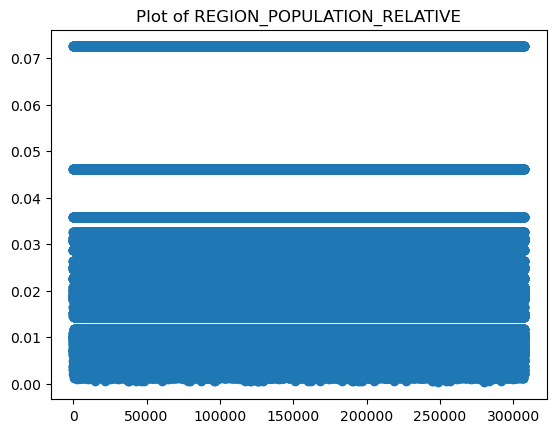

Text(0.5, 1.0, 'Plot of DAYS_BIRTH')

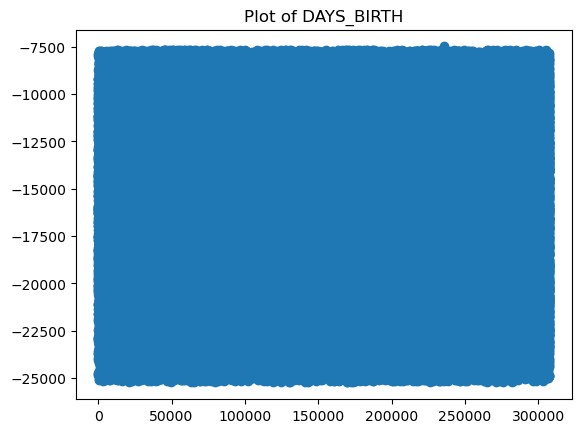

Text(0.5, 1.0, 'Plot of DAYS_EMPLOYED')

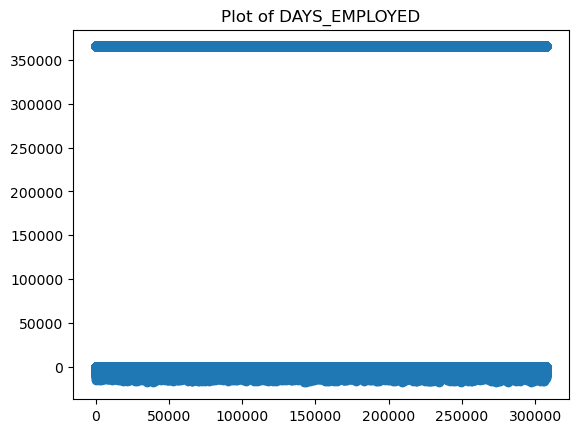

Text(0.5, 1.0, 'Plot of DAYS_REGISTRATION')

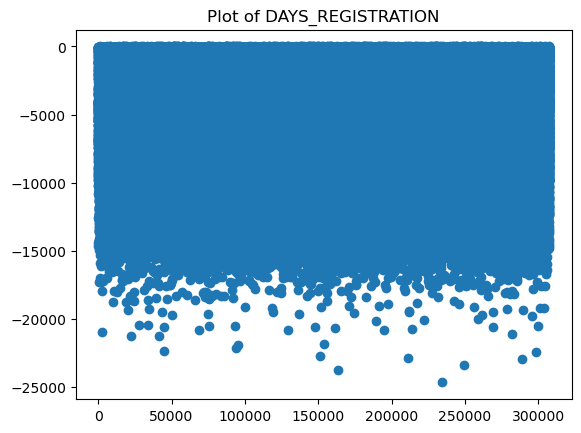

Text(0.5, 1.0, 'Plot of DAYS_ID_PUBLISH')

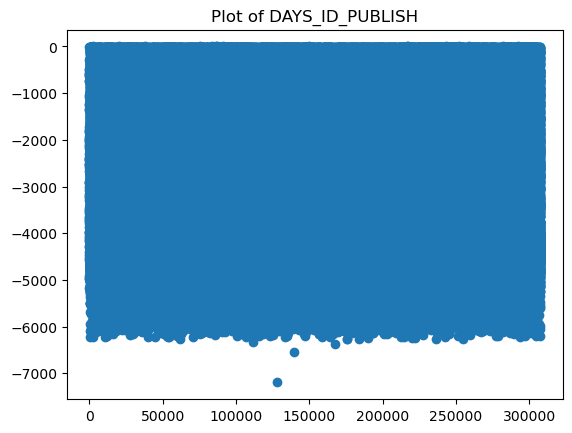

Text(0.5, 1.0, 'Plot of FLAG_MOBIL')

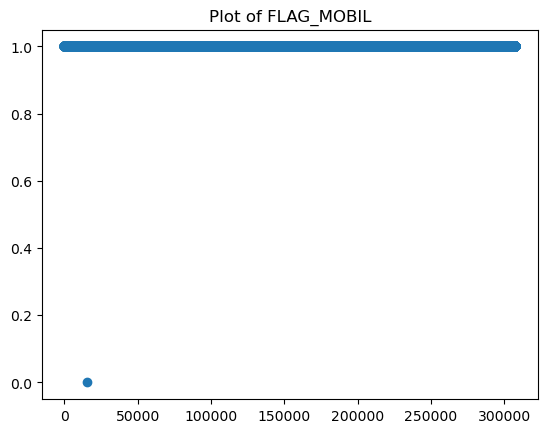

Text(0.5, 1.0, 'Plot of FLAG_EMP_PHONE')

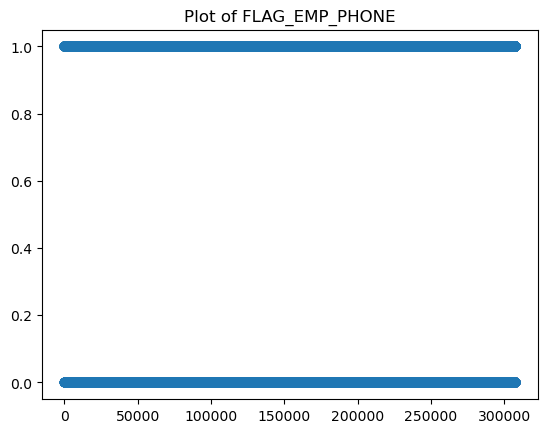

Text(0.5, 1.0, 'Plot of FLAG_WORK_PHONE')

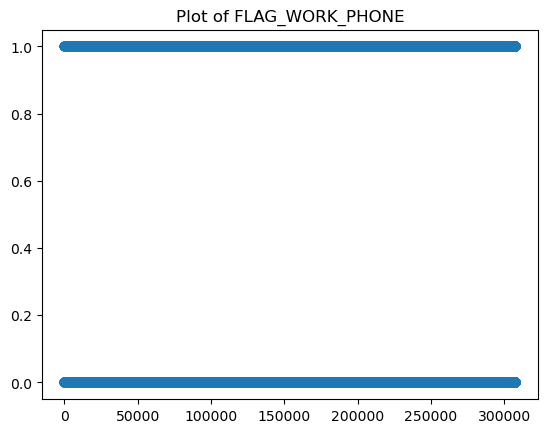

Text(0.5, 1.0, 'Plot of FLAG_CONT_MOBILE')

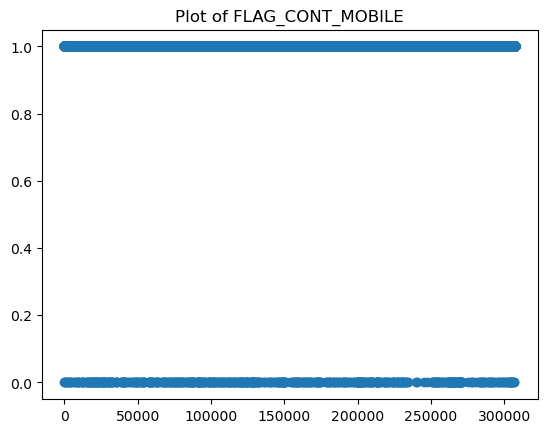

Text(0.5, 1.0, 'Plot of FLAG_PHONE')

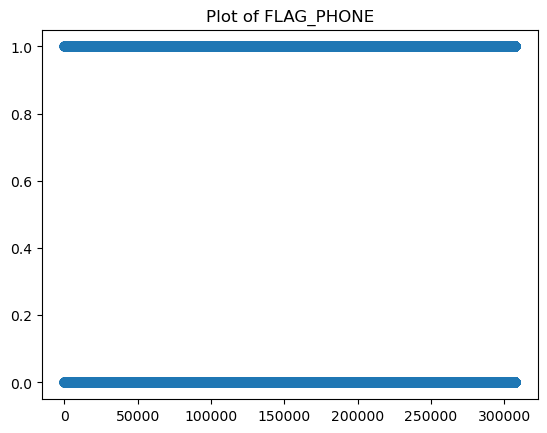

Text(0.5, 1.0, 'Plot of FLAG_EMAIL')

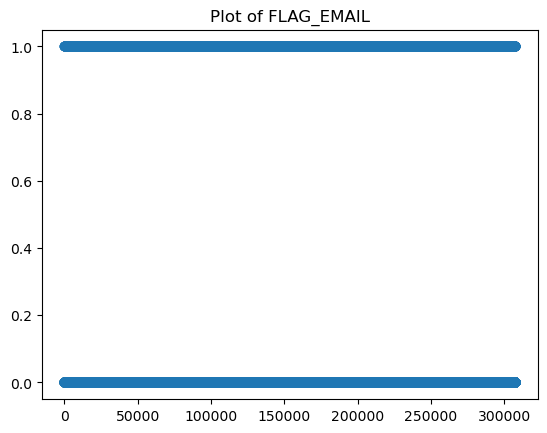

Text(0.5, 1.0, 'Plot of CNT_FAM_MEMBERS')

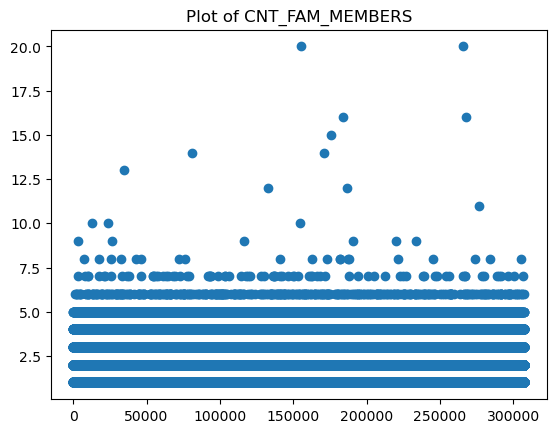

Text(0.5, 1.0, 'Plot of REGION_RATING_CLIENT')

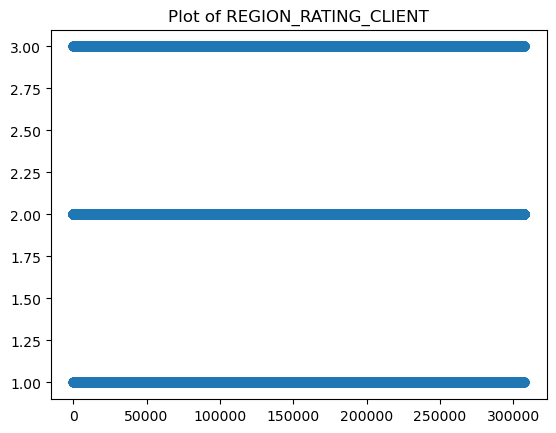

Text(0.5, 1.0, 'Plot of REGION_RATING_CLIENT_W_CITY')

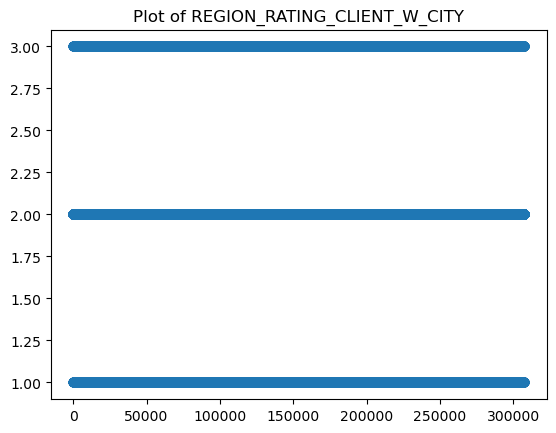

Text(0.5, 1.0, 'Plot of HOUR_APPR_PROCESS_START')

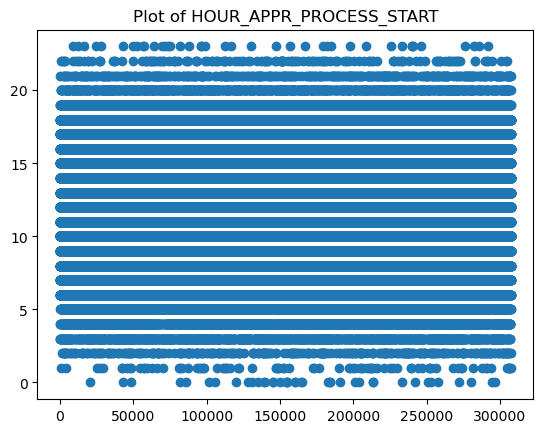

Text(0.5, 1.0, 'Plot of REG_REGION_NOT_LIVE_REGION')

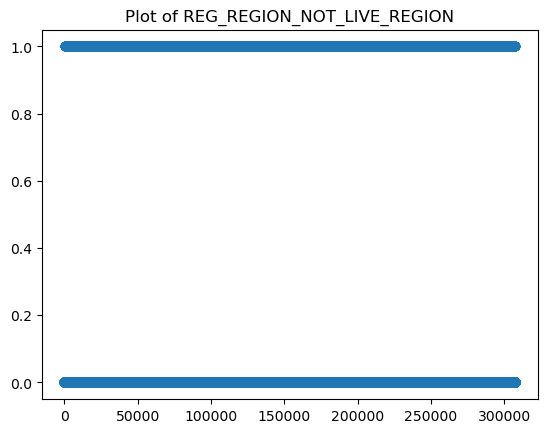

Text(0.5, 1.0, 'Plot of REG_REGION_NOT_WORK_REGION')

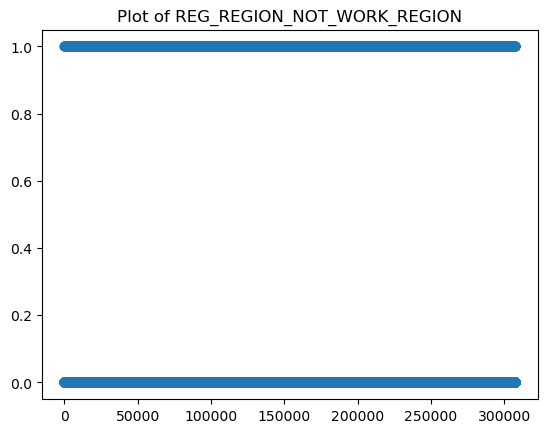

Text(0.5, 1.0, 'Plot of LIVE_REGION_NOT_WORK_REGION')

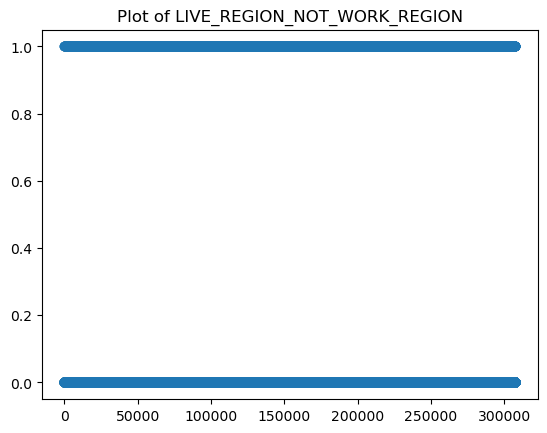

Text(0.5, 1.0, 'Plot of REG_CITY_NOT_LIVE_CITY')

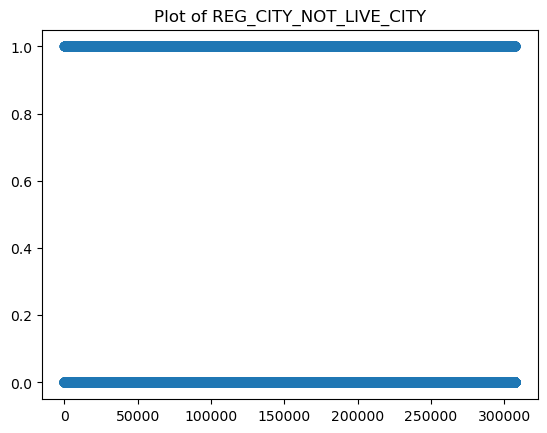

Text(0.5, 1.0, 'Plot of REG_CITY_NOT_WORK_CITY')

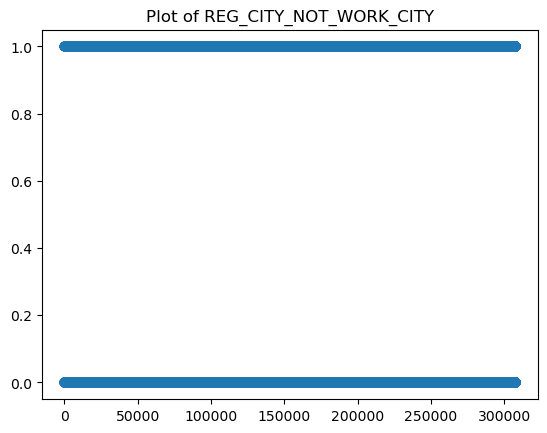

Text(0.5, 1.0, 'Plot of LIVE_CITY_NOT_WORK_CITY')

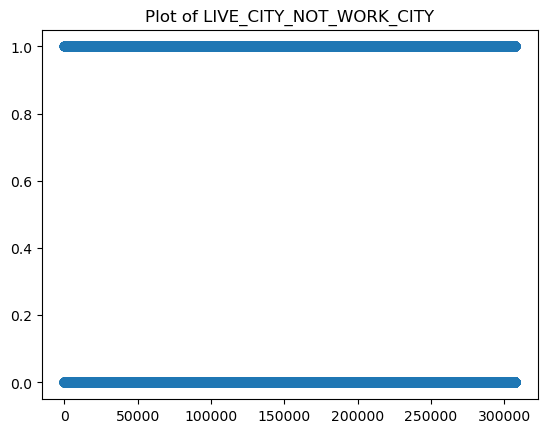

Text(0.5, 1.0, 'Plot of EXT_SOURCE_2')

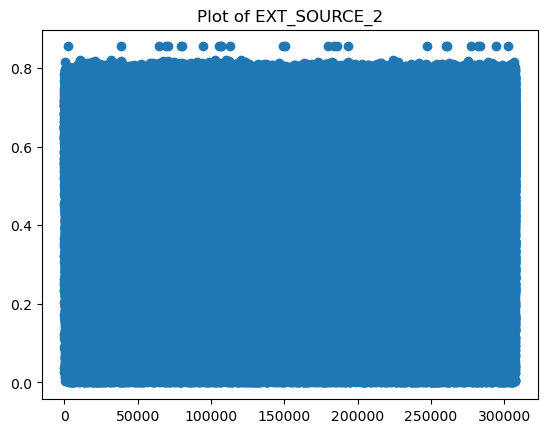

Text(0.5, 1.0, 'Plot of EXT_SOURCE_3')

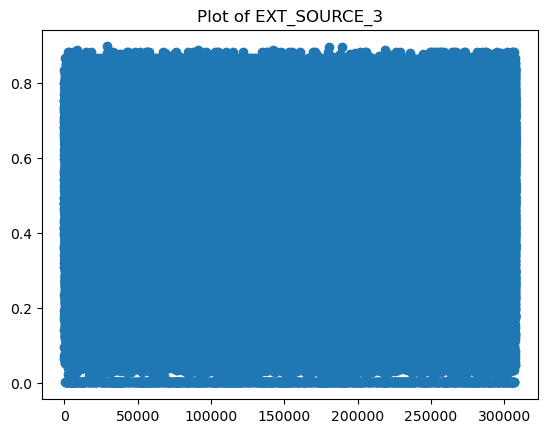

Text(0.5, 1.0, 'Plot of YEARS_BEGINEXPLUATATION_AVG')

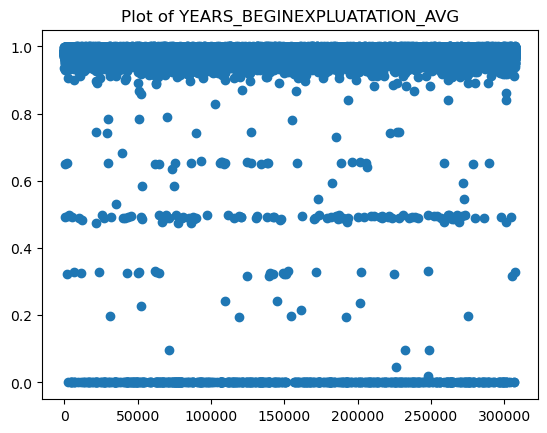

Text(0.5, 1.0, 'Plot of FLOORSMAX_AVG')

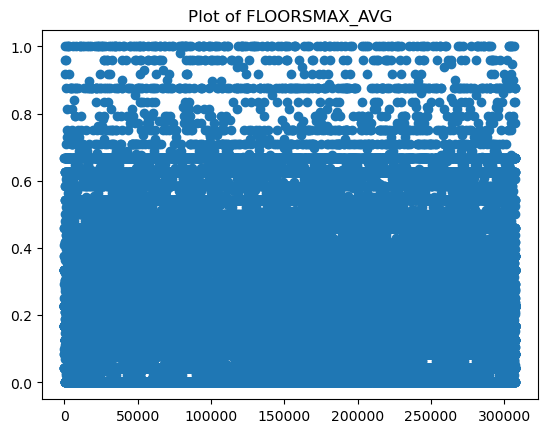

Text(0.5, 1.0, 'Plot of YEARS_BEGINEXPLUATATION_MODE')

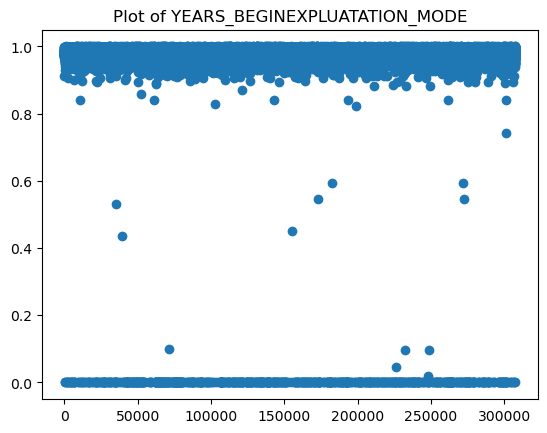

Text(0.5, 1.0, 'Plot of FLOORSMAX_MODE')

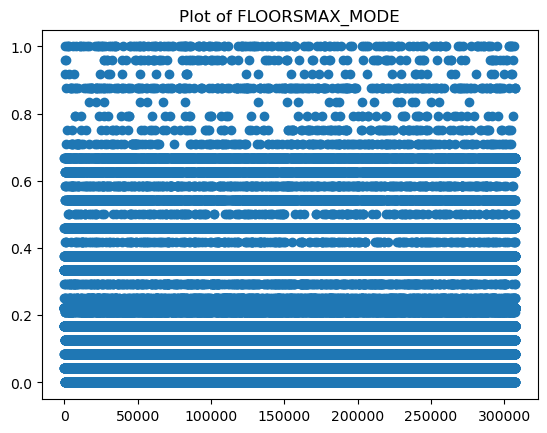

Text(0.5, 1.0, 'Plot of YEARS_BEGINEXPLUATATION_MEDI')

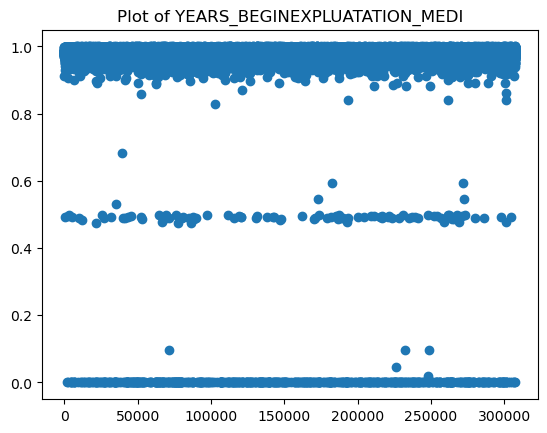

Text(0.5, 1.0, 'Plot of FLOORSMAX_MEDI')

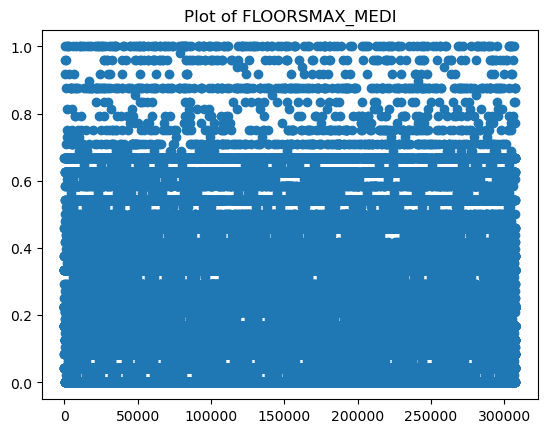

Text(0.5, 1.0, 'Plot of TOTALAREA_MODE')

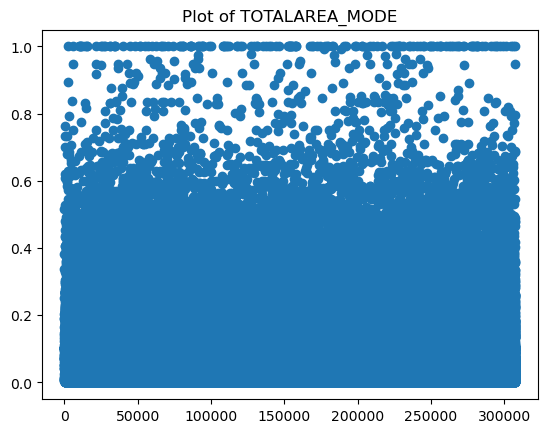

Text(0.5, 1.0, 'Plot of OBS_30_CNT_SOCIAL_CIRCLE')

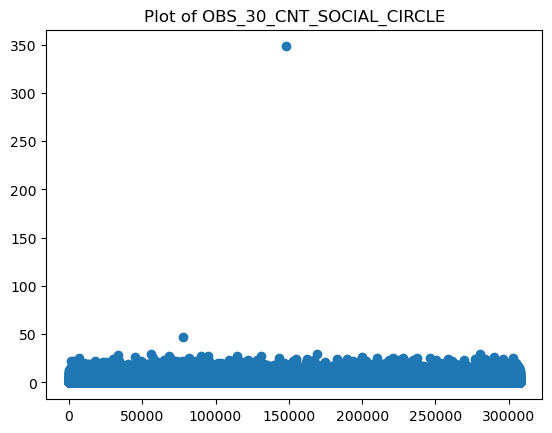

Text(0.5, 1.0, 'Plot of DEF_30_CNT_SOCIAL_CIRCLE')

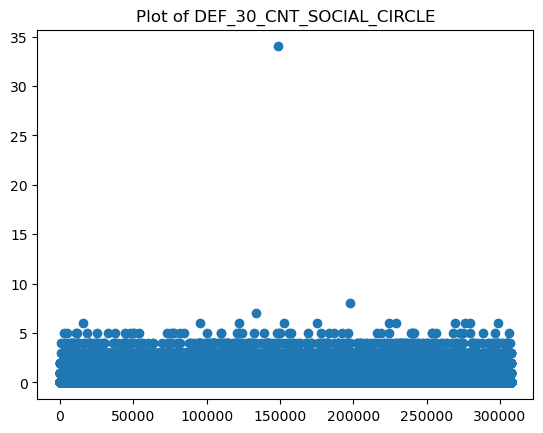

Text(0.5, 1.0, 'Plot of OBS_60_CNT_SOCIAL_CIRCLE')

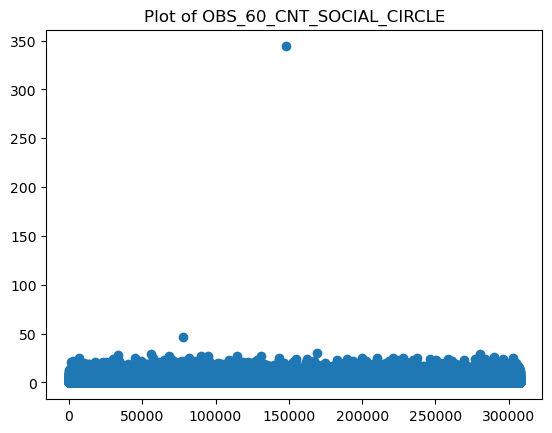

Text(0.5, 1.0, 'Plot of DEF_60_CNT_SOCIAL_CIRCLE')

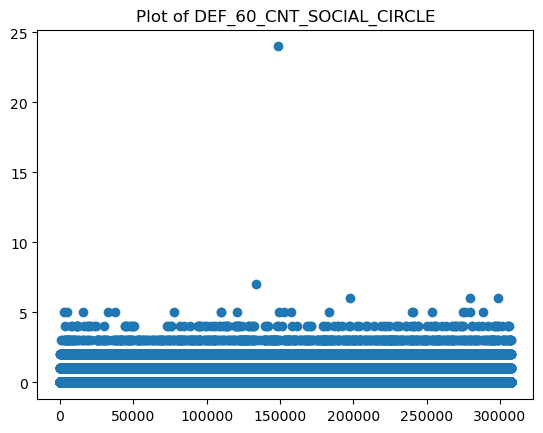

Text(0.5, 1.0, 'Plot of DAYS_LAST_PHONE_CHANGE')

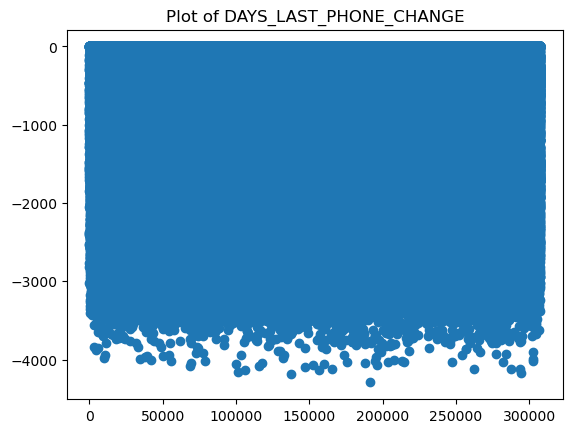

Text(0.5, 1.0, 'Plot of FLAG_DOCUMENT_2')

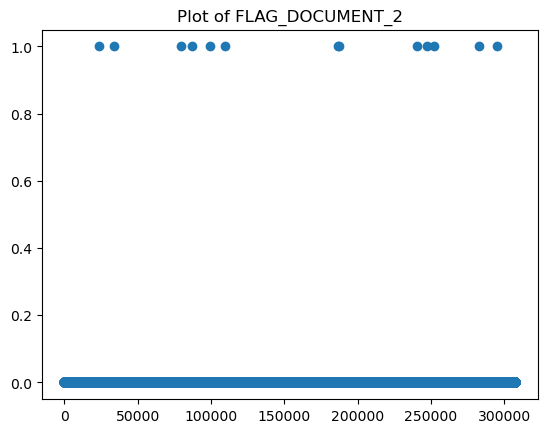

Text(0.5, 1.0, 'Plot of FLAG_DOCUMENT_3')

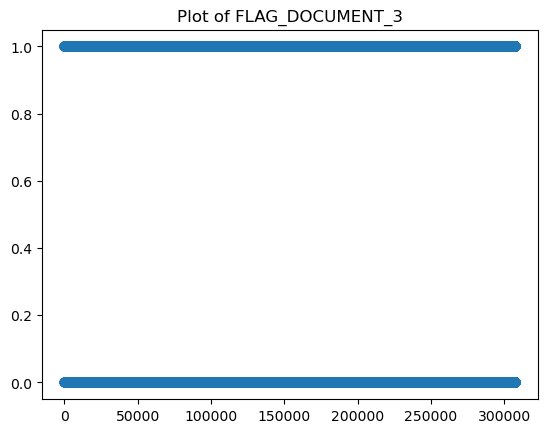

Text(0.5, 1.0, 'Plot of FLAG_DOCUMENT_4')

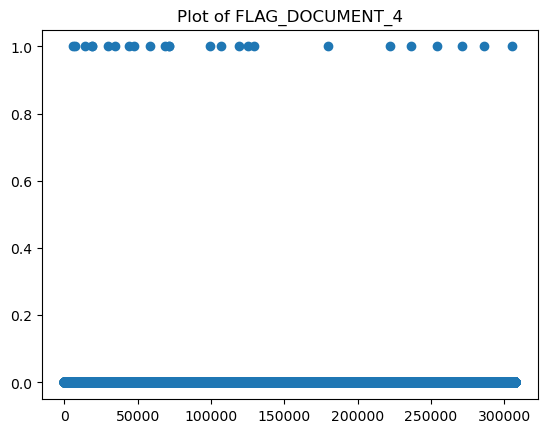

Text(0.5, 1.0, 'Plot of FLAG_DOCUMENT_5')

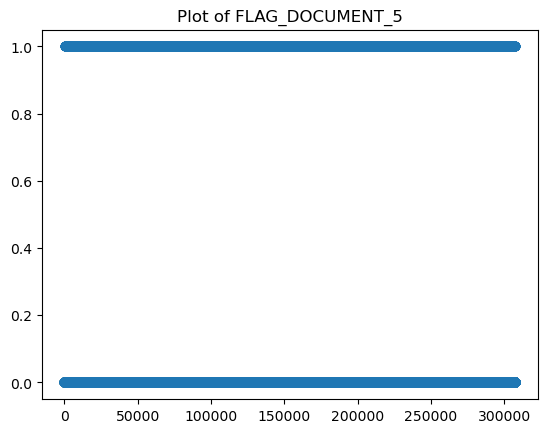

Text(0.5, 1.0, 'Plot of FLAG_DOCUMENT_6')

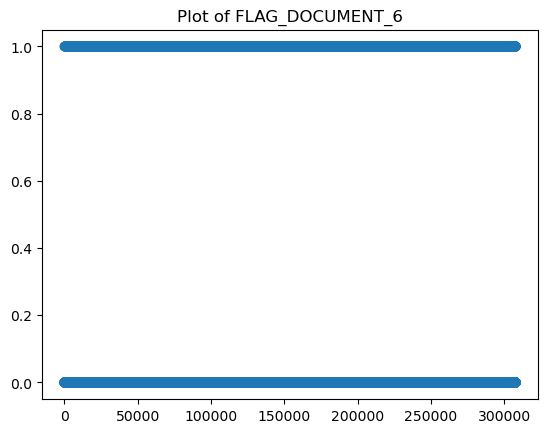

Text(0.5, 1.0, 'Plot of FLAG_DOCUMENT_7')

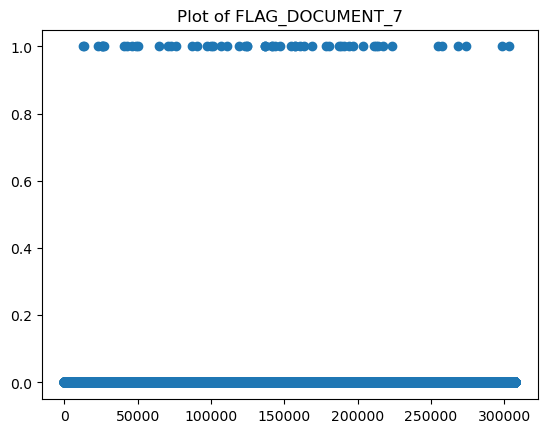

Text(0.5, 1.0, 'Plot of FLAG_DOCUMENT_8')

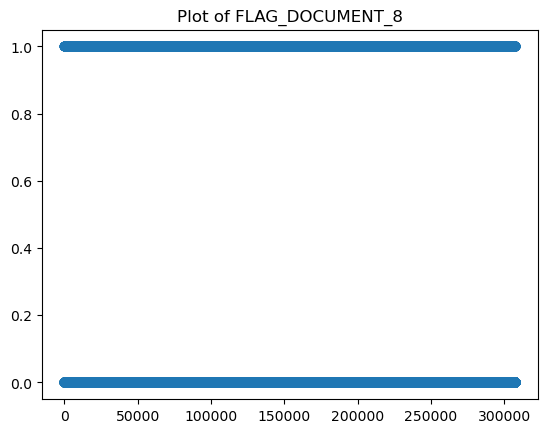

Text(0.5, 1.0, 'Plot of FLAG_DOCUMENT_9')

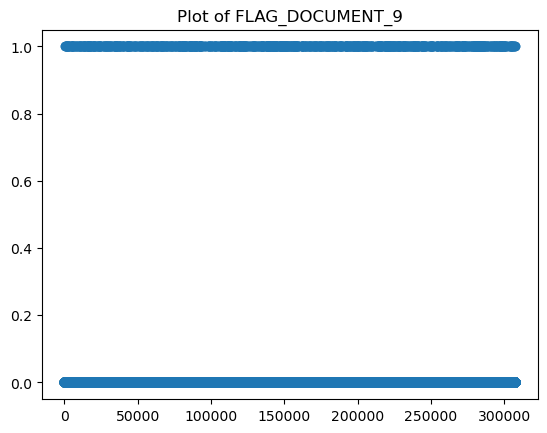

Text(0.5, 1.0, 'Plot of FLAG_DOCUMENT_10')

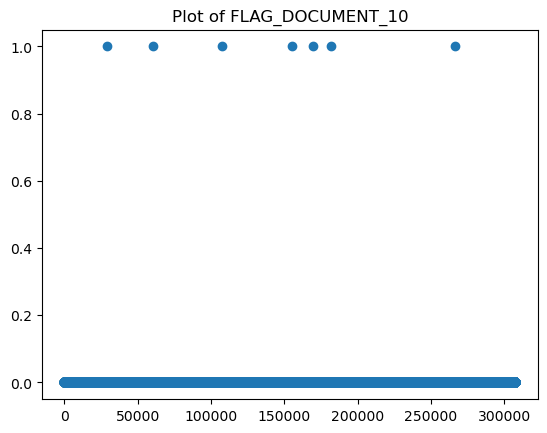

Text(0.5, 1.0, 'Plot of FLAG_DOCUMENT_11')

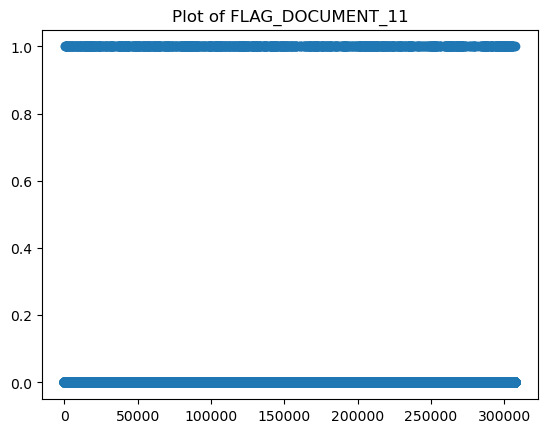

Text(0.5, 1.0, 'Plot of FLAG_DOCUMENT_12')

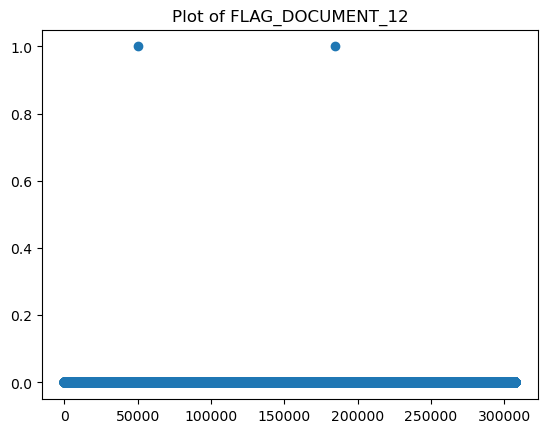

Text(0.5, 1.0, 'Plot of FLAG_DOCUMENT_13')

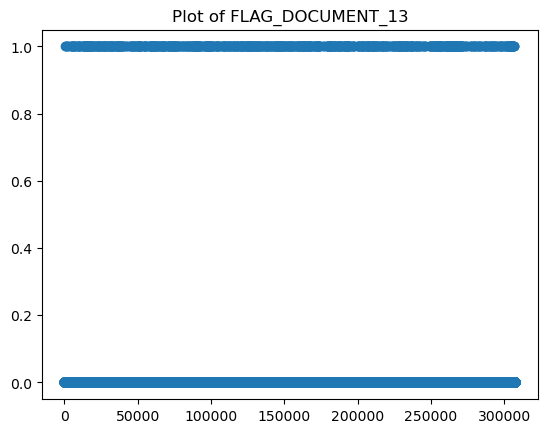

Text(0.5, 1.0, 'Plot of FLAG_DOCUMENT_14')

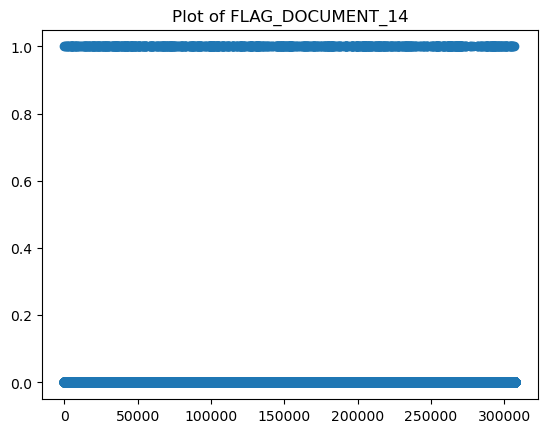

Text(0.5, 1.0, 'Plot of FLAG_DOCUMENT_15')

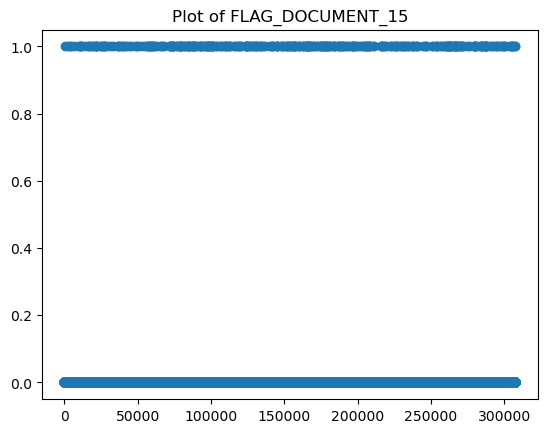

Text(0.5, 1.0, 'Plot of FLAG_DOCUMENT_16')

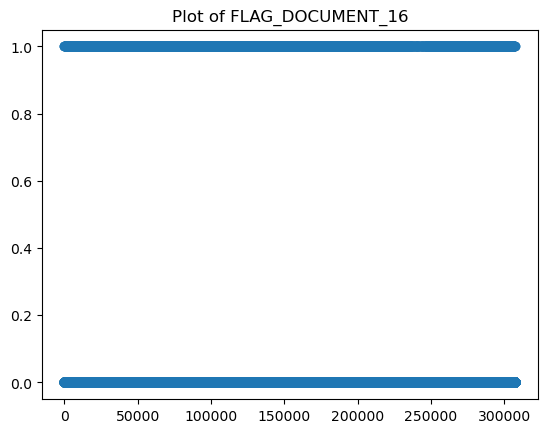

Text(0.5, 1.0, 'Plot of FLAG_DOCUMENT_17')

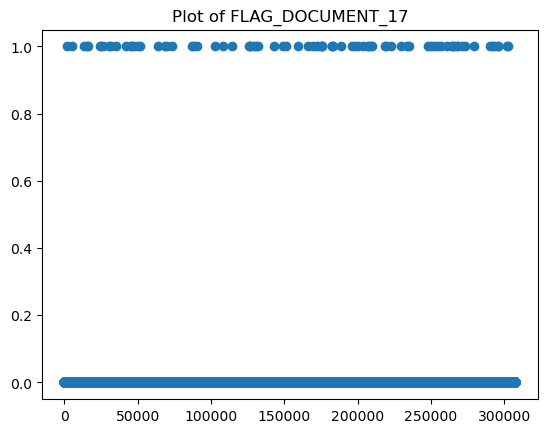

Text(0.5, 1.0, 'Plot of FLAG_DOCUMENT_18')

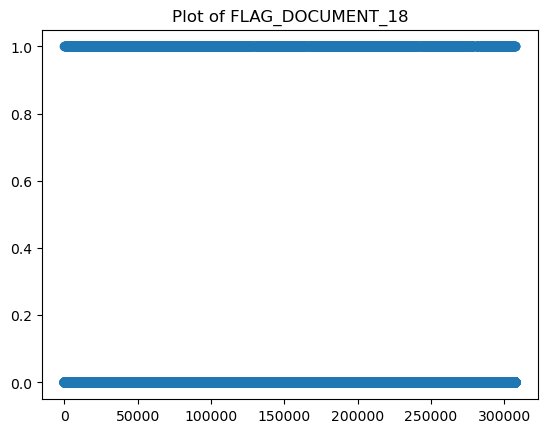

Text(0.5, 1.0, 'Plot of FLAG_DOCUMENT_19')

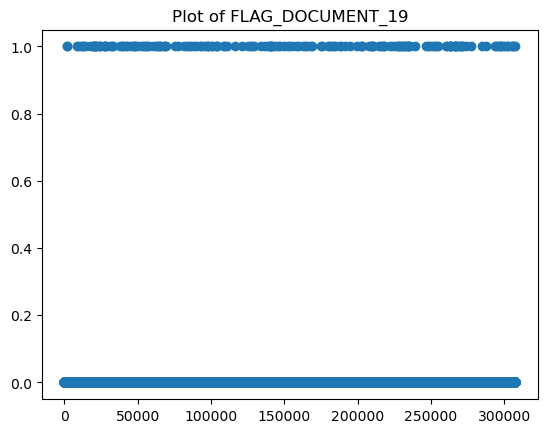

Text(0.5, 1.0, 'Plot of FLAG_DOCUMENT_20')

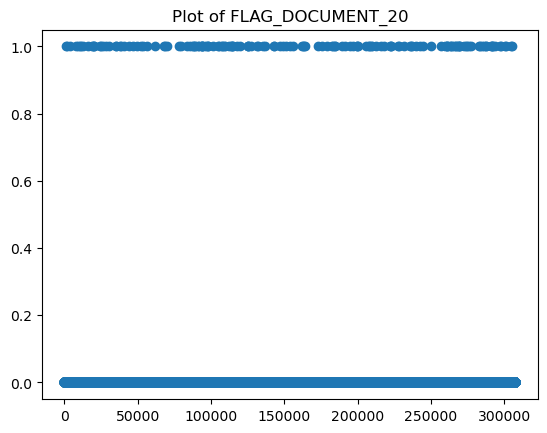

Text(0.5, 1.0, 'Plot of FLAG_DOCUMENT_21')

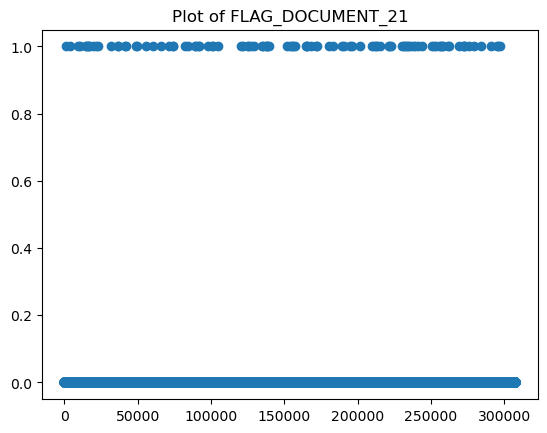

Text(0.5, 1.0, 'Plot of AMT_REQ_CREDIT_BUREAU_HOUR')

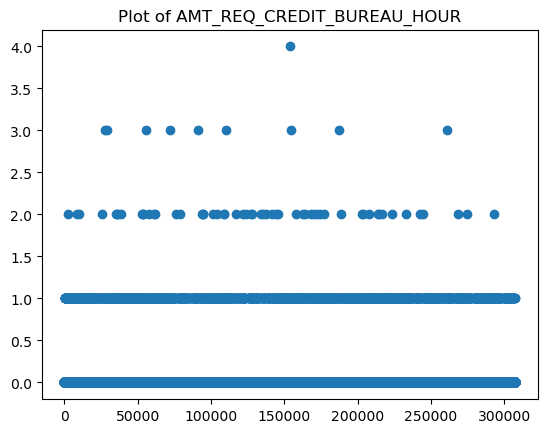

Text(0.5, 1.0, 'Plot of AMT_REQ_CREDIT_BUREAU_DAY')

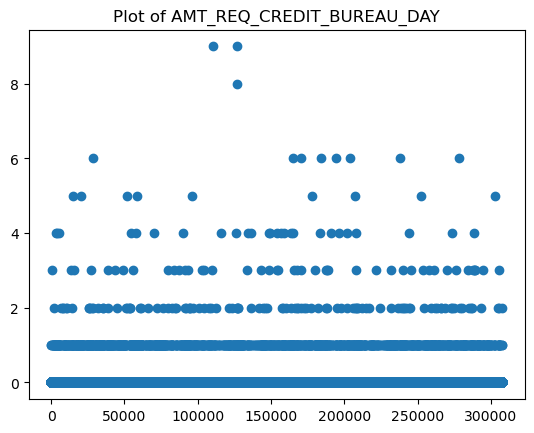

Text(0.5, 1.0, 'Plot of AMT_REQ_CREDIT_BUREAU_WEEK')

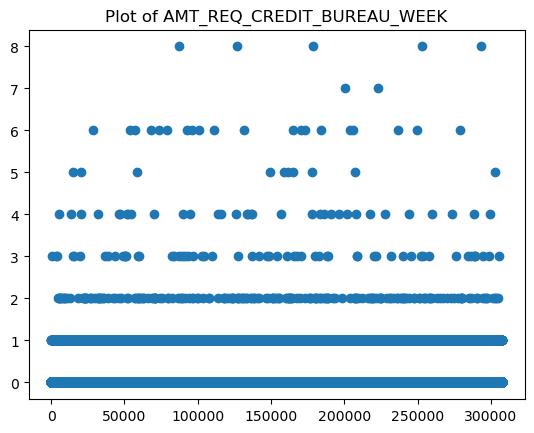

Text(0.5, 1.0, 'Plot of AMT_REQ_CREDIT_BUREAU_MON')

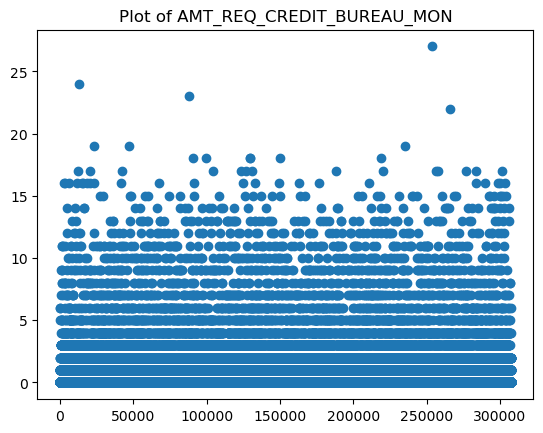

Text(0.5, 1.0, 'Plot of AMT_REQ_CREDIT_BUREAU_QRT')

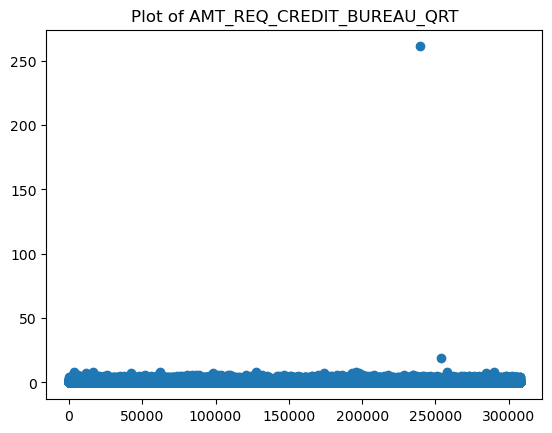

Text(0.5, 1.0, 'Plot of AMT_REQ_CREDIT_BUREAU_YEAR')

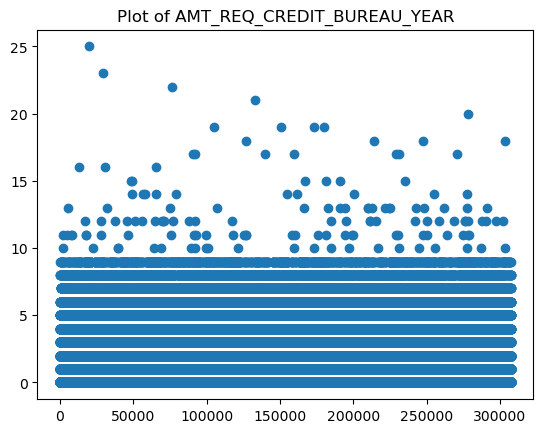

In [181]:
for column in train_categorical:
    title = "Plot of "+column
    plt.scatter(app_df.index, app_df[column])
    plt.title(title)
    plt.show()

There are some outliers present in AMT_INCOME_TOTAL, FLAG_MOBIL, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE and  DEF_60_CNT_SOCIAL_CIRCLE

<Axes: xlabel='AMT_ANNUITY', ylabel='Density'>

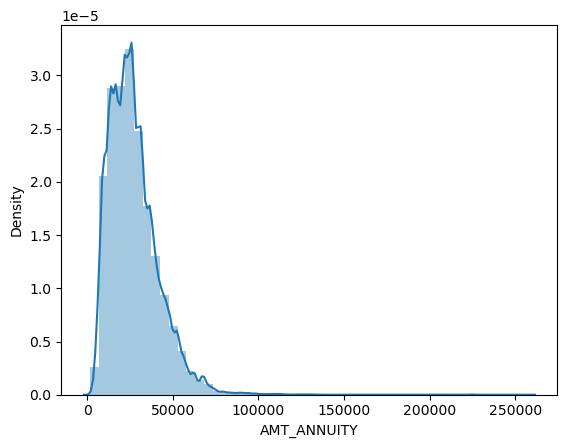

In [182]:
sns.distplot(app_df['AMT_ANNUITY'])
plt.show()

Plot of SK_ID_CURR


(array([28243., 28270., 28074., 28304., 28262., 28262., 28313., 28572.,
        27980., 28406.]),
 array([100003. , 135628.2, 171253.4, 206878.6, 242503.8, 278129. ,
        313754.2, 349379.4, 385004.6, 420629.8, 456255. ]),
 <BarContainer object of 10 artists>)

(array([2455., 2471., 2526., 2559., 2526., 2463., 2487., 2478., 2424.,
        2436.]),
 array([100002. , 135627.2, 171252.4, 206877.6, 242502.8, 278128. ,
        313753.2, 349378.4, 385003.6, 420628.8, 456254. ]),
 <BarContainer object of 10 artists>)

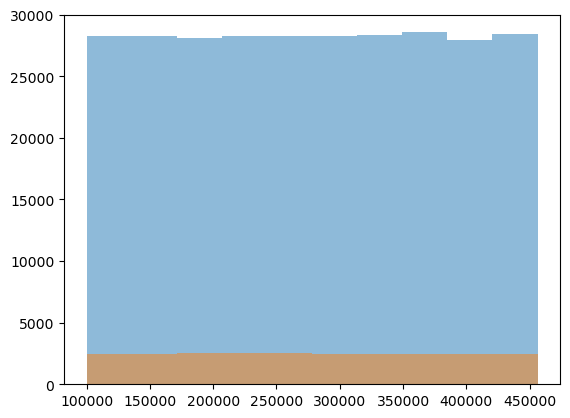

<Axes: xlabel='SK_ID_CURR', ylabel='Density'>

<Axes: xlabel='SK_ID_CURR', ylabel='Density'>

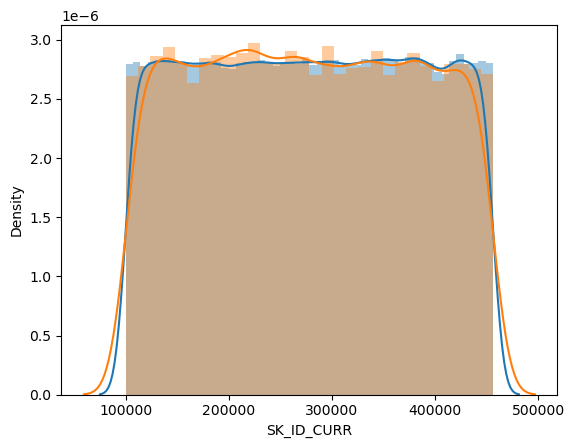

------------------------------------------------------------------------
Plot of TARGET


(array([     0.,      0.,      0.,      0.,      0., 282686.,      0.,
             0.,      0.,      0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

(array([    0.,     0.,     0.,     0.,     0., 24825.,     0.,     0.,
            0.,     0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

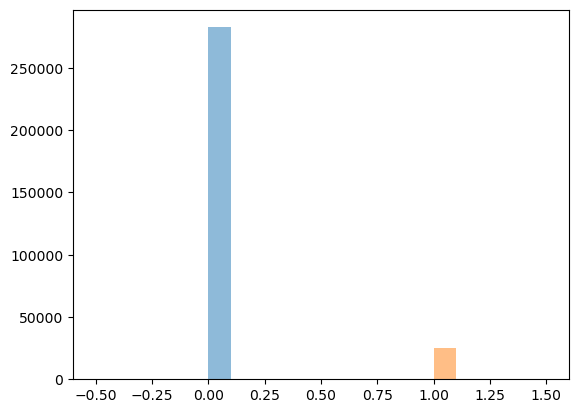

<Axes: xlabel='TARGET', ylabel='Density'>

<Axes: xlabel='TARGET', ylabel='Density'>

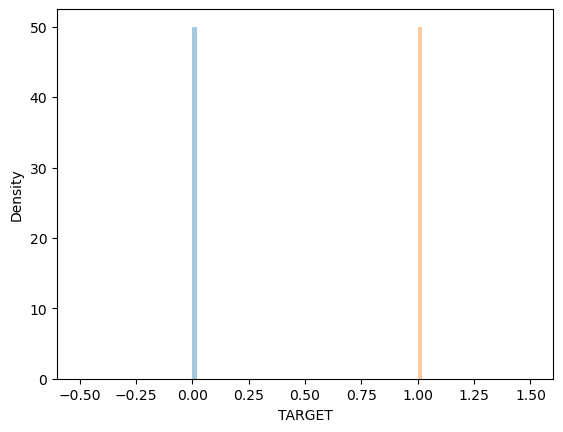

------------------------------------------------------------------------
Plot of CNT_CHILDREN


(array([2.54427e+05, 2.77750e+04, 4.51000e+02, 2.20000e+01, 2.00000e+00,
        2.00000e+00, 2.00000e+00, 3.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

(array([2.2063e+04, 2.3330e+03, 3.5800e+02, 5.5000e+01, 7.0000e+00,
        6.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

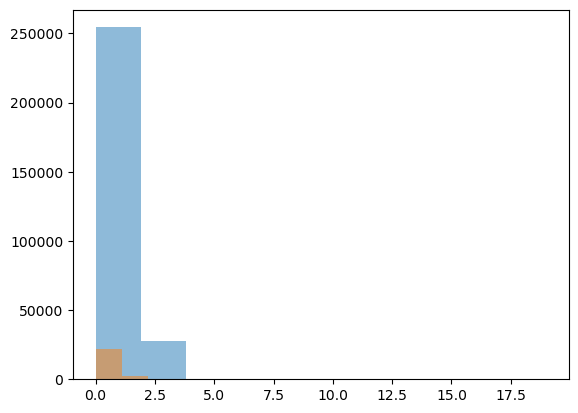

<Axes: xlabel='CNT_CHILDREN', ylabel='Density'>

<Axes: xlabel='CNT_CHILDREN', ylabel='Density'>

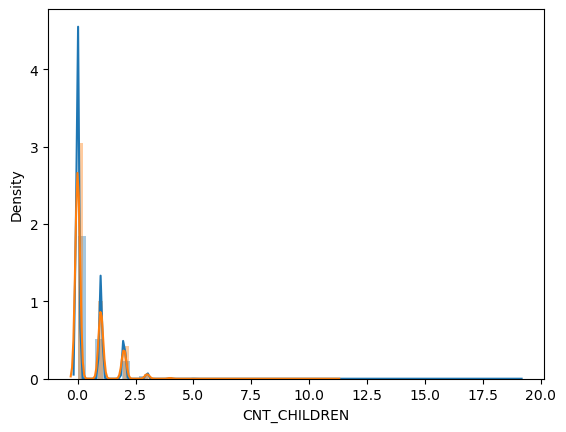

------------------------------------------------------------------------
Plot of AMT_INCOME_TOTAL


(array([2.82641e+05, 3.50000e+01, 6.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([   25650.,  1823094.,  3620538.,  5417982.,  7215426.,  9012870.,
        10810314., 12607758., 14405202., 16202646., 18000090.]),
 <BarContainer object of 10 artists>)

(array([2.4824e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([2.56500000e+04, 1.17230850e+07, 2.34205200e+07, 3.51179550e+07,
        4.68153900e+07, 5.85128250e+07, 7.02102600e+07, 8.19076950e+07,
        9.36051300e+07, 1.05302565e+08, 1.17000000e+08]),
 <BarContainer object of 10 artists>)

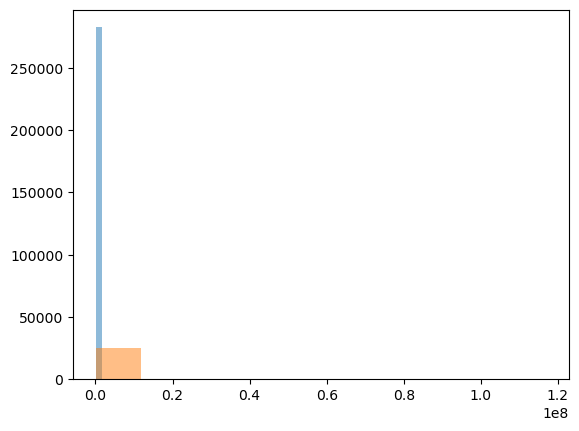

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

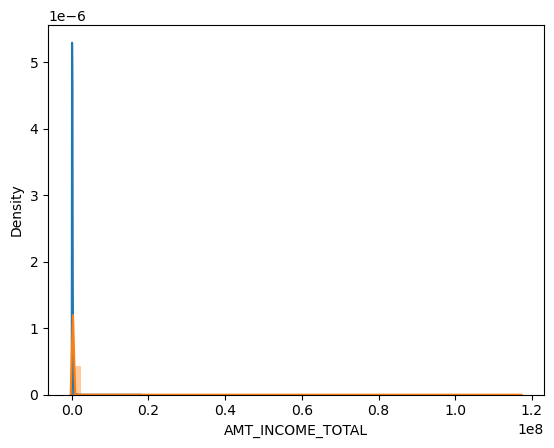

------------------------------------------------------------------------
Plot of AMT_CREDIT


(array([1.14742e+05, 1.02478e+05, 4.17050e+04, 1.77270e+04, 4.62900e+03,
        1.00400e+03, 3.61000e+02, 2.10000e+01, 8.00000e+00, 1.10000e+01]),
 array([  45000.,  445500.,  846000., 1246500., 1647000., 2047500.,
        2448000., 2848500., 3249000., 3649500., 4050000.]),
 <BarContainer object of 10 artists>)

(array([1.0252e+04, 1.0307e+04, 2.9420e+03, 1.0620e+03, 2.2000e+02,
        2.6000e+01, 1.3000e+01, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  45000.,  443268.,  841536., 1239804., 1638072., 2036340.,
        2434608., 2832876., 3231144., 3629412., 4027680.]),
 <BarContainer object of 10 artists>)

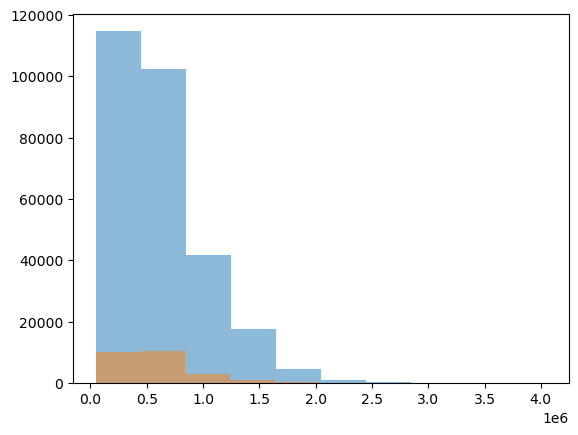

<Axes: xlabel='AMT_CREDIT', ylabel='Density'>

<Axes: xlabel='AMT_CREDIT', ylabel='Density'>

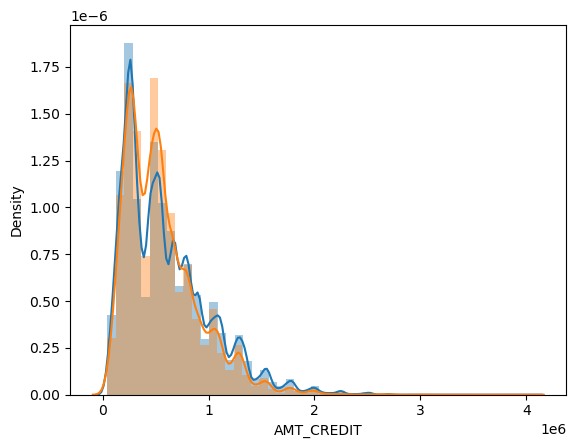

------------------------------------------------------------------------
Plot of AMT_ANNUITY


(array([1.64430e+05, 1.03036e+05, 1.35690e+04, 1.22200e+03, 2.96000e+02,
        6.00000e+01, 2.20000e+01, 5.00000e+00, 3.30000e+01, 1.00000e+00]),
 array([  1615.5,  27256.5,  52897.5,  78538.5, 104179.5, 129820.5,
        155461.5, 181102.5, 206743.5, 232384.5, 258025.5]),
 <BarContainer object of 10 artists>)

(array([6.2270e+03, 1.1851e+04, 5.1090e+03, 1.3270e+03, 2.5000e+02,
        3.9000e+01, 1.5000e+01, 4.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([  2722.5 ,  17371.35,  32020.2 ,  46669.05,  61317.9 ,  75966.75,
         90615.6 , 105264.45, 119913.3 , 134562.15, 149211.  ]),
 <BarContainer object of 10 artists>)

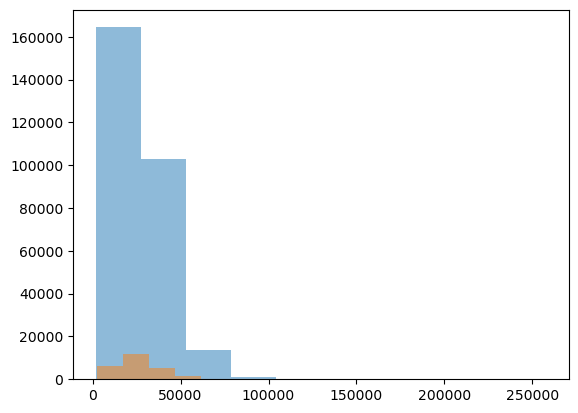

<Axes: xlabel='AMT_ANNUITY', ylabel='Density'>

<Axes: xlabel='AMT_ANNUITY', ylabel='Density'>

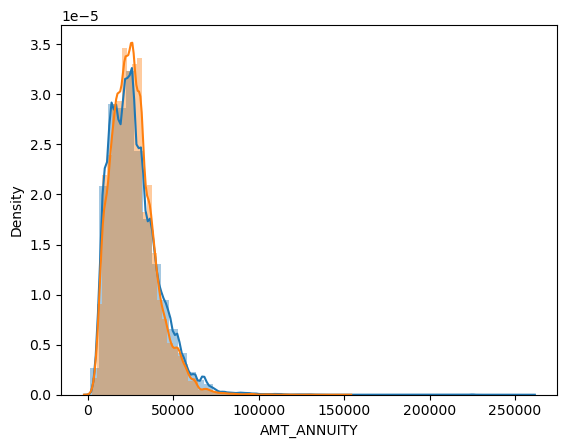

------------------------------------------------------------------------
Plot of AMT_GOODS_PRICE


(array([1.20416e+05, 1.05181e+05, 4.09510e+04, 1.18680e+04, 3.04100e+03,
        9.11000e+02, 2.80000e+01, 1.60000e+01, 7.00000e+00, 1.00000e+01]),
 array([  40500.,  441450.,  842400., 1243350., 1644300., 2045250.,
        2446200., 2847150., 3248100., 3649050., 4050000.]),
 <BarContainer object of 10 artists>)

(array([1.0573e+04, 1.0369e+04, 2.3810e+03, 1.1940e+03, 2.3900e+02,
        2.6000e+01, 1.9000e+01, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  45000.,  400500.,  756000., 1111500., 1467000., 1822500.,
        2178000., 2533500., 2889000., 3244500., 3600000.]),
 <BarContainer object of 10 artists>)

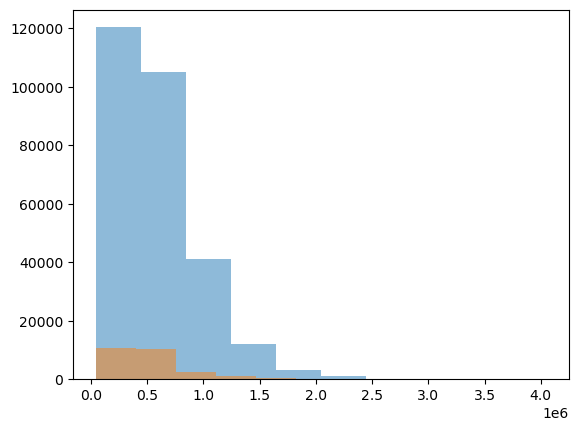

<Axes: xlabel='AMT_GOODS_PRICE', ylabel='Density'>

<Axes: xlabel='AMT_GOODS_PRICE', ylabel='Density'>

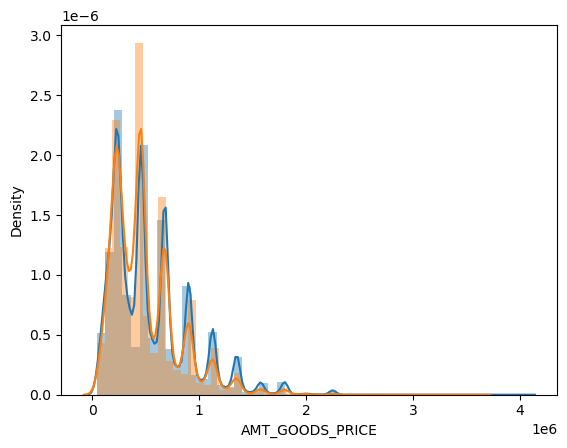

------------------------------------------------------------------------
Plot of REGION_POPULATION_RELATIVE


(array([45972., 57396., 67392., 47865., 43204.,     0., 12779.,     0.,
            0.,  8078.]),
 array([0.00029  , 0.0075118, 0.0147336, 0.0219554, 0.0291772, 0.036399 ,
        0.0436208, 0.0508426, 0.0580644, 0.0652862, 0.072508 ]),
 <BarContainer object of 10 artists>)

(array([4445., 5079., 6983., 3997., 3324.,    0.,  663.,    0.,    0.,
         334.]),
 array([0.000533 , 0.0077305, 0.014928 , 0.0221255, 0.029323 , 0.0365205,
        0.043718 , 0.0509155, 0.058113 , 0.0653105, 0.072508 ]),
 <BarContainer object of 10 artists>)

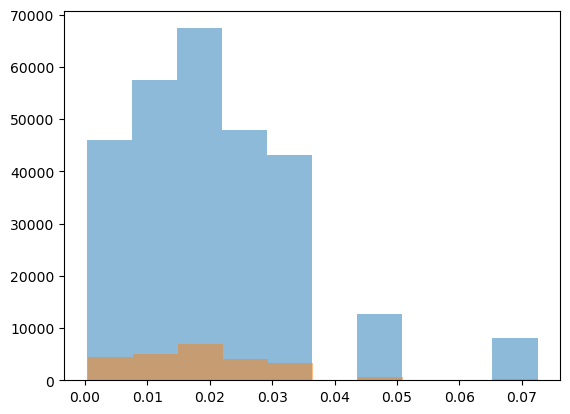

<Axes: xlabel='REGION_POPULATION_RELATIVE', ylabel='Density'>

<Axes: xlabel='REGION_POPULATION_RELATIVE', ylabel='Density'>

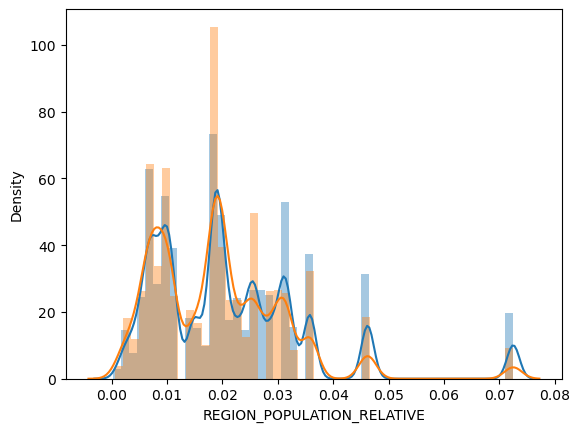

------------------------------------------------------------------------
Plot of DAYS_BIRTH


(array([11462., 26221., 30809., 31270., 31778., 37163., 38022., 34514.,
        29430., 12017.]),
 array([-25229., -23455., -21681., -19907., -18133., -16359., -14585.,
        -12811., -11037.,  -9263.,  -7489.]),
 <BarContainer object of 10 artists>)

(array([ 525., 1453., 1797., 2250., 2506., 3107., 3679., 3818., 3835.,
        1855.]),
 array([-25168., -23419., -21670., -19921., -18172., -16423., -14674.,
        -12925., -11176.,  -9427.,  -7678.]),
 <BarContainer object of 10 artists>)

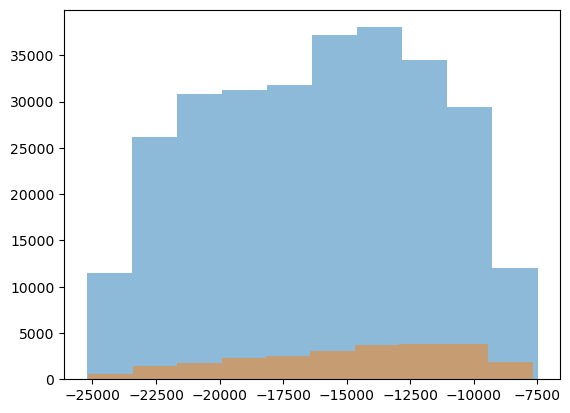

<Axes: xlabel='DAYS_BIRTH', ylabel='Density'>

<Axes: xlabel='DAYS_BIRTH', ylabel='Density'>

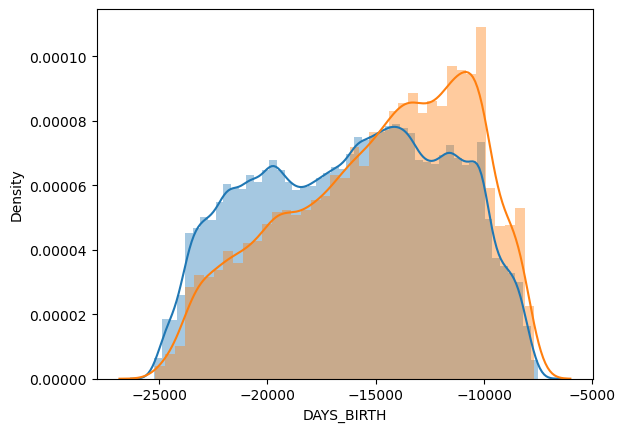

------------------------------------------------------------------------
Plot of DAYS_EMPLOYED


(array([230302.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  52384.]),
 array([-17912. ,  20403.5,  58719. ,  97034.5, 135350. , 173665.5,
        211981. , 250296.5, 288612. , 326927.5, 365243. ]),
 <BarContainer object of 10 artists>)

(array([21835.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2990.]),
 array([-16069. ,  22062.2,  60193.4,  98324.6, 136455.8, 174587. ,
        212718.2, 250849.4, 288980.6, 327111.8, 365243. ]),
 <BarContainer object of 10 artists>)

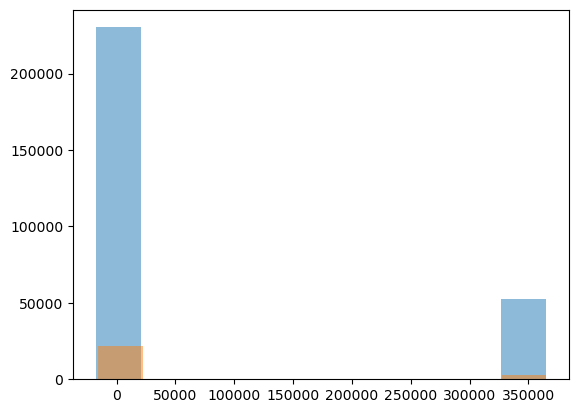

<Axes: xlabel='DAYS_EMPLOYED', ylabel='Density'>

<Axes: xlabel='DAYS_EMPLOYED', ylabel='Density'>

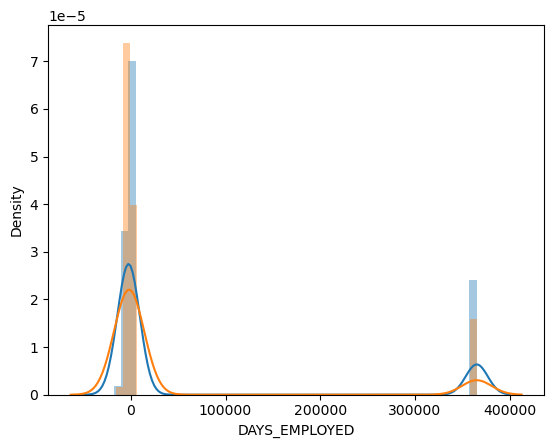

------------------------------------------------------------------------
Plot of DAYS_REGISTRATION


(array([7.0000e+00, 2.4000e+01, 1.2500e+02, 1.2360e+03, 7.6260e+03,
        2.0936e+04, 4.3547e+04, 5.5326e+04, 7.1998e+04, 8.1861e+04]),
 array([-24672. , -22204.8, -19737.6, -17270.4, -14803.2, -12336. ,
         -9868.8,  -7401.6,  -4934.4,  -2467.2,      0. ]),
 <BarContainer object of 10 artists>)

(array([1.000e+00, 3.000e+00, 1.500e+01, 1.390e+02, 6.650e+02, 1.650e+03,
        3.360e+03, 5.019e+03, 6.260e+03, 7.713e+03]),
 array([-22928. , -20635.2, -18342.4, -16049.6, -13756.8, -11464. ,
         -9171.2,  -6878.4,  -4585.6,  -2292.8,      0. ]),
 <BarContainer object of 10 artists>)

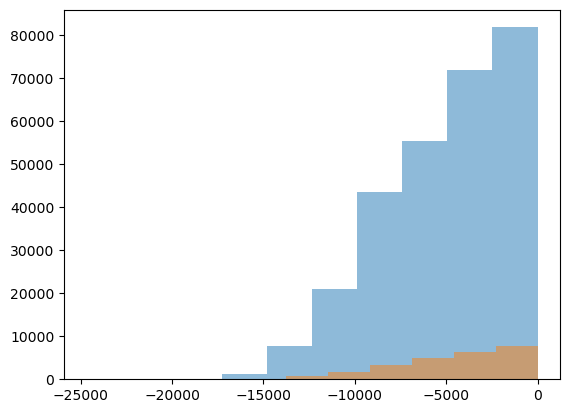

<Axes: xlabel='DAYS_REGISTRATION', ylabel='Density'>

<Axes: xlabel='DAYS_REGISTRATION', ylabel='Density'>

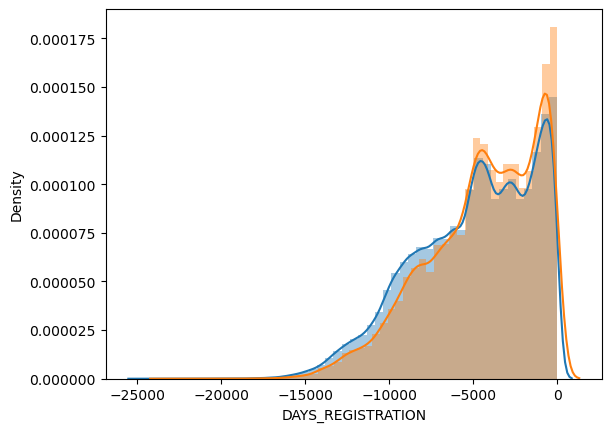

------------------------------------------------------------------------
Plot of DAYS_ID_PUBLISH


(array([2.0000e+00, 1.0710e+03, 9.1770e+03, 5.9767e+04, 5.6321e+04,
        3.4578e+04, 3.3691e+04, 3.0212e+04, 3.0681e+04, 2.7186e+04]),
 array([-7197. , -6477.3, -5757.6, -5037.9, -4318.2, -3598.5, -2878.8,
        -2159.1, -1439.4,  -719.7,     0. ]),
 <BarContainer object of 10 artists>)

(array([ 119.,  778., 3450., 4321., 2424., 2812., 2655., 2717., 2885.,
        2664.]),
 array([-6207. , -5586.3, -4965.6, -4344.9, -3724.2, -3103.5, -2482.8,
        -1862.1, -1241.4,  -620.7,     0. ]),
 <BarContainer object of 10 artists>)

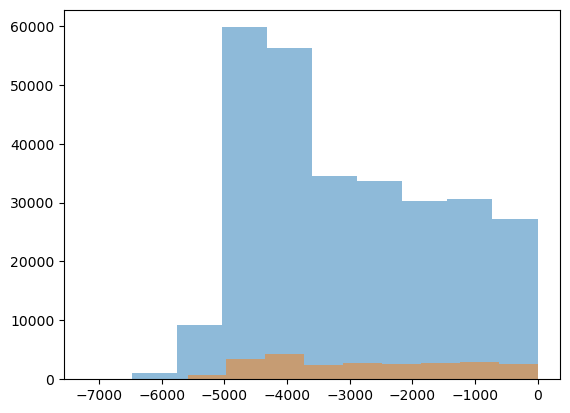

<Axes: xlabel='DAYS_ID_PUBLISH', ylabel='Density'>

<Axes: xlabel='DAYS_ID_PUBLISH', ylabel='Density'>

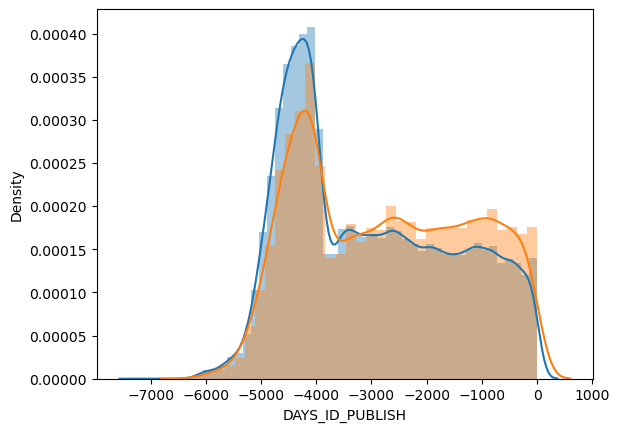

------------------------------------------------------------------------
Plot of FLAG_MOBIL


(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.82685e+05]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([    0.,     0.,     0.,     0.,     0., 24825.,     0.,     0.,
            0.,     0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

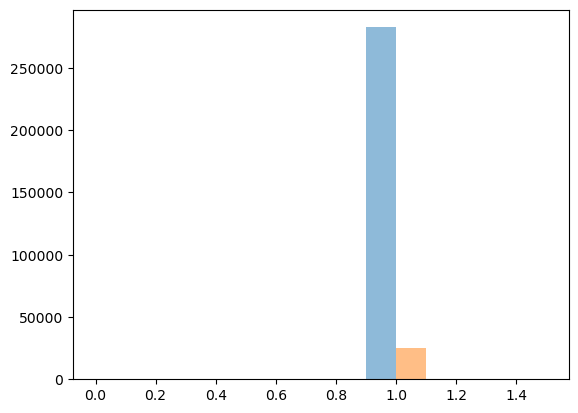

<Axes: xlabel='FLAG_MOBIL', ylabel='Density'>

<Axes: xlabel='FLAG_MOBIL', ylabel='Density'>

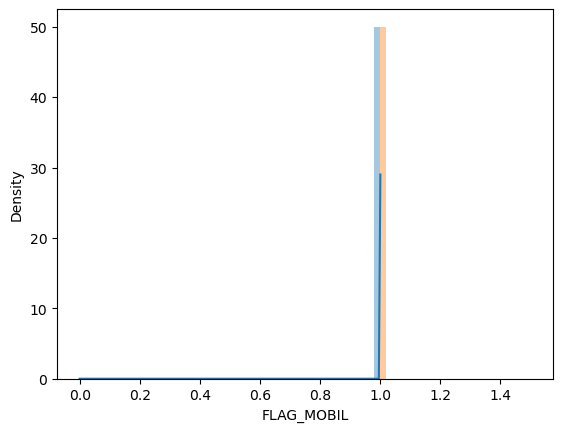

------------------------------------------------------------------------
Plot of FLAG_EMP_PHONE


(array([ 52395.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 230291.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([ 2991.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 21834.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

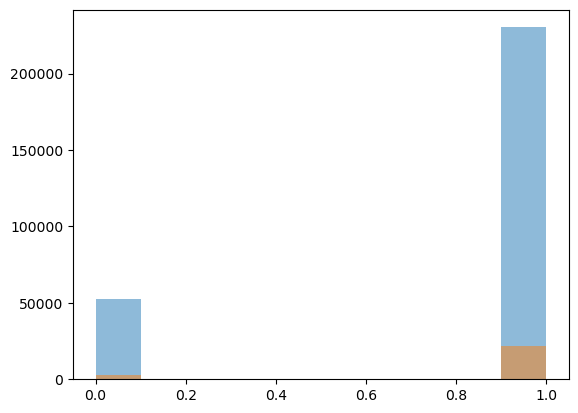

<Axes: xlabel='FLAG_EMP_PHONE', ylabel='Density'>

<Axes: xlabel='FLAG_EMP_PHONE', ylabel='Density'>

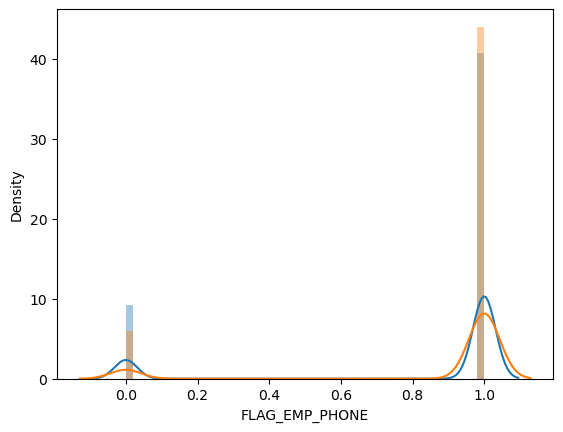

------------------------------------------------------------------------
Plot of FLAG_WORK_PHONE


(array([227282.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  55404.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([18921.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  5904.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

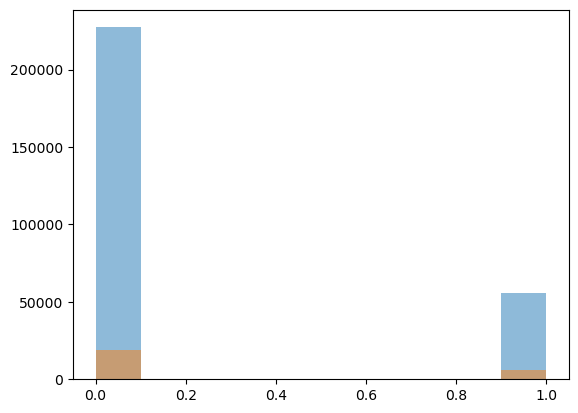

<Axes: xlabel='FLAG_WORK_PHONE', ylabel='Density'>

<Axes: xlabel='FLAG_WORK_PHONE', ylabel='Density'>

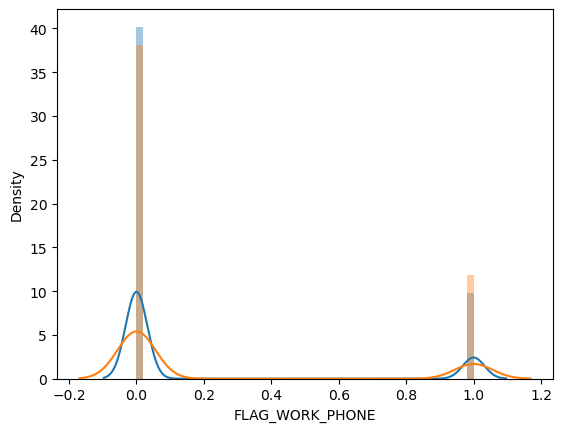

------------------------------------------------------------------------
Plot of FLAG_CONT_MOBILE


(array([   529.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 282157.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([   45.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 24780.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

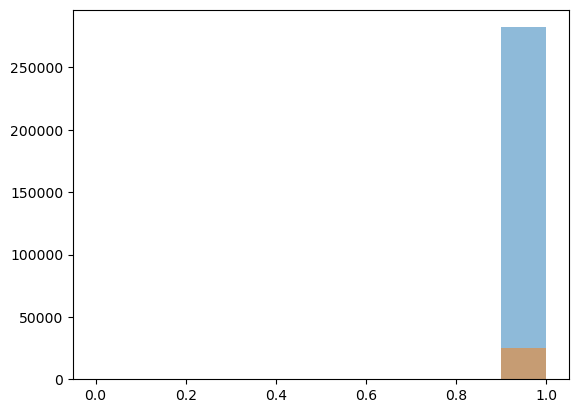

<Axes: xlabel='FLAG_CONT_MOBILE', ylabel='Density'>

<Axes: xlabel='FLAG_CONT_MOBILE', ylabel='Density'>

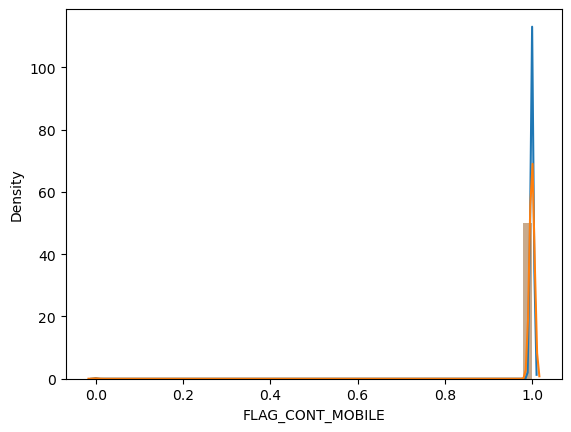

------------------------------------------------------------------------
Plot of FLAG_PHONE


(array([202336.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  80350.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([18744.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  6081.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

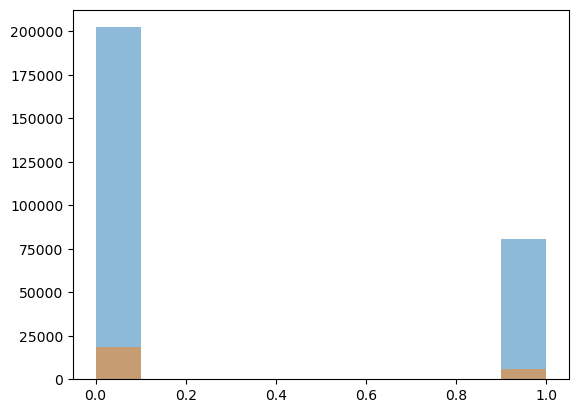

<Axes: xlabel='FLAG_PHONE', ylabel='Density'>

<Axes: xlabel='FLAG_PHONE', ylabel='Density'>

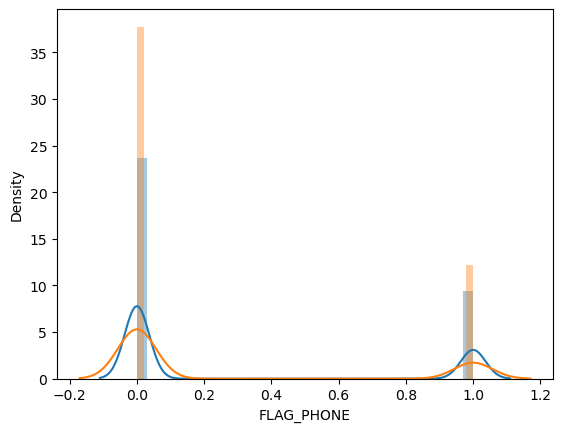

------------------------------------------------------------------------
Plot of FLAG_EMAIL


(array([266618.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  16068.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([23451.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1374.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

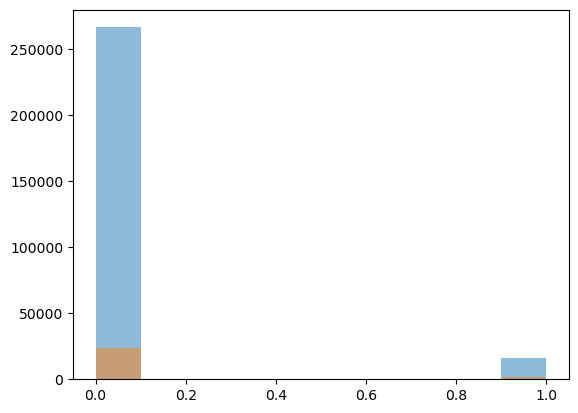

<Axes: xlabel='FLAG_EMAIL', ylabel='Density'>

<Axes: xlabel='FLAG_EMAIL', ylabel='Density'>

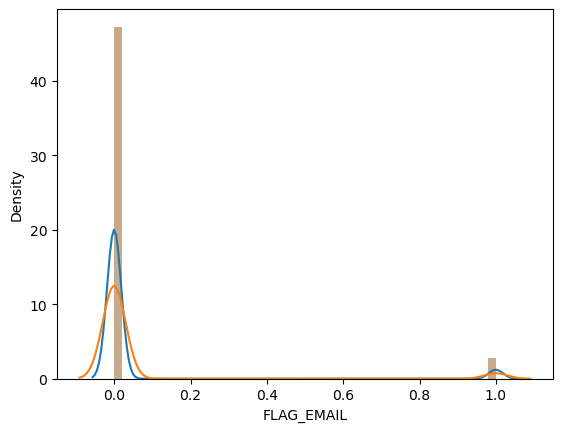

------------------------------------------------------------------------
Plot of CNT_FAM_MEMBERS


(array([2.0852e+05, 7.0554e+04, 3.5040e+03, 8.9000e+01, 8.0000e+00,
        2.0000e+00, 2.0000e+00, 3.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([ 1. ,  2.9,  4.8,  6.7,  8.6, 10.5, 12.4, 14.3, 16.2, 18.1, 20. ]),
 <BarContainer object of 10 artists>)

(array([1.7684e+04, 4.6080e+03, 2.1360e+03, 3.2700e+02, 5.5000e+01,
        1.2000e+01, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <BarContainer object of 10 artists>)

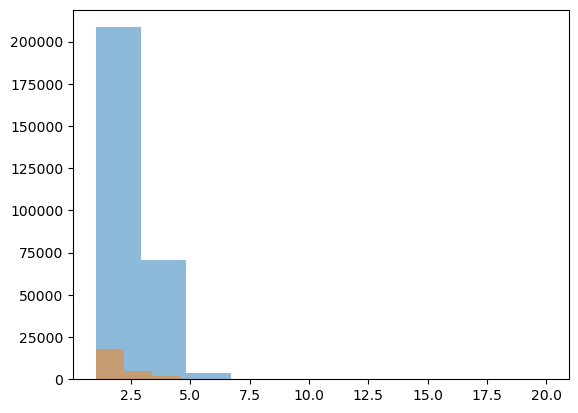

<Axes: xlabel='CNT_FAM_MEMBERS', ylabel='Density'>

<Axes: xlabel='CNT_FAM_MEMBERS', ylabel='Density'>

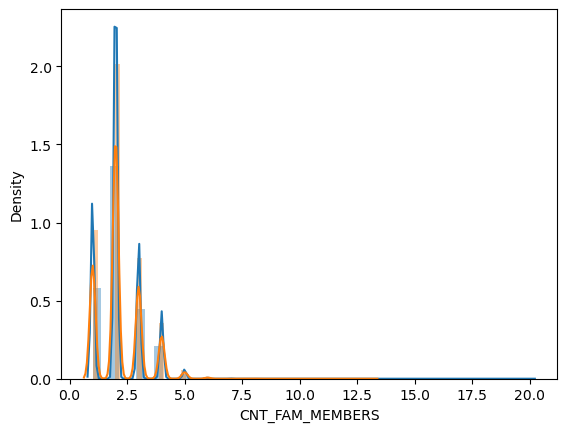

------------------------------------------------------------------------
Plot of REGION_RATING_CLIENT


(array([ 30645.,      0.,      0.,      0.,      0., 209077.,      0.,
             0.,      0.,  42964.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

(array([ 1552.,     0.,     0.,     0.,     0., 17907.,     0.,     0.,
            0.,  5366.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

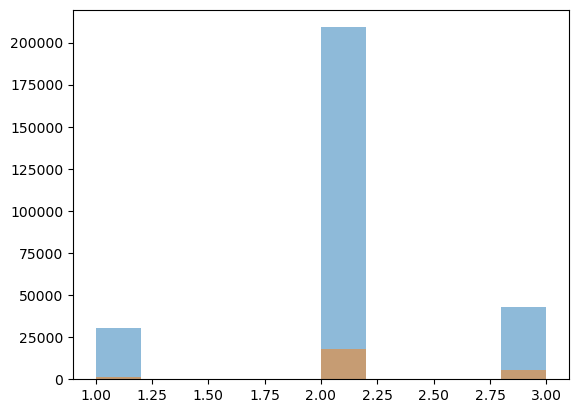

<Axes: xlabel='REGION_RATING_CLIENT', ylabel='Density'>

<Axes: xlabel='REGION_RATING_CLIENT', ylabel='Density'>

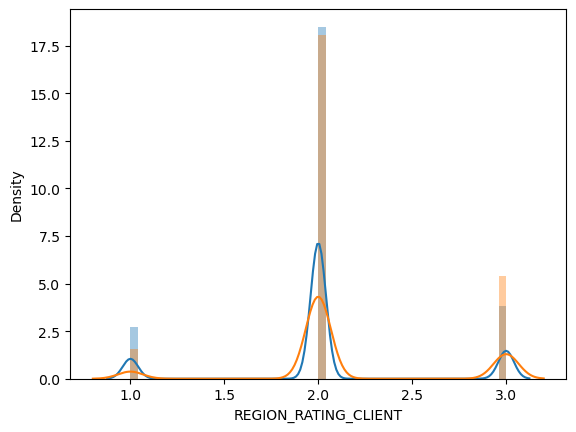

------------------------------------------------------------------------
Plot of REGION_RATING_CLIENT_W_CITY


(array([ 32513.,      0.,      0.,      0.,      0., 211314.,      0.,
             0.,      0.,  38859.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

(array([ 1654.,     0.,     0.,     0.,     0., 18170.,     0.,     0.,
            0.,  5001.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

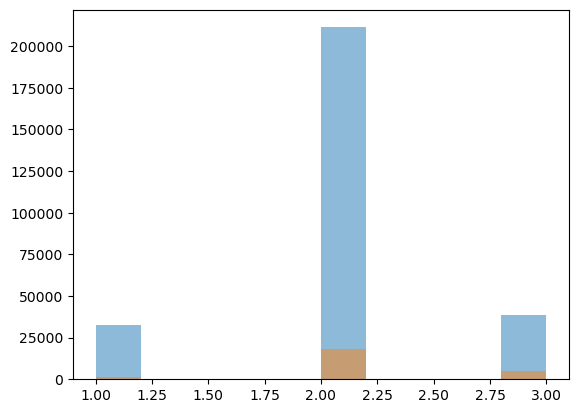

<Axes: xlabel='REGION_RATING_CLIENT_W_CITY', ylabel='Density'>

<Axes: xlabel='REGION_RATING_CLIENT_W_CITY', ylabel='Density'>

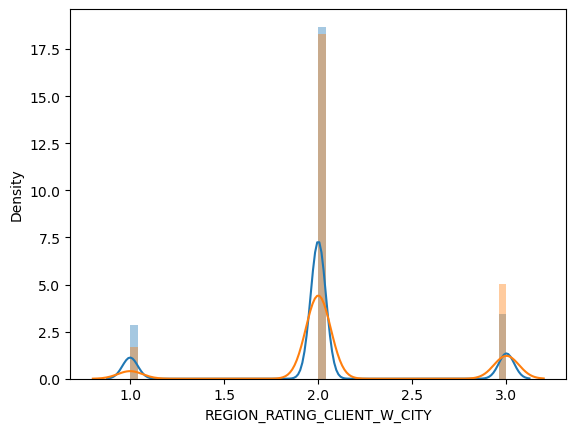

------------------------------------------------------------------------
Plot of HOUR_APPR_PROCESS_START


(array([  388.,  3040.,  8450., 47105., 68919., 59880., 67310., 22347.,
         4696.,   551.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

(array([  43.,  280., 1030., 4537., 6032., 5312., 5596., 1602.,  348.,
          45.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

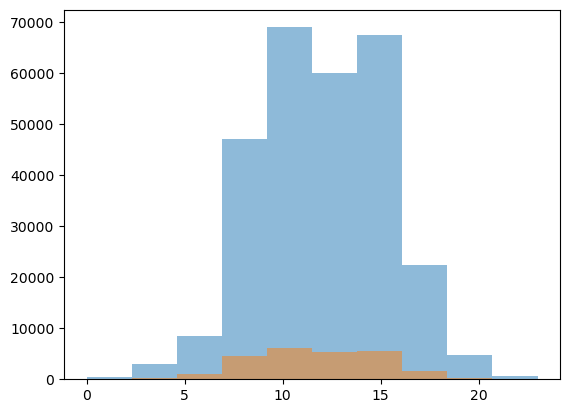

<Axes: xlabel='HOUR_APPR_PROCESS_START', ylabel='Density'>

<Axes: xlabel='HOUR_APPR_PROCESS_START', ylabel='Density'>

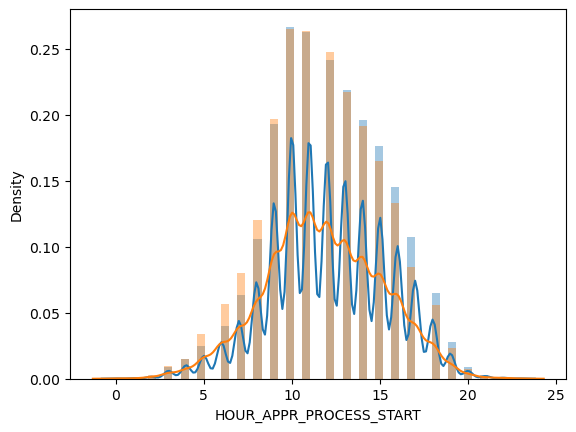

------------------------------------------------------------------------
Plot of REG_REGION_NOT_LIVE_REGION


(array([278462.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   4224.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([24392.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   433.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

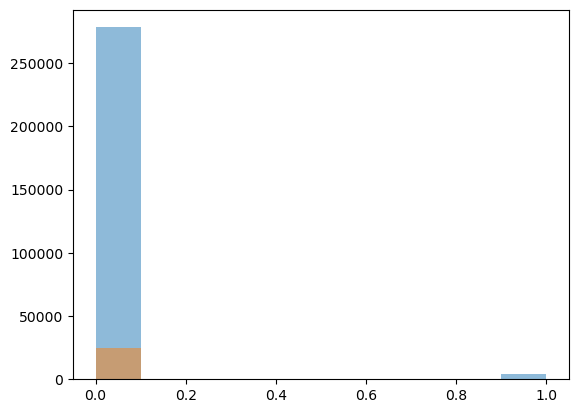

<Axes: xlabel='REG_REGION_NOT_LIVE_REGION', ylabel='Density'>

<Axes: xlabel='REG_REGION_NOT_LIVE_REGION', ylabel='Density'>

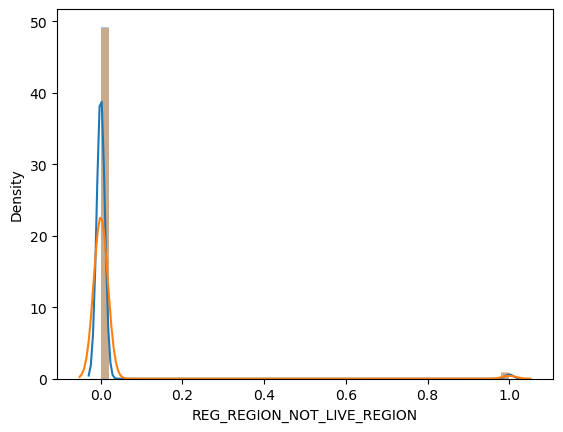

------------------------------------------------------------------------
Plot of REG_REGION_NOT_WORK_REGION


(array([268462.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  14224.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([23437.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1388.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

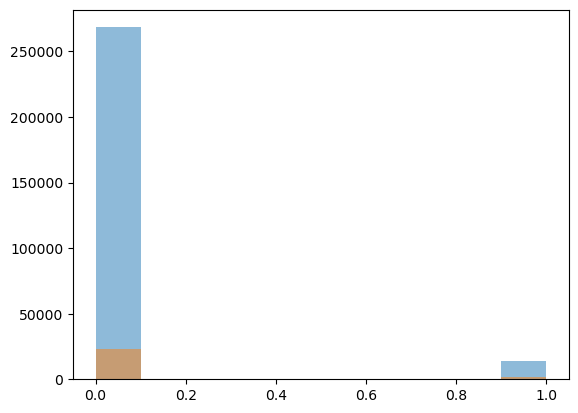

<Axes: xlabel='REG_REGION_NOT_WORK_REGION', ylabel='Density'>

<Axes: xlabel='REG_REGION_NOT_WORK_REGION', ylabel='Density'>

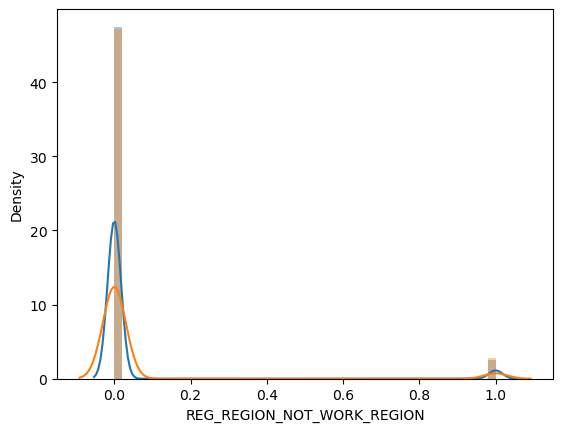

------------------------------------------------------------------------
Plot of LIVE_REGION_NOT_WORK_REGION


(array([271239.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  11447.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([23769.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1056.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

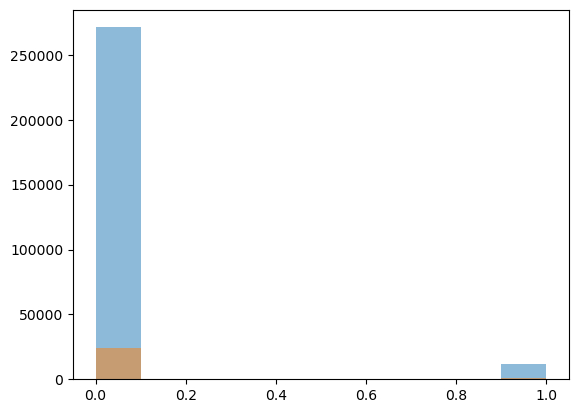

<Axes: xlabel='LIVE_REGION_NOT_WORK_REGION', ylabel='Density'>

<Axes: xlabel='LIVE_REGION_NOT_WORK_REGION', ylabel='Density'>

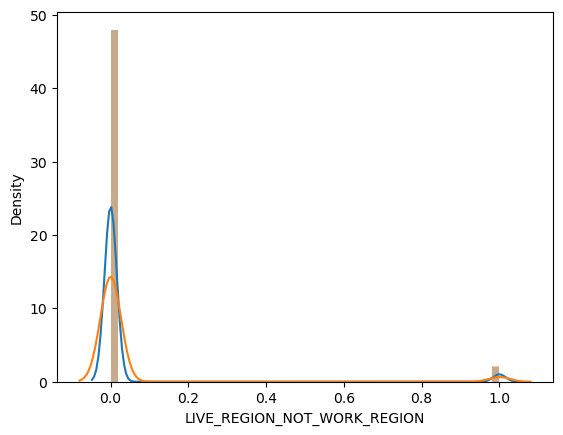

------------------------------------------------------------------------
Plot of REG_CITY_NOT_LIVE_CITY


(array([261586.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  21100.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([21886.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2939.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

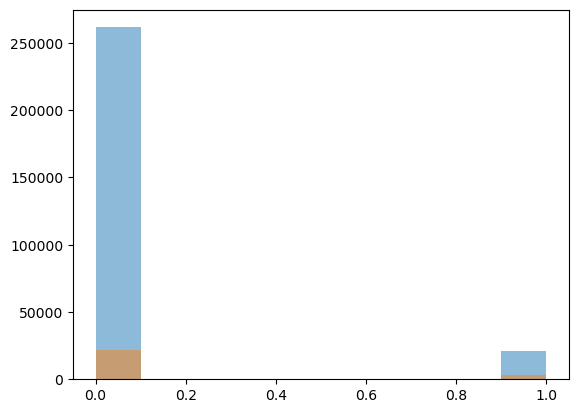

<Axes: xlabel='REG_CITY_NOT_LIVE_CITY', ylabel='Density'>

<Axes: xlabel='REG_CITY_NOT_LIVE_CITY', ylabel='Density'>

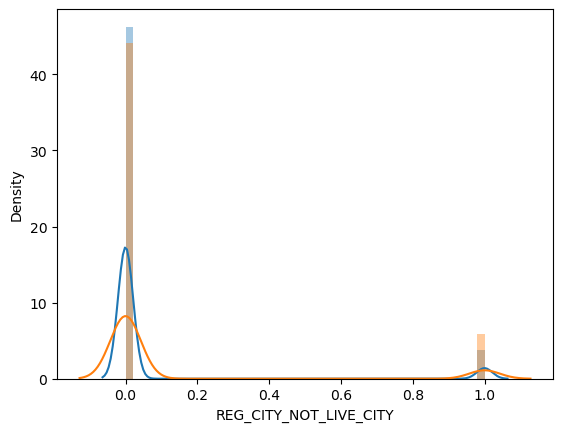

------------------------------------------------------------------------
Plot of REG_CITY_NOT_WORK_CITY


(array([219339.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  63347.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([17305.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7520.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

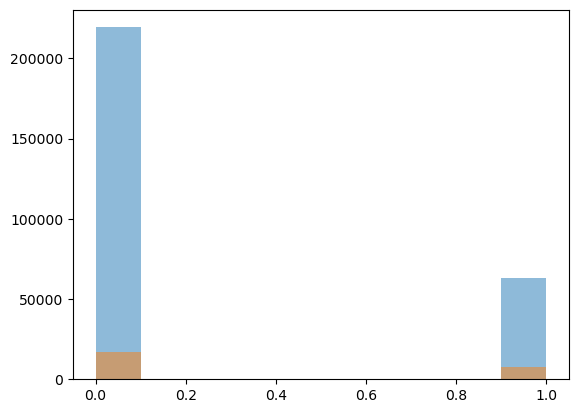

<Axes: xlabel='REG_CITY_NOT_WORK_CITY', ylabel='Density'>

<Axes: xlabel='REG_CITY_NOT_WORK_CITY', ylabel='Density'>

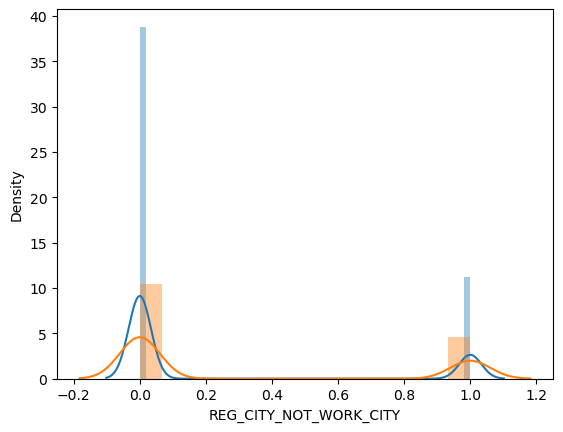

------------------------------------------------------------------------
Plot of LIVE_CITY_NOT_WORK_CITY


(array([232974.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  49712.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([19322.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  5503.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

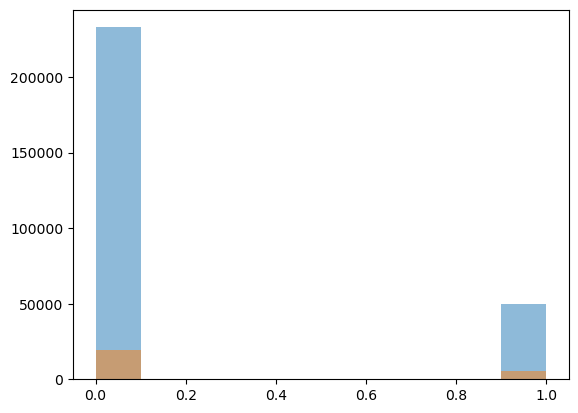

<Axes: xlabel='LIVE_CITY_NOT_WORK_CITY', ylabel='Density'>

<Axes: xlabel='LIVE_CITY_NOT_WORK_CITY', ylabel='Density'>

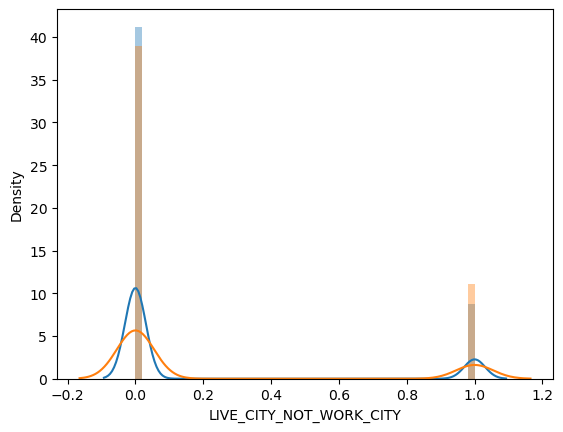

------------------------------------------------------------------------
Plot of EXT_SOURCE_2


(array([ 7187., 10779., 14381., 20283., 23115., 32433., 49674., 66587.,
        51328.,  6311.]),
 array([8.17361652e-08, 8.55000402e-02, 1.70999999e-01, 2.56499957e-01,
        3.41999916e-01, 4.27499874e-01, 5.12999833e-01, 5.98499791e-01,
        6.83999749e-01, 7.69499708e-01, 8.54999666e-01]),
 <BarContainer object of 10 artists>)

(array([2206., 2026., 2105., 2555., 2470., 2672., 3306., 3891., 2815.,
         727.]),
 array([5.00210876e-06, 8.11914757e-02, 1.62377949e-01, 2.43564423e-01,
        3.24750896e-01, 4.05937370e-01, 4.87123843e-01, 5.68310317e-01,
        6.49496790e-01, 7.30683264e-01, 8.11869738e-01]),
 <BarContainer object of 10 artists>)

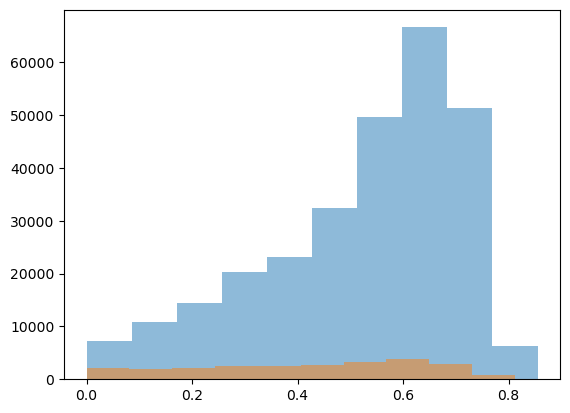

<Axes: xlabel='EXT_SOURCE_2', ylabel='Density'>

<Axes: xlabel='EXT_SOURCE_2', ylabel='Density'>

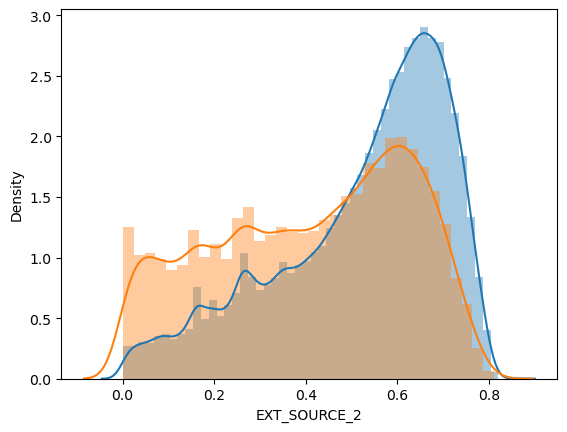

------------------------------------------------------------------------
Plot of EXT_SOURCE_3


(array([ 3253.,  9232., 14812., 21469., 27797., 32870., 38741., 41660.,
        29536.,  8028.]),
 array([5.27265239e-04, 8.98721462e-02, 1.79217027e-01, 2.68561908e-01,
        3.57906789e-01, 4.47251670e-01, 5.36596551e-01, 6.25941432e-01,
        7.15286313e-01, 8.04631194e-01, 8.93976075e-01]),
 <BarContainer object of 10 artists>)

(array([1198., 2328., 2666., 2732., 2678., 2380., 2126., 1792., 1020.,
         228.]),
 array([5.27265239e-04, 9.00754937e-02, 1.79623722e-01, 2.69171951e-01,
        3.58720179e-01, 4.48268407e-01, 5.37816636e-01, 6.27364864e-01,
        7.16913093e-01, 8.06461321e-01, 8.96009549e-01]),
 <BarContainer object of 10 artists>)

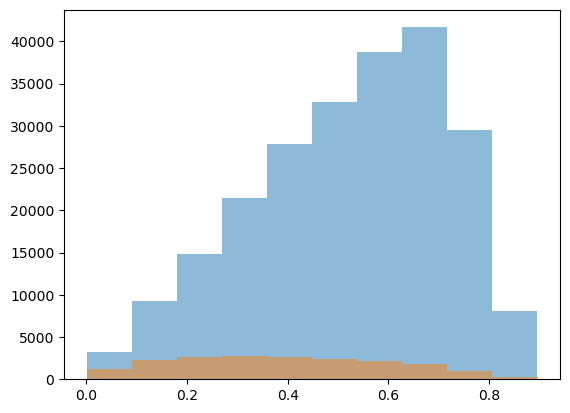

<Axes: xlabel='EXT_SOURCE_3', ylabel='Density'>

<Axes: xlabel='EXT_SOURCE_3', ylabel='Density'>

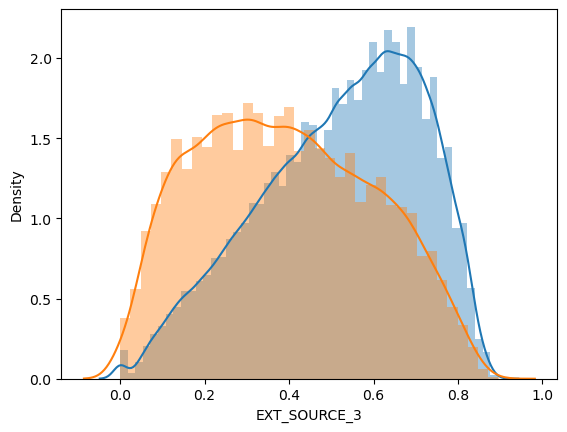

------------------------------------------------------------------------
Plot of YEARS_BEGINEXPLUATATION_AVG


(array([4.68000e+02, 5.00000e+00, 5.00000e+00, 2.10000e+01, 8.60000e+01,
        7.00000e+00, 2.80000e+01, 1.20000e+01, 2.60000e+01, 2.82028e+05]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([5.1000e+01, 0.0000e+00, 0.0000e+00, 3.0000e+00, 7.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 2.4761e+04]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

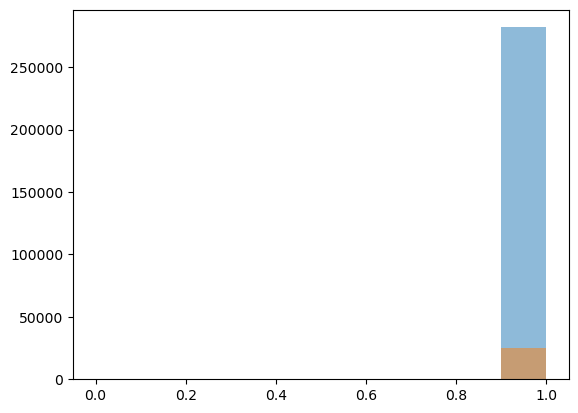

<Axes: xlabel='YEARS_BEGINEXPLUATATION_AVG', ylabel='Density'>

<Axes: xlabel='YEARS_BEGINEXPLUATATION_AVG', ylabel='Density'>

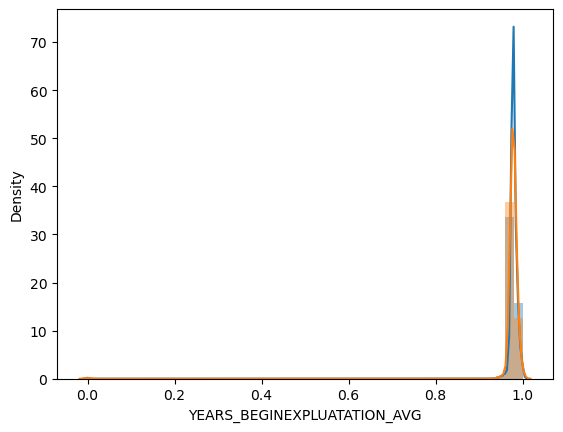

------------------------------------------------------------------------
Plot of FLOORSMAX_AVG


(array([ 22464.,  65437., 144461.,  39218.,   3841.,   2710.,   3538.,
           455.,    287.,    275.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([2.2070e+03, 5.1520e+03, 1.4417e+04, 2.4750e+03, 2.3400e+02,
        1.3300e+02, 1.6500e+02, 1.8000e+01, 7.0000e+00, 1.7000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

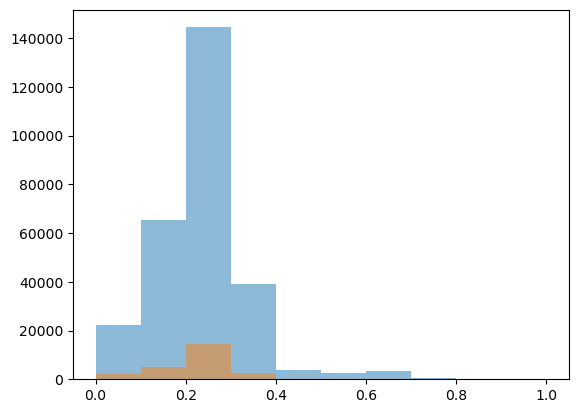

<Axes: xlabel='FLOORSMAX_AVG', ylabel='Density'>

<Axes: xlabel='FLOORSMAX_AVG', ylabel='Density'>

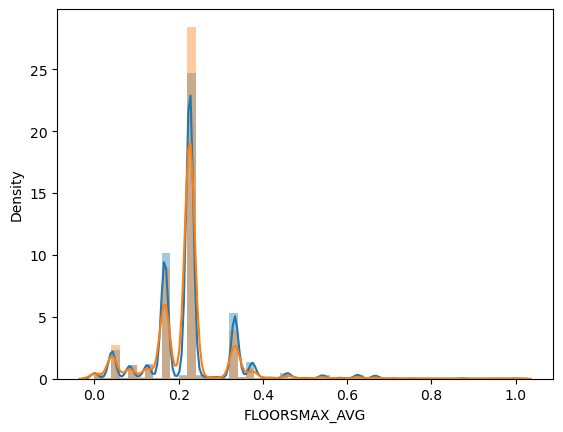

------------------------------------------------------------------------
Plot of YEARS_BEGINEXPLUATATION_MODE


(array([6.10000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00,
        5.00000e+00, 0.00000e+00, 1.00000e+00, 2.70000e+01, 2.82041e+05]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([6.2000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 5.0000e+00, 2.4758e+04]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

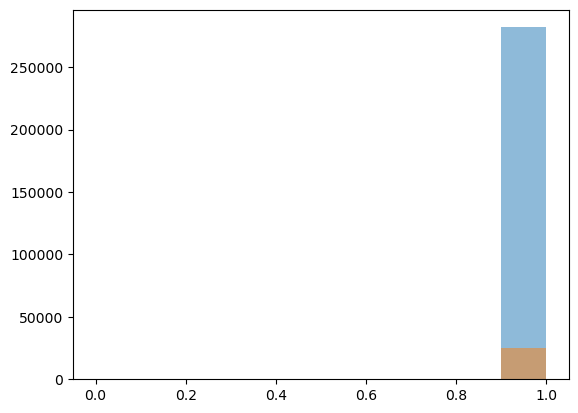

<Axes: xlabel='YEARS_BEGINEXPLUATATION_MODE', ylabel='Density'>

<Axes: xlabel='YEARS_BEGINEXPLUATATION_MODE', ylabel='Density'>

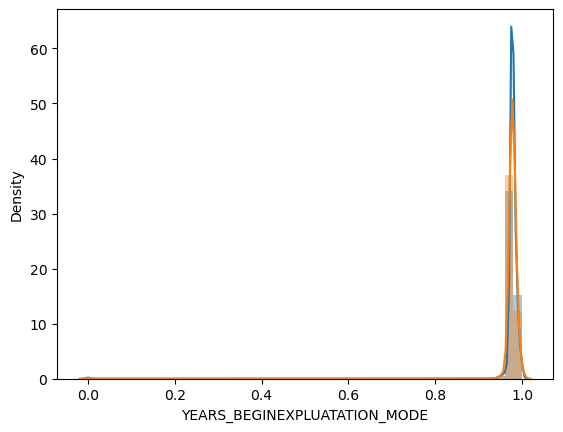

------------------------------------------------------------------------
Plot of FLOORSMAX_MODE


(array([ 23519.,  67555., 141399.,  40147.,   3261.,   2296.,   3620.,
           366.,    244.,    279.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([2.2970e+03, 5.2620e+03, 1.4209e+04, 2.5470e+03, 1.9100e+02,
        1.1500e+02, 1.6500e+02, 1.5000e+01, 7.0000e+00, 1.7000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

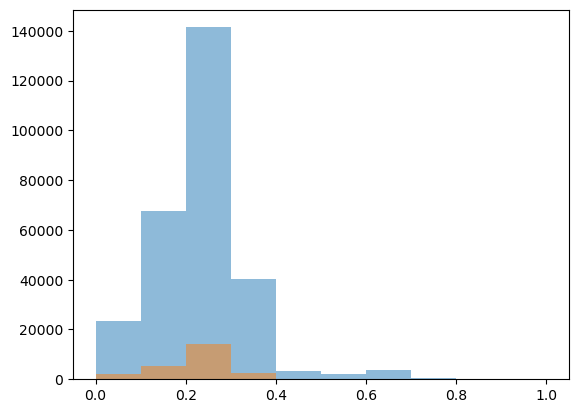

<Axes: xlabel='FLOORSMAX_MODE', ylabel='Density'>

<Axes: xlabel='FLOORSMAX_MODE', ylabel='Density'>

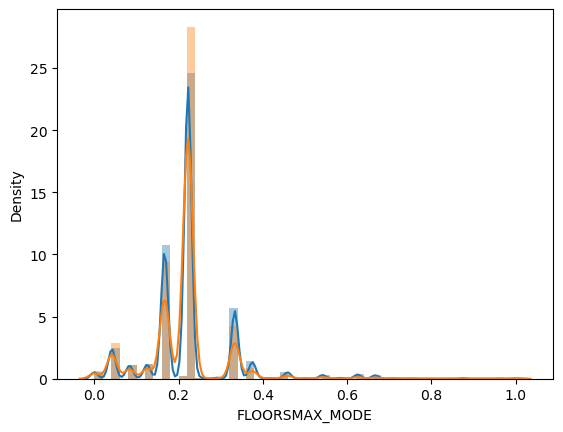

------------------------------------------------------------------------
Plot of YEARS_BEGINEXPLUATATION_MEDI


(array([4.99000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00, 8.60000e+01,
        5.00000e+00, 1.00000e+00, 0.00000e+00, 2.40000e+01, 2.82071e+05]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([5.4000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 2.4762e+04]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

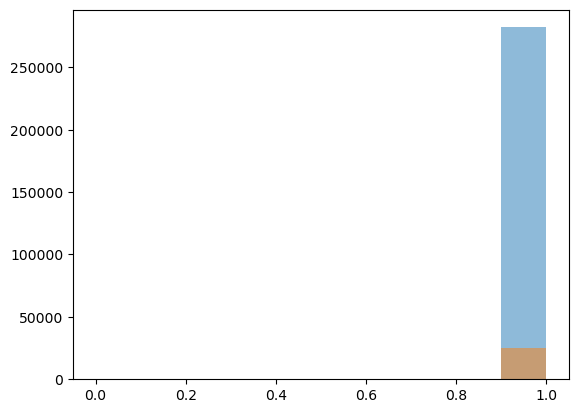

<Axes: xlabel='YEARS_BEGINEXPLUATATION_MEDI', ylabel='Density'>

<Axes: xlabel='YEARS_BEGINEXPLUATATION_MEDI', ylabel='Density'>

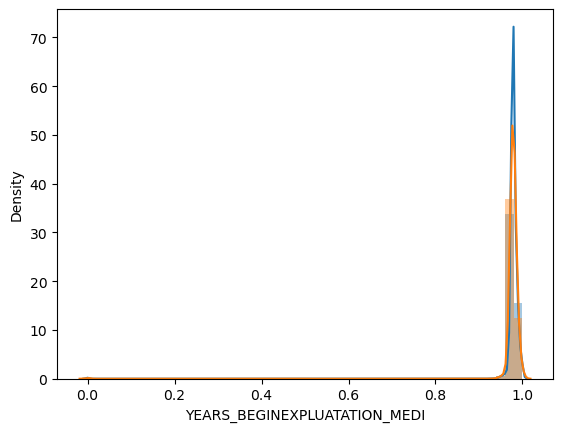

------------------------------------------------------------------------
Plot of FLOORSMAX_MEDI


(array([ 22531.,  66489., 142929.,  39894.,   3558.,   2579.,   3713.,
           420.,    283.,    290.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([2.2110e+03, 5.2230e+03, 1.4305e+04, 2.5280e+03, 2.1800e+02,
        1.2500e+02, 1.7300e+02, 1.8000e+01, 7.0000e+00, 1.7000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

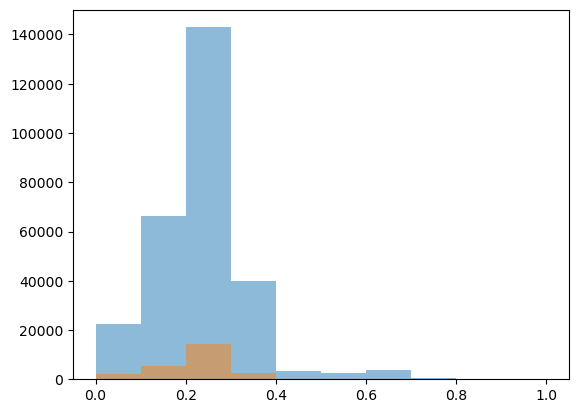

<Axes: xlabel='FLOORSMAX_MEDI', ylabel='Density'>

<Axes: xlabel='FLOORSMAX_MEDI', ylabel='Density'>

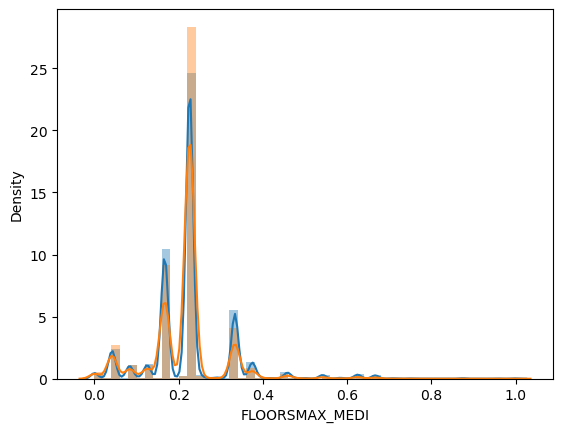

------------------------------------------------------------------------
Plot of TOTALAREA_MODE


(array([9.92190e+04, 1.63758e+05, 1.16550e+04, 4.37100e+03, 1.81600e+03,
        9.89000e+02, 4.28000e+02, 1.45000e+02, 1.04000e+02, 2.01000e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([8.0650e+03, 1.5628e+04, 6.7200e+02, 2.7800e+02, 8.6000e+01,
        4.2000e+01, 2.6000e+01, 1.0000e+01, 3.0000e+00, 1.5000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

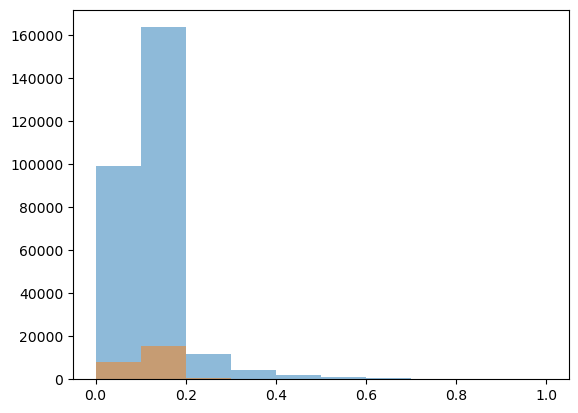

<Axes: xlabel='TOTALAREA_MODE', ylabel='Density'>

<Axes: xlabel='TOTALAREA_MODE', ylabel='Density'>

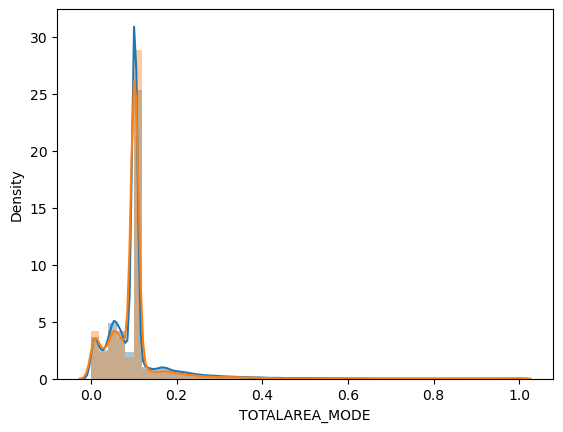

------------------------------------------------------------------------
Plot of OBS_30_CNT_SOCIAL_CIRCLE


(array([2.82684e+05, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  0. ,  34.8,  69.6, 104.4, 139.2, 174. , 208.8, 243.6, 278.4,
        313.2, 348. ]),
 <BarContainer object of 10 artists>)

(array([1.9339e+04, 3.7200e+03, 1.2220e+03, 3.7200e+02, 1.2900e+02,
        2.6000e+01, 1.0000e+01, 5.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <BarContainer object of 10 artists>)

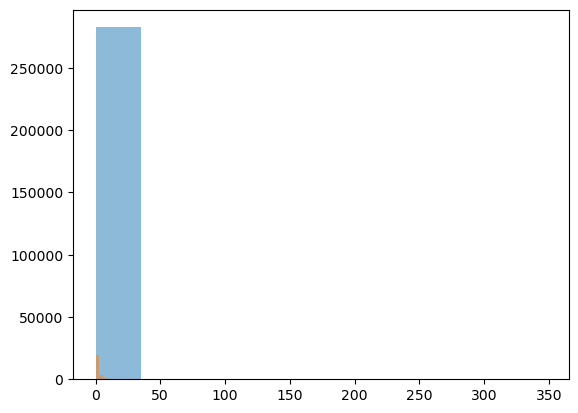

<Axes: xlabel='OBS_30_CNT_SOCIAL_CIRCLE', ylabel='Density'>

<Axes: xlabel='OBS_30_CNT_SOCIAL_CIRCLE', ylabel='Density'>

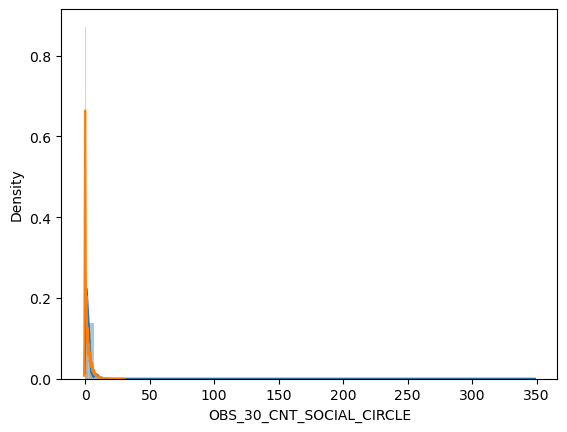

------------------------------------------------------------------------
Plot of DEF_30_CNT_SOCIAL_CIRCLE


(array([2.82407e+05, 2.76000e+02, 2.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 0. ,  3.4,  6.8, 10.2, 13.6, 17. , 20.4, 23.8, 27.2, 30.6, 34. ]),
 <BarContainer object of 10 artists>)

(array([2.1134e+04, 2.8740e+03, 0.0000e+00, 6.2000e+02, 0.0000e+00,
        1.5300e+02, 3.5000e+01, 0.0000e+00, 8.0000e+00, 1.0000e+00]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

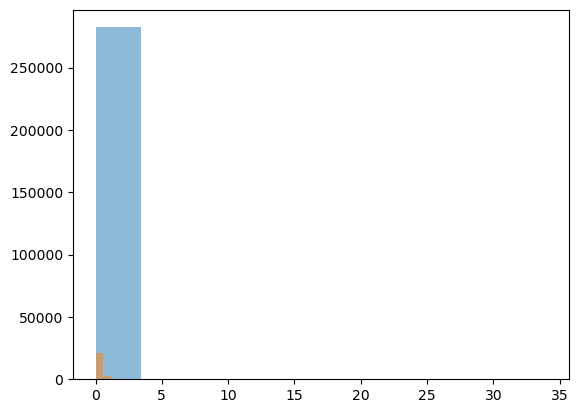

<Axes: xlabel='DEF_30_CNT_SOCIAL_CIRCLE', ylabel='Density'>

<Axes: xlabel='DEF_30_CNT_SOCIAL_CIRCLE', ylabel='Density'>

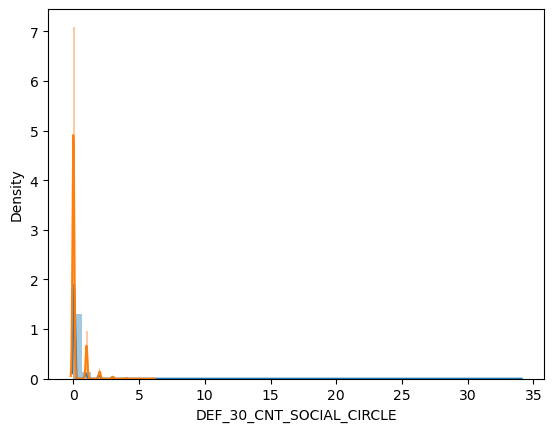

------------------------------------------------------------------------
Plot of OBS_60_CNT_SOCIAL_CIRCLE


(array([2.82684e+05, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  0. ,  34.4,  68.8, 103.2, 137.6, 172. , 206.4, 240.8, 275.2,
        309.6, 344. ]),
 <BarContainer object of 10 artists>)

(array([1.9399e+04, 3.7000e+03, 1.1960e+03, 3.6900e+02, 1.1800e+02,
        2.7000e+01, 9.0000e+00, 5.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 0. ,  2.9,  5.8,  8.7, 11.6, 14.5, 17.4, 20.3, 23.2, 26.1, 29. ]),
 <BarContainer object of 10 artists>)

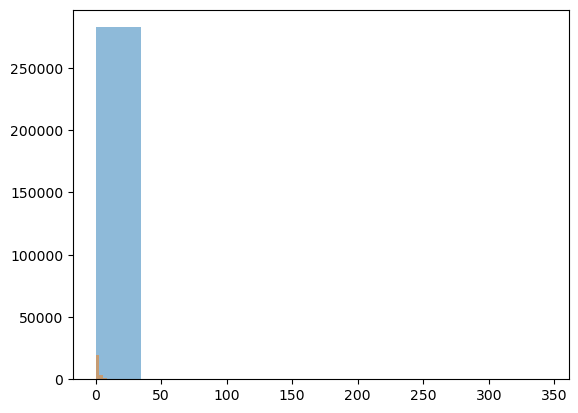

<Axes: xlabel='OBS_60_CNT_SOCIAL_CIRCLE', ylabel='Density'>

<Axes: xlabel='OBS_60_CNT_SOCIAL_CIRCLE', ylabel='Density'>

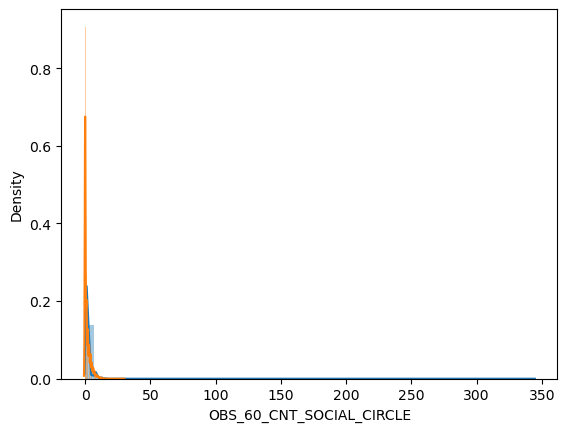

------------------------------------------------------------------------
Plot of DEF_60_CNT_SOCIAL_CIRCLE


(array([2.82041e+05, 6.23000e+02, 2.10000e+01, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <BarContainer object of 10 artists>)

(array([2.203e+04, 0.000e+00, 2.297e+03, 0.000e+00, 3.850e+02, 0.000e+00,
        9.500e+01, 0.000e+00, 1.500e+01, 3.000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

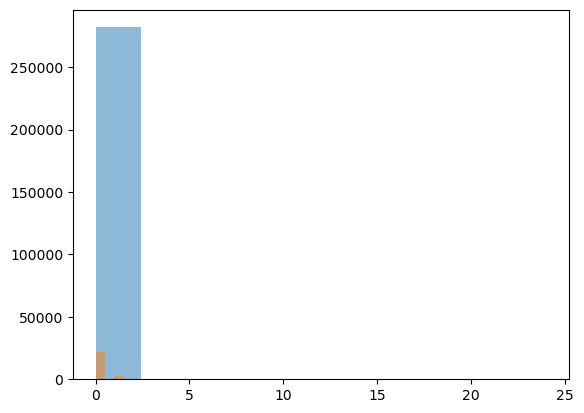

<Axes: xlabel='DEF_60_CNT_SOCIAL_CIRCLE', ylabel='Density'>

<Axes: xlabel='DEF_60_CNT_SOCIAL_CIRCLE', ylabel='Density'>

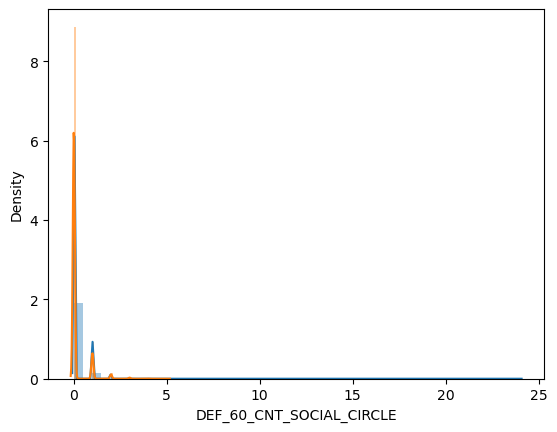

------------------------------------------------------------------------
Plot of DAYS_LAST_PHONE_CHANGE


(array([5.4000e+01, 6.0300e+02, 3.8380e+03, 8.1900e+03, 1.6940e+04,
        2.8684e+04, 3.8495e+04, 3.5658e+04, 5.6772e+04, 9.3451e+04]),
 array([-4292. , -3862.8, -3433.6, -3004.4, -2575.2, -2146. , -1716.8,
        -1287.6,  -858.4,  -429.2,     0. ]),
 <BarContainer object of 10 artists>)

(array([  10.,   75.,  237.,  656., 1026., 2161., 2497., 3038., 5658.,
        9467.]),
 array([-4070., -3663., -3256., -2849., -2442., -2035., -1628., -1221.,
         -814.,  -407.,     0.]),
 <BarContainer object of 10 artists>)

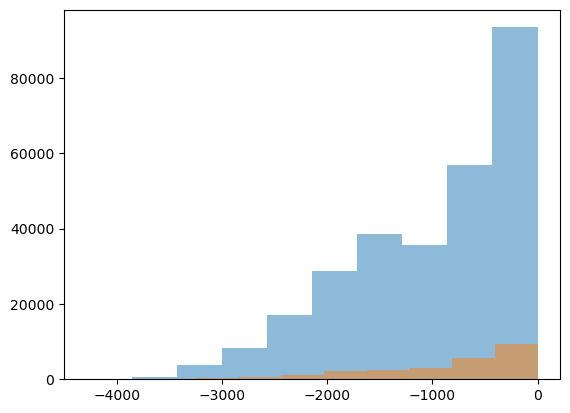

<Axes: xlabel='DAYS_LAST_PHONE_CHANGE', ylabel='Density'>

<Axes: xlabel='DAYS_LAST_PHONE_CHANGE', ylabel='Density'>

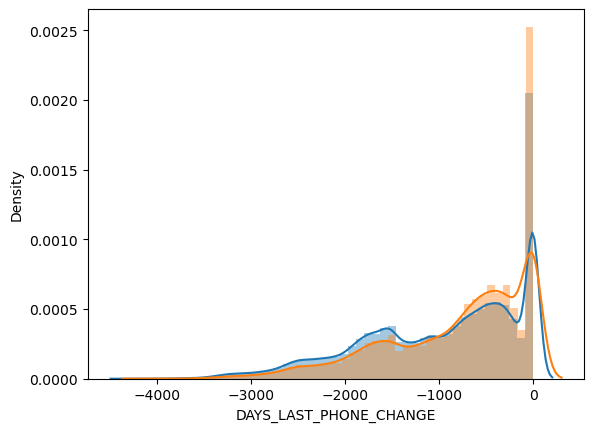

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_2


(array([2.82677e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 9.00000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([2.4821e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

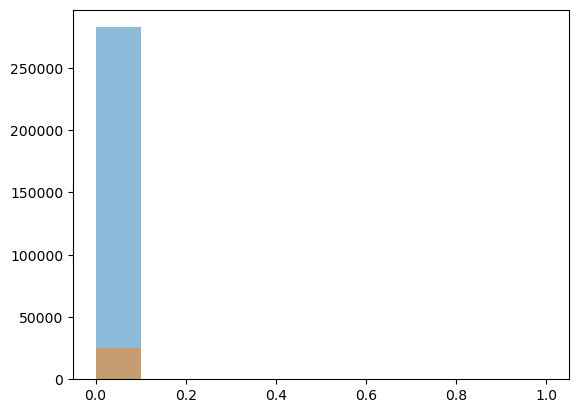

<Axes: xlabel='FLAG_DOCUMENT_2', ylabel='Density'>

<Axes: xlabel='FLAG_DOCUMENT_2', ylabel='Density'>

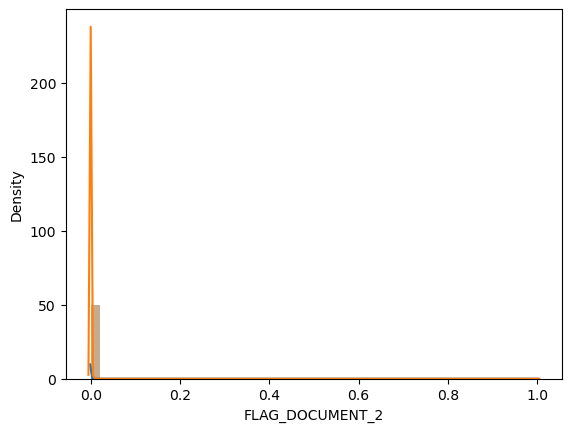

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_3


(array([ 83658.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 199028.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([ 5513.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 19312.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

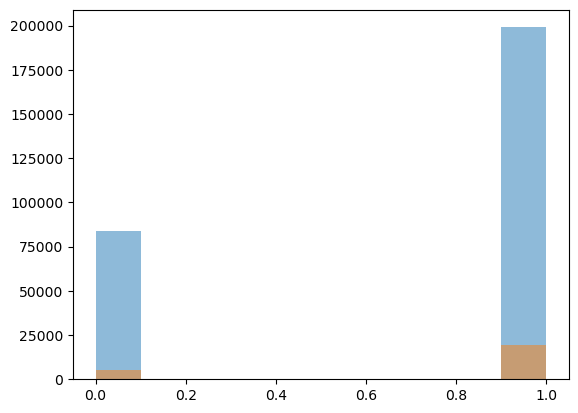

<Axes: xlabel='FLAG_DOCUMENT_3', ylabel='Density'>

<Axes: xlabel='FLAG_DOCUMENT_3', ylabel='Density'>

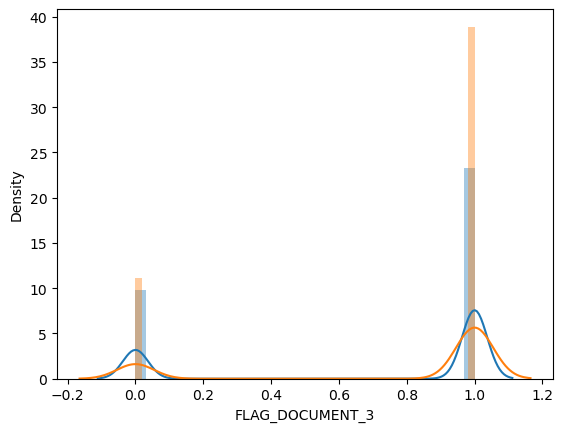

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_4


(array([2.82661e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.50000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([    0.,     0.,     0.,     0.,     0., 24825.,     0.,     0.,
            0.,     0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

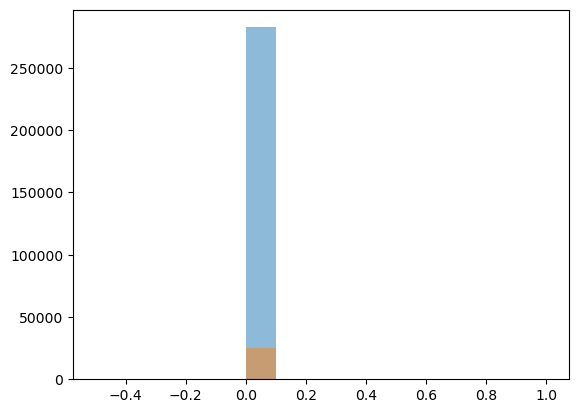

<Axes: xlabel='FLAG_DOCUMENT_4', ylabel='Density'>

<Axes: xlabel='FLAG_DOCUMENT_4', ylabel='Density'>

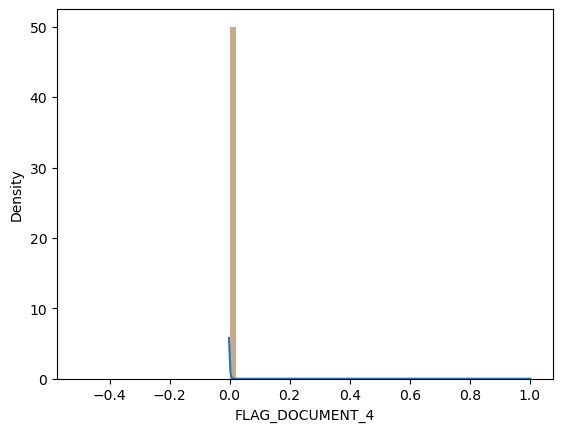

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_5


(array([278410.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   4276.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([24453.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   372.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

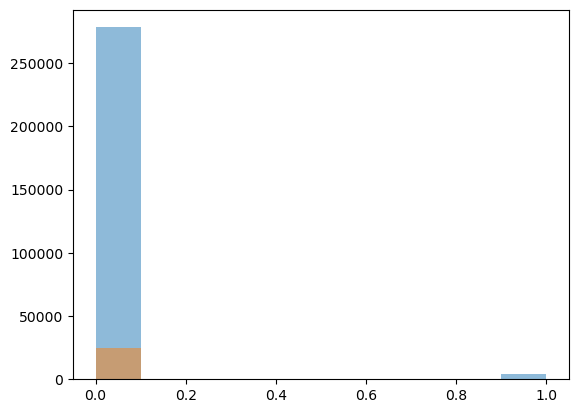

<Axes: xlabel='FLAG_DOCUMENT_5', ylabel='Density'>

<Axes: xlabel='FLAG_DOCUMENT_5', ylabel='Density'>

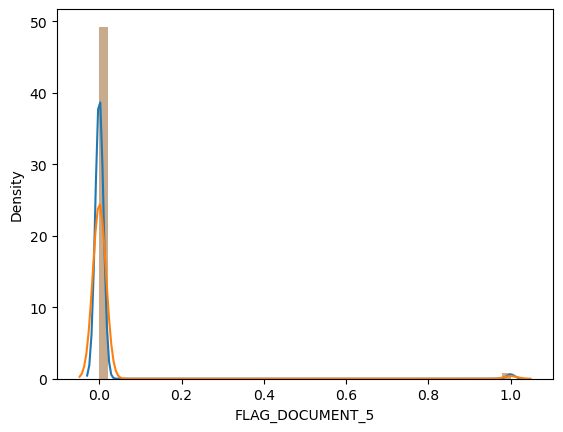

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_6


(array([257115.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  25571.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([23318.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1507.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

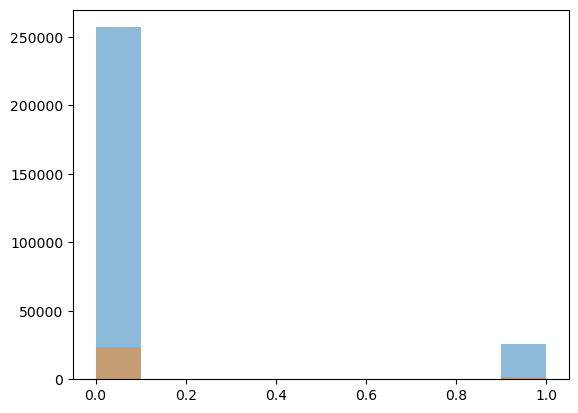

<Axes: xlabel='FLAG_DOCUMENT_6', ylabel='Density'>

<Axes: xlabel='FLAG_DOCUMENT_6', ylabel='Density'>

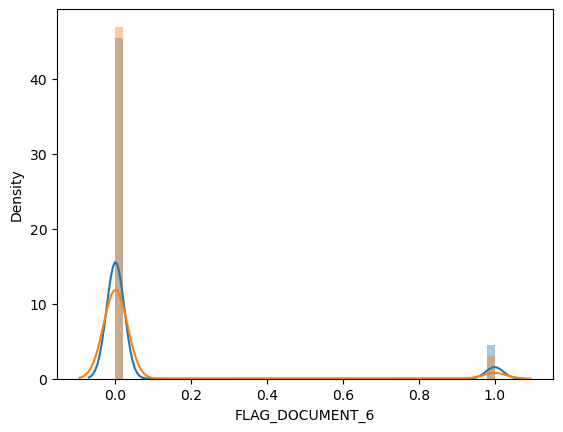

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_7


(array([2.8263e+05, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.6000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([2.4822e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

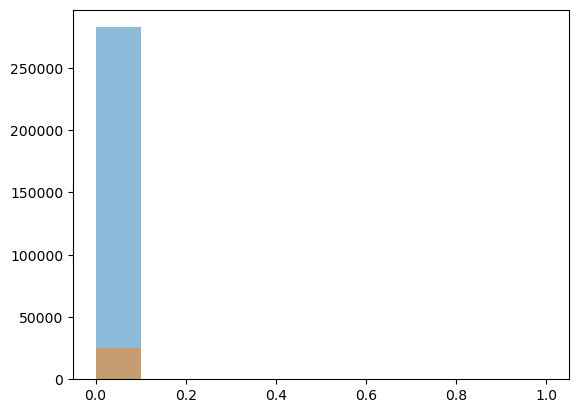

<Axes: xlabel='FLAG_DOCUMENT_7', ylabel='Density'>

<Axes: xlabel='FLAG_DOCUMENT_7', ylabel='Density'>

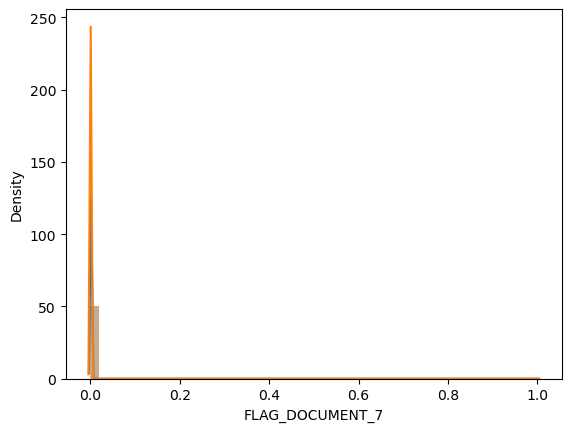

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_8


(array([259498.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  23188.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([22989.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1836.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

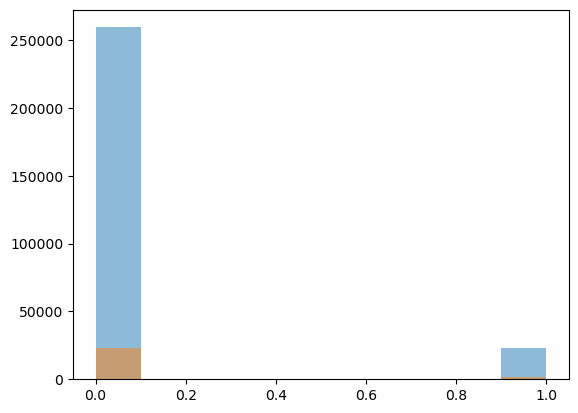

<Axes: xlabel='FLAG_DOCUMENT_8', ylabel='Density'>

<Axes: xlabel='FLAG_DOCUMENT_8', ylabel='Density'>

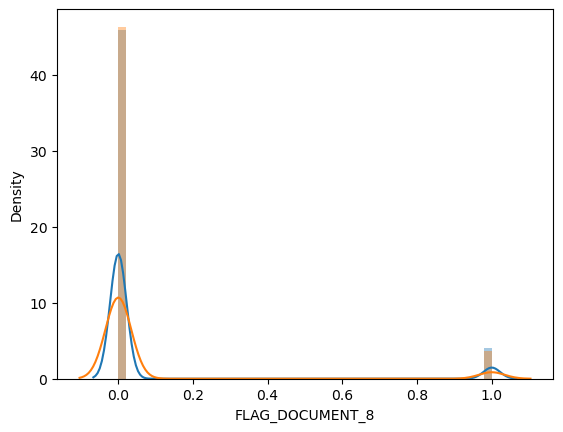

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_9


(array([281562.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   1124.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([24751.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,    74.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

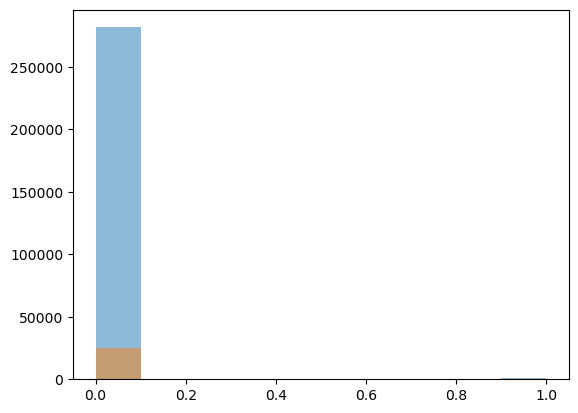

<Axes: xlabel='FLAG_DOCUMENT_9', ylabel='Density'>

<Axes: xlabel='FLAG_DOCUMENT_9', ylabel='Density'>

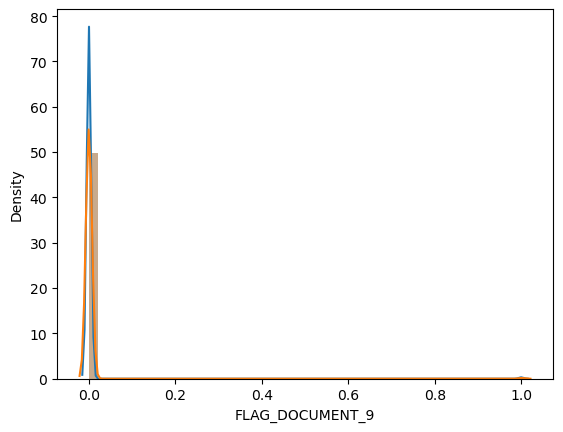

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_10


(array([2.82679e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 7.00000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([    0.,     0.,     0.,     0.,     0., 24825.,     0.,     0.,
            0.,     0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

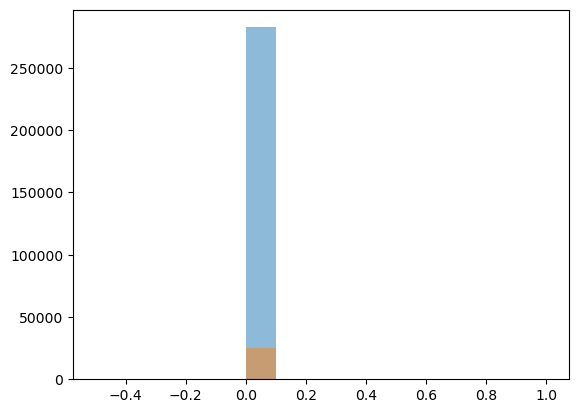

<Axes: xlabel='FLAG_DOCUMENT_10', ylabel='Density'>

<Axes: xlabel='FLAG_DOCUMENT_10', ylabel='Density'>

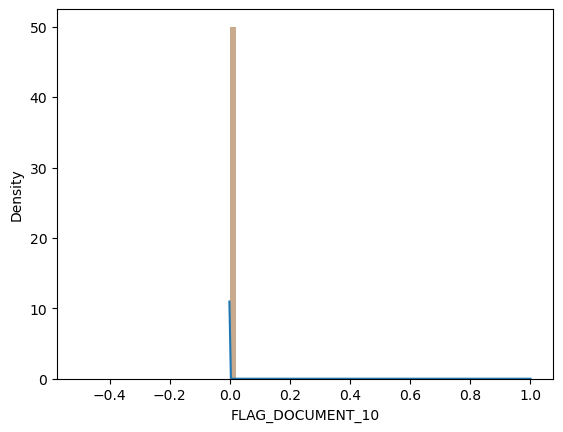

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_11


(array([281558.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   1128.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([24750.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,    75.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

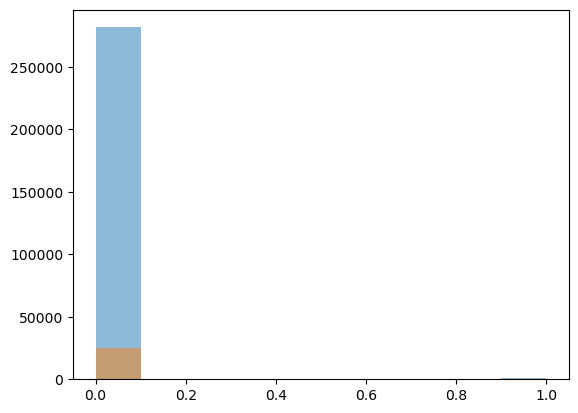

<Axes: xlabel='FLAG_DOCUMENT_11', ylabel='Density'>

<Axes: xlabel='FLAG_DOCUMENT_11', ylabel='Density'>

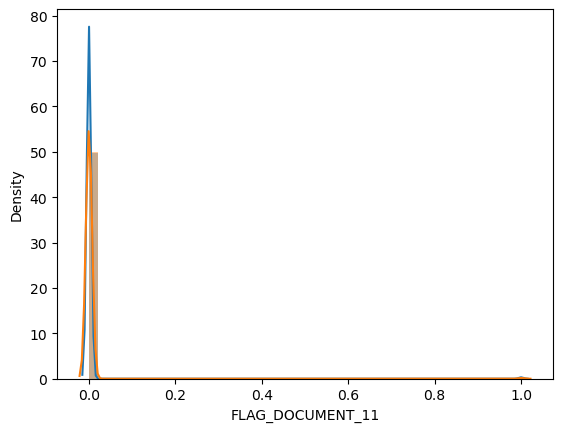

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_12


(array([2.82684e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([    0.,     0.,     0.,     0.,     0., 24825.,     0.,     0.,
            0.,     0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

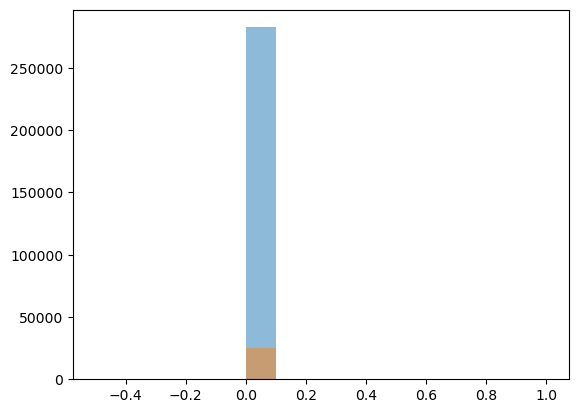

<Axes: xlabel='FLAG_DOCUMENT_12', ylabel='Density'>

<Axes: xlabel='FLAG_DOCUMENT_12', ylabel='Density'>

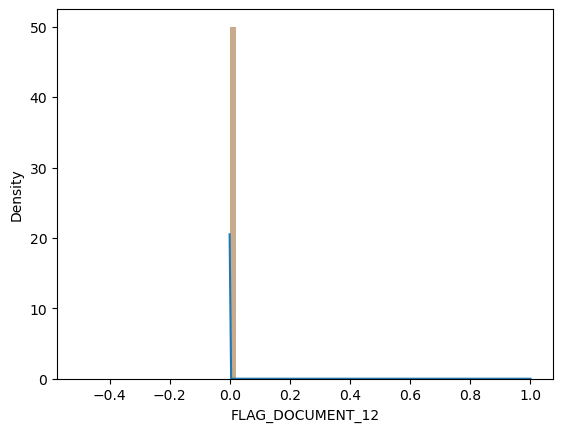

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_13


(array([281632.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   1054.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([24795.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,    30.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

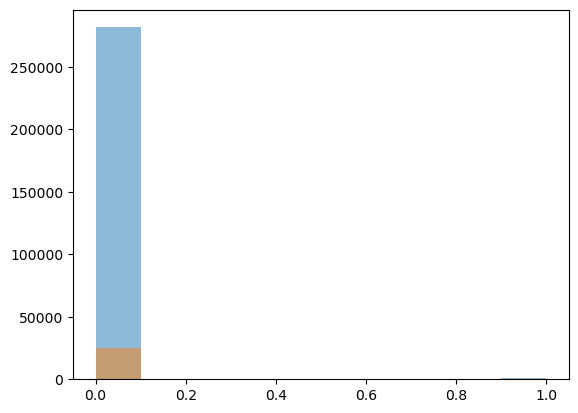

<Axes: xlabel='FLAG_DOCUMENT_13', ylabel='Density'>

<Axes: xlabel='FLAG_DOCUMENT_13', ylabel='Density'>

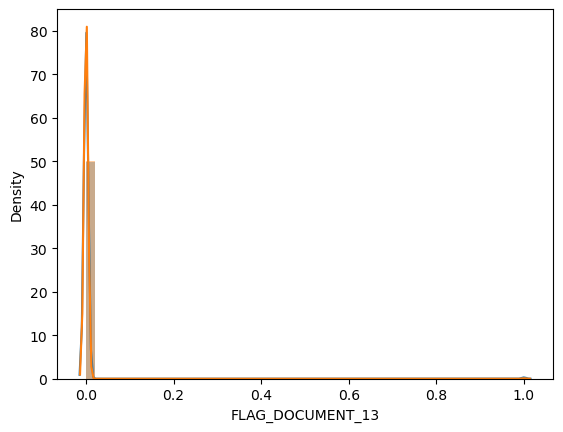

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_14


(array([281813.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    873.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([24795.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,    30.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

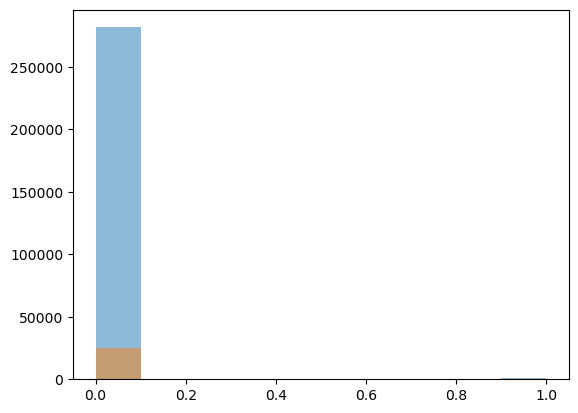

<Axes: xlabel='FLAG_DOCUMENT_14', ylabel='Density'>

<Axes: xlabel='FLAG_DOCUMENT_14', ylabel='Density'>

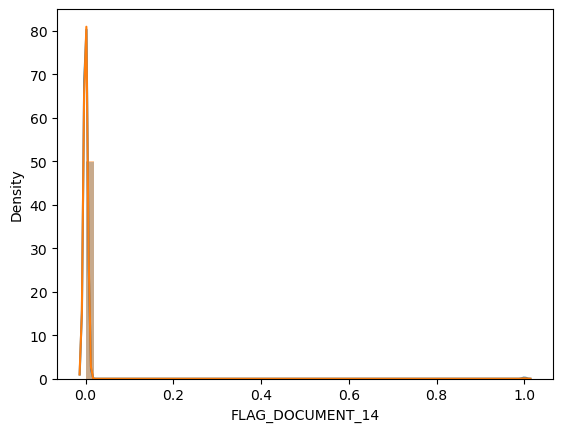

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_15


(array([282325.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    361.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([2.4814e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

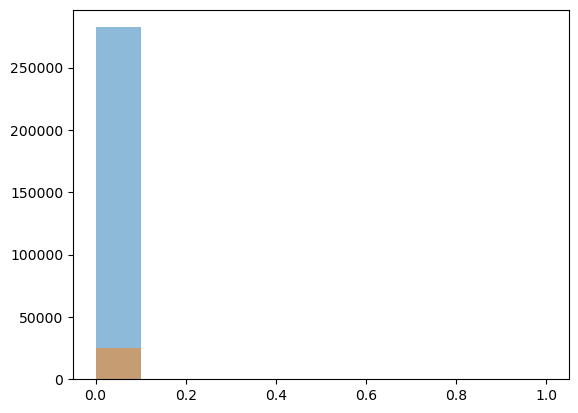

<Axes: xlabel='FLAG_DOCUMENT_15', ylabel='Density'>

<Axes: xlabel='FLAG_DOCUMENT_15', ylabel='Density'>

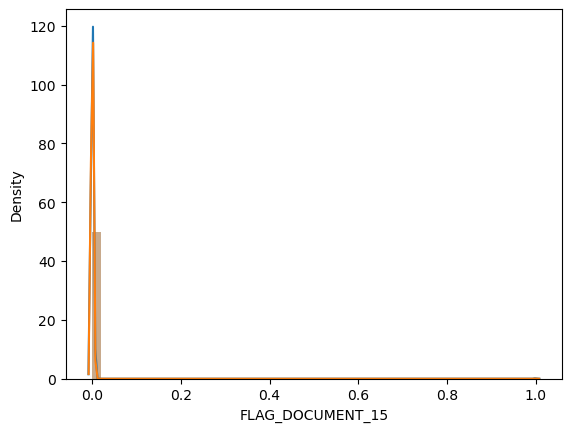

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_16


(array([279783.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   2903.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([24675.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   150.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

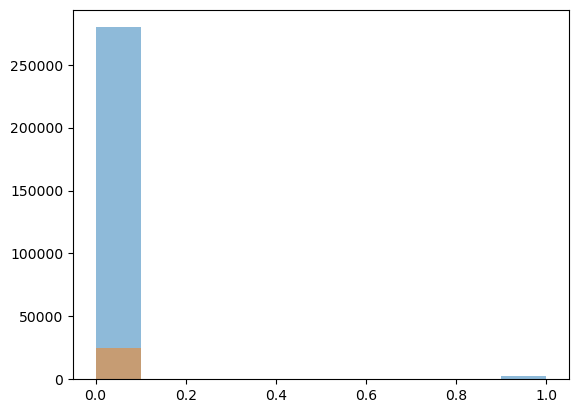

<Axes: xlabel='FLAG_DOCUMENT_16', ylabel='Density'>

<Axes: xlabel='FLAG_DOCUMENT_16', ylabel='Density'>

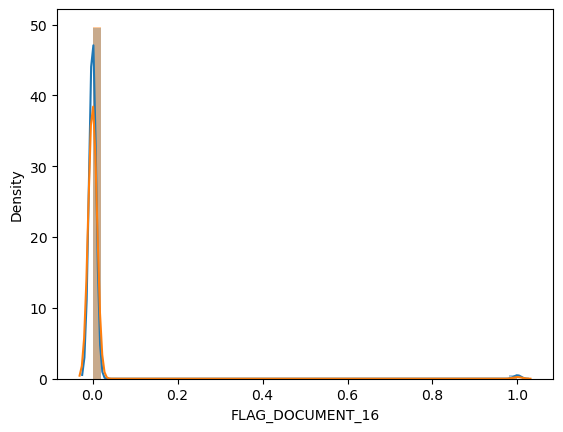

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_17


(array([2.82606e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 8.00000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([2.4823e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

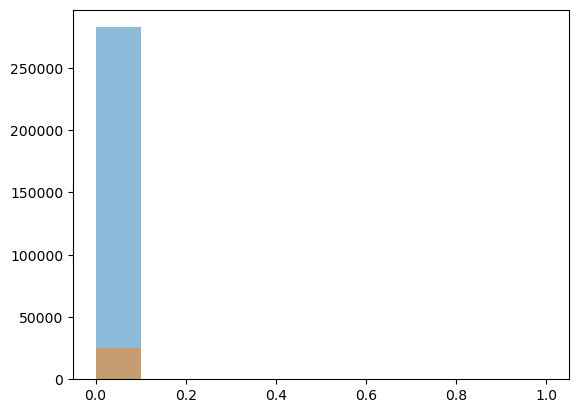

<Axes: xlabel='FLAG_DOCUMENT_17', ylabel='Density'>

<Axes: xlabel='FLAG_DOCUMENT_17', ylabel='Density'>

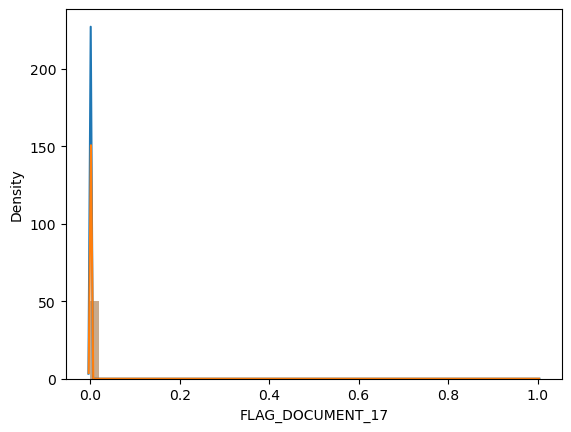

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_18


(array([280328.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   2358.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([24683.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   142.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

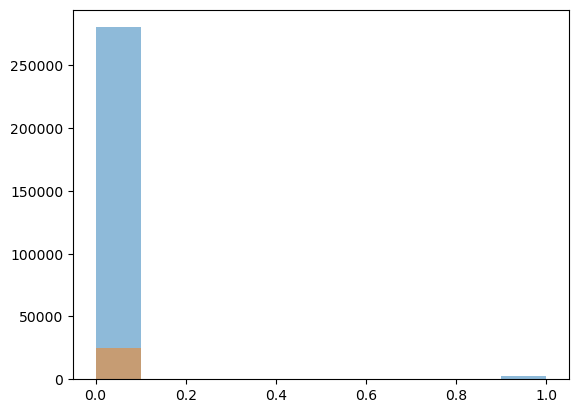

<Axes: xlabel='FLAG_DOCUMENT_18', ylabel='Density'>

<Axes: xlabel='FLAG_DOCUMENT_18', ylabel='Density'>

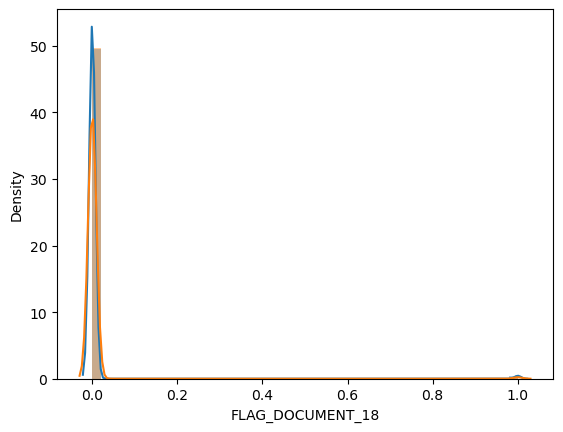

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_19


(array([2.82515e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.71000e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([2.4813e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.2000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

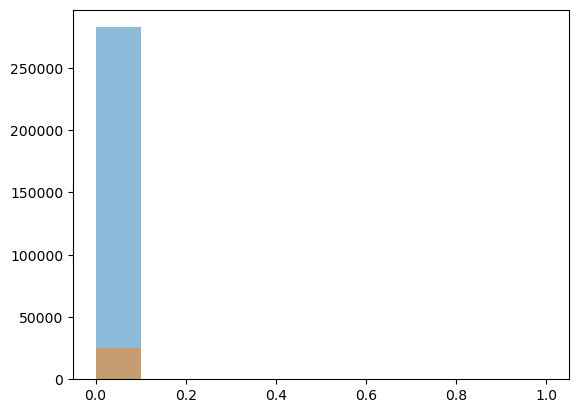

<Axes: xlabel='FLAG_DOCUMENT_19', ylabel='Density'>

<Axes: xlabel='FLAG_DOCUMENT_19', ylabel='Density'>

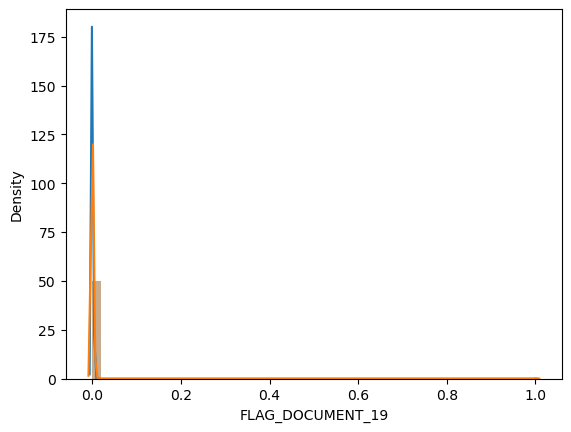

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_20


(array([2.82543e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.43000e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([2.4812e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.3000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

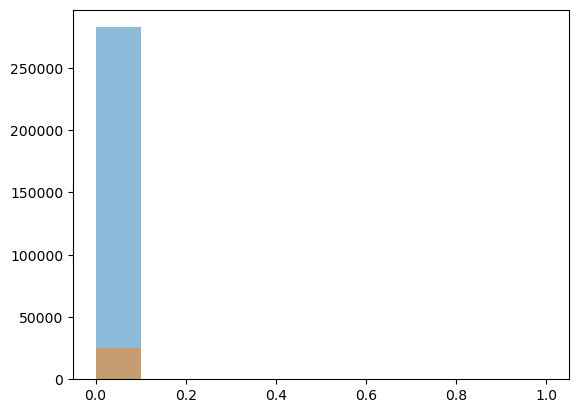

<Axes: xlabel='FLAG_DOCUMENT_20', ylabel='Density'>

<Axes: xlabel='FLAG_DOCUMENT_20', ylabel='Density'>

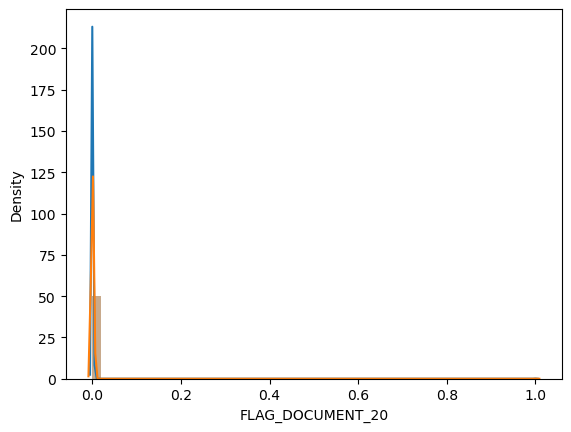

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_21


(array([2.82597e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 8.90000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([2.4811e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

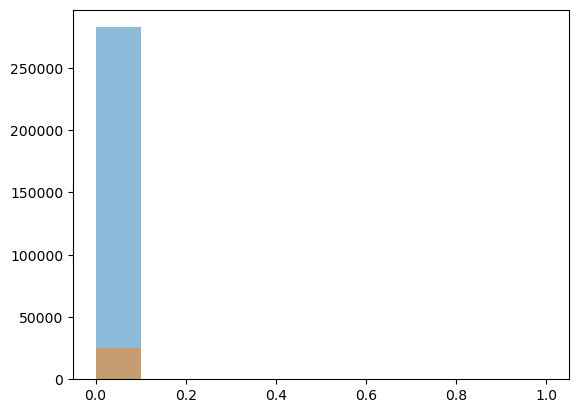

<Axes: xlabel='FLAG_DOCUMENT_21', ylabel='Density'>

<Axes: xlabel='FLAG_DOCUMENT_21', ylabel='Density'>

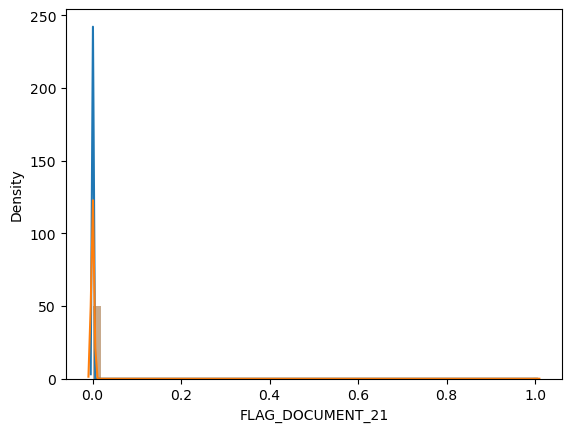

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_HOUR


(array([2.81191e+05, 0.00000e+00, 1.43500e+03, 0.00000e+00, 0.00000e+00,
        5.00000e+01, 0.00000e+00, 9.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

(array([2.4694e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.2500e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

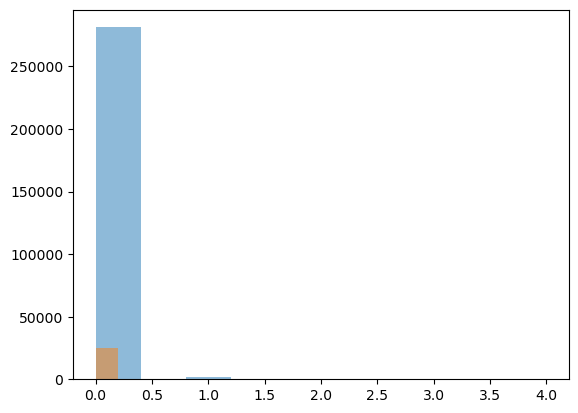

<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_HOUR', ylabel='Density'>

<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_HOUR', ylabel='Density'>

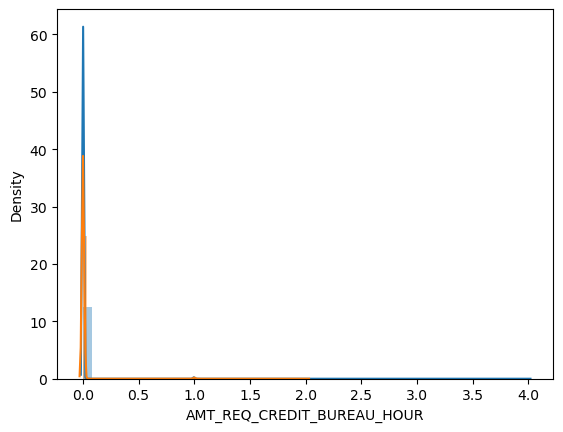

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_DAY


(array([2.81338e+05, 1.16700e+03, 9.50000e+01, 4.30000e+01, 2.30000e+01,
        9.00000e+00, 8.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

(array([2.4684e+04, 0.0000e+00, 1.2500e+02, 0.0000e+00, 0.0000e+00,
        1.1000e+01, 0.0000e+00, 2.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

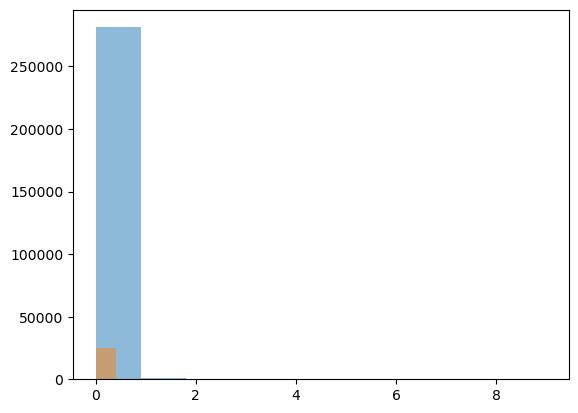

<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_DAY', ylabel='Density'>

<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_DAY', ylabel='Density'>

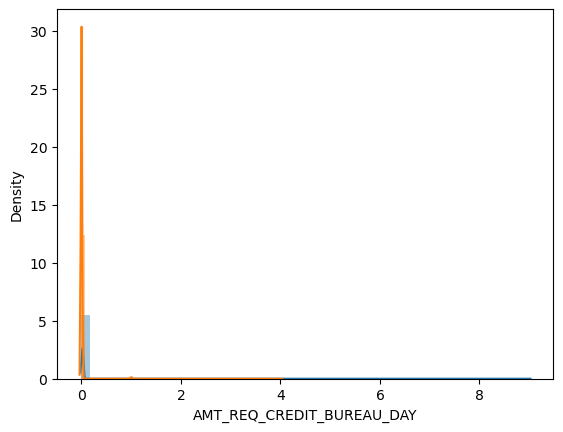

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_WEEK


(array([2.74818e+05, 7.57000e+03, 1.79000e+02, 5.40000e+01, 0.00000e+00,
        3.00000e+01, 9.00000e+00, 1.90000e+01, 2.00000e+00, 5.00000e+00]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

(array([2.4157e+04, 6.3800e+02, 0.0000e+00, 2.0000e+01, 0.0000e+00,
        4.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

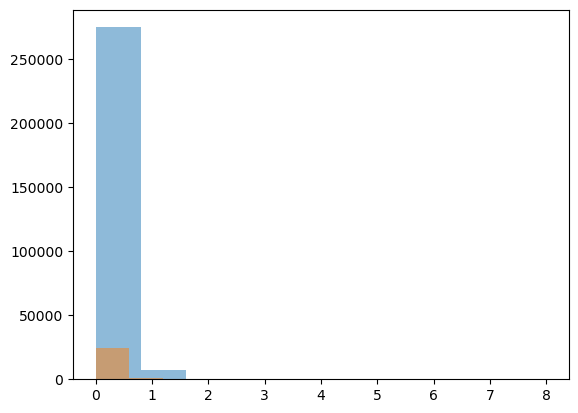

<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_WEEK', ylabel='Density'>

<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_WEEK', ylabel='Density'>

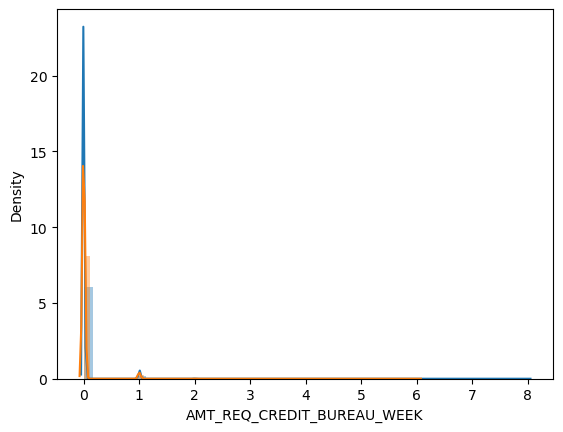

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_MON


(array([2.77739e+05, 3.46100e+03, 7.85000e+02, 3.19000e+02, 2.60000e+02,
        9.60000e+01, 1.90000e+01, 3.00000e+00, 3.00000e+00, 1.00000e+00]),
 array([ 0. ,  2.7,  5.4,  8.1, 10.8, 13.5, 16.2, 18.9, 21.6, 24.3, 27. ]),
 <BarContainer object of 10 artists>)

(array([2.4167e+04, 4.8700e+02, 1.0000e+02, 1.8000e+01, 2.3000e+01,
        1.9000e+01, 4.0000e+00, 4.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

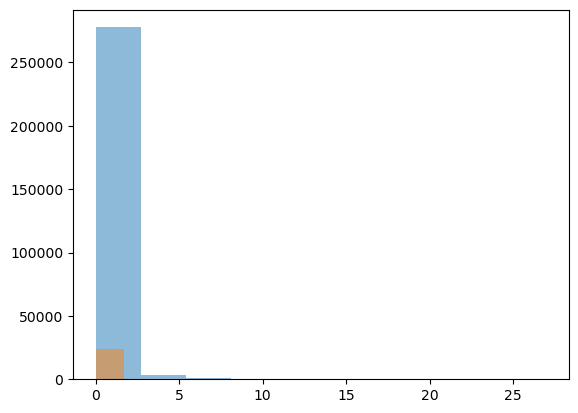

<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_MON', ylabel='Density'>

<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_MON', ylabel='Density'>

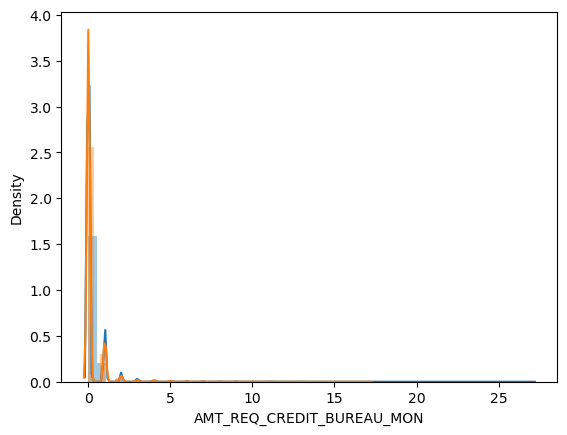

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_QRT


(array([2.82685e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  0. ,  26.1,  52.2,  78.3, 104.4, 130.5, 156.6, 182.7, 208.8,
        234.9, 261. ]),
 <BarContainer object of 10 artists>)

(array([2.3424e+04, 1.3290e+03, 6.3000e+01, 8.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

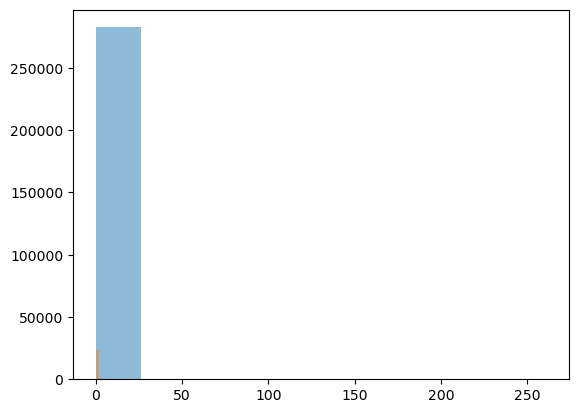

<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_QRT', ylabel='Density'>

<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_QRT', ylabel='Density'>

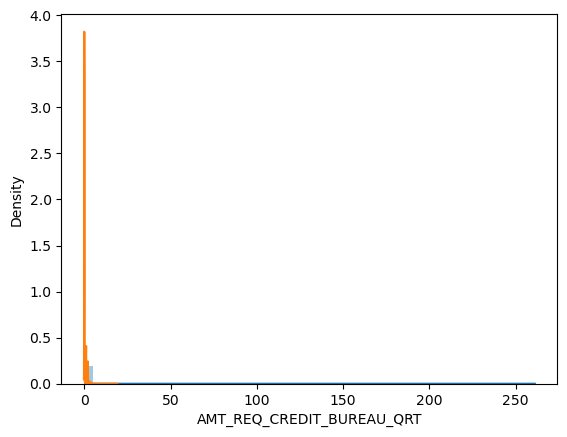

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_YEAR


(array([2.08784e+05, 4.99560e+04, 2.08970e+04, 2.92100e+03, 7.60000e+01,
        2.50000e+01, 1.50000e+01, 8.00000e+00, 2.00000e+00, 2.00000e+00]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <BarContainer object of 10 artists>)

(array([1.8133e+04, 4.3860e+03, 1.6350e+03, 5.3900e+02, 1.2200e+02,
        5.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <BarContainer object of 10 artists>)

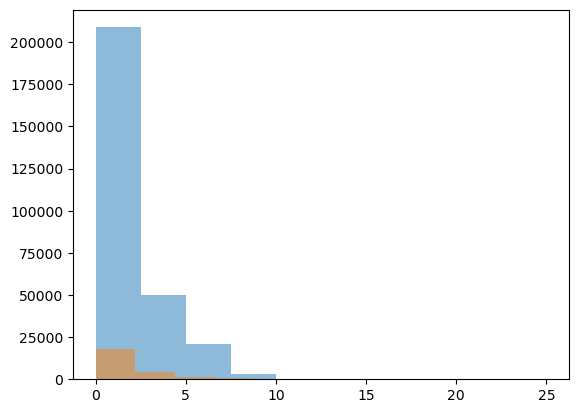

<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_YEAR', ylabel='Density'>

<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_YEAR', ylabel='Density'>

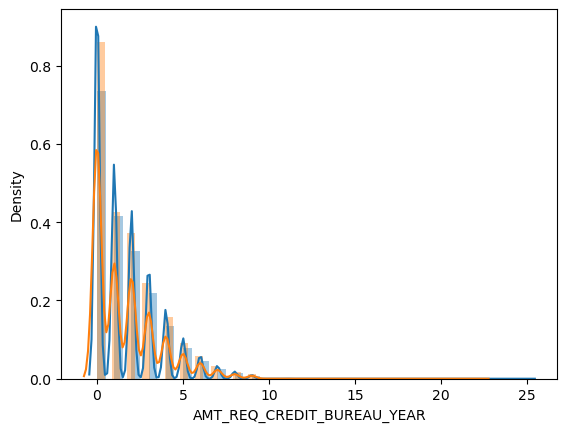

------------------------------------------------------------------------


In [183]:
for column in train_categorical:
    title = "Plot of "+column
    print(title)
    plt.hist(train_0[column], alpha=0.5, label='0')
    plt.hist(train_1[column], alpha=0.5, label='1')
    plt.show()
    
    sns.distplot(train_0[column].dropna(), label='0')
    sns.distplot(train_1[column].dropna(),  label='1')
    
    plt.show()
    #box_plot(train_0, train_1, column)
    print("------------------------------------------------------------------------")

In [184]:
def_r = app_df[app_df.TARGET == 1]
non_def = app_df[app_df.TARGET == 0]

<Figure size 1000x1000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Distribution based on Gender of applicants for Defaulters\nTarget = 1')

<Axes: title={'center': 'Distribution based on Gender of applicants for Defaulters\nTarget = 1'}, ylabel='count'>

<Axes: >

Text(0.5, 1.0, '\nDistribution based Gender on applicants for Non-Defaulters\nTarget = 0')

<Axes: title={'center': '\nDistribution based Gender on applicants for Non-Defaulters\nTarget = 0'}, ylabel='count'>

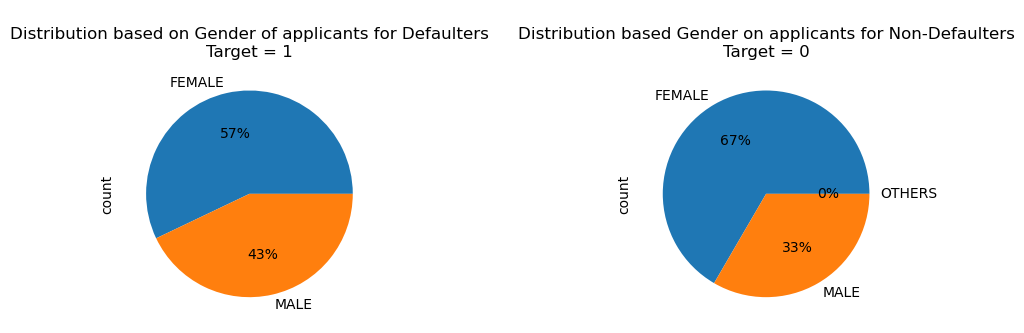

In [185]:
plt.figure(figsize = [10,10])
plt.subplot(1,2,1)
plt.title("Distribution based on Gender of applicants for Defaulters\nTarget = 1")
def_r.CODE_GENDER.value_counts().plot.pie(autopct='%1.f%%', labels = ['FEMALE','MALE','OTHERS'])

plt.subplots_adjust(wspace = 1)
plt.subplot(1,2,2)
plt.title("\nDistribution based Gender on applicants for Non-Defaulters\nTarget = 0")
non_def.CODE_GENDER.value_counts().plot.pie(autopct='%1.f%%', labels = ['FEMALE','MALE','OTHERS'])

plt.show()

Observation:

1. Close to 60% of the applicants are Females in Defaulters
2. Close to 70% of the applicants are Females in Non-Defaulters

<Figure size 1500x500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Count of applicants based on Occupation of applicants for Defaulters\nTarget = 1')

<Axes: title={'center': 'Count of applicants based on Occupation of applicants for Defaulters\nTarget = 1'}, xlabel='count', ylabel='OCCUPATION_TYPE'>

<Axes: >

Text(0.5, 1.0, 'Count of applicants based on Occupation of applicants for Non-Defaulters\nTarget = 0')

<Axes: title={'center': 'Count of applicants based on Occupation of applicants for Non-Defaulters\nTarget = 0'}, xlabel='count', ylabel='OCCUPATION_TYPE'>

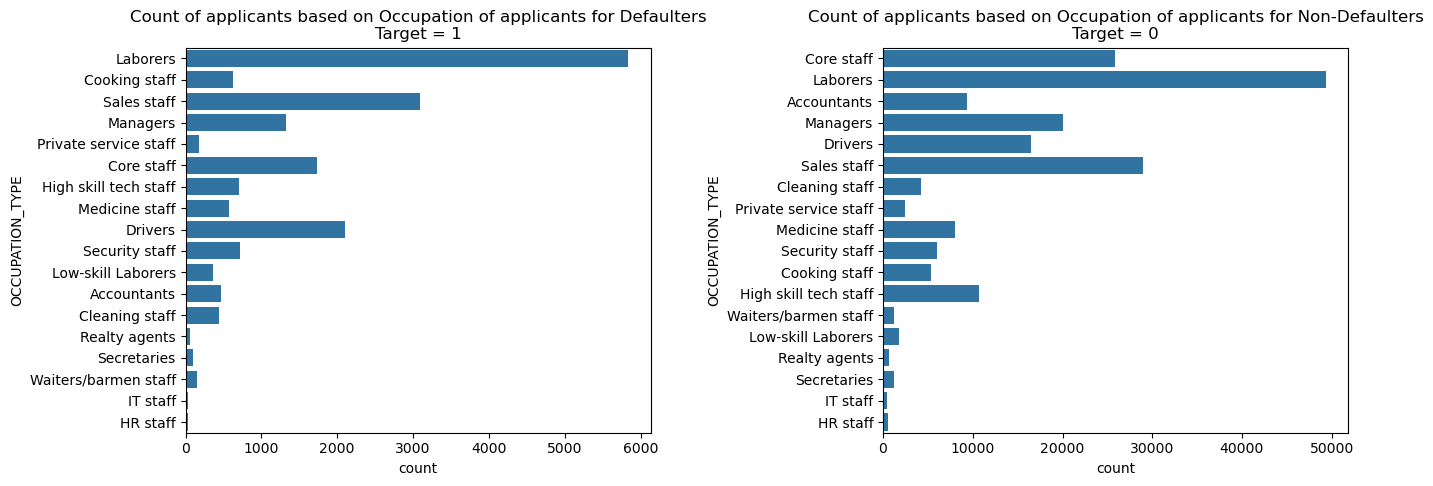

In [186]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
plt.title("Count of applicants based on Occupation of applicants for Defaulters\nTarget = 1")
sns.countplot(y = def_r.OCCUPATION_TYPE)

plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,2)
plt.title("Count of applicants based on Occupation of applicants for Non-Defaulters\nTarget = 0")
sns.countplot(y = non_def.OCCUPATION_TYPE)
plt.show()

Occupation of most of the applicants is Labourer and next to them are Sales staff

<Figure size 1500x500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Count of applicants based on Income Type of applicants for Defaulters\nTarget = 1')

<Axes: title={'center': 'Count of applicants based on Income Type of applicants for Defaulters\nTarget = 1'}, xlabel='count', ylabel='NAME_INCOME_TYPE'>

<Axes: >

Text(0.5, 1.0, 'Count of applicants based on Income Typen of applicants for Non-Defaulters\nTarget = 0')

<Axes: title={'center': 'Count of applicants based on Income Typen of applicants for Non-Defaulters\nTarget = 0'}, xlabel='count', ylabel='NAME_INCOME_TYPE'>

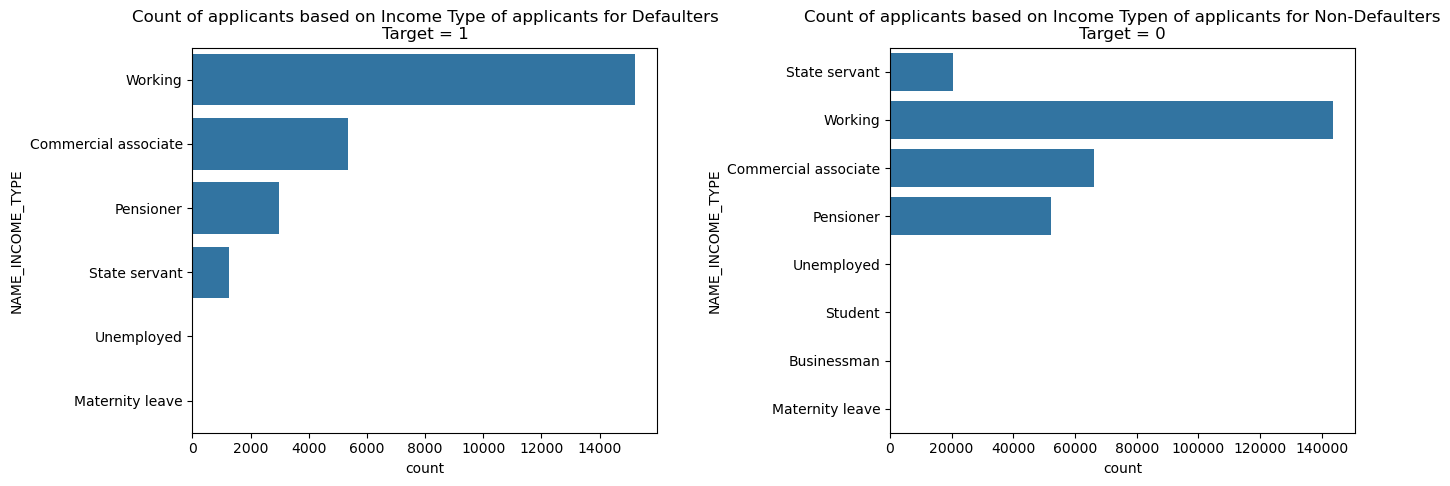

In [187]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
plt.title("Count of applicants based on Income Type of applicants for Defaulters\nTarget = 1")
sns.countplot(y = def_r.NAME_INCOME_TYPE)

plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,2)
plt.title("Count of applicants based on Income Typen of applicants for Non-Defaulters\nTarget = 0")
sns.countplot(y = non_def.NAME_INCOME_TYPE)
plt.show()

Observations:

1. From the above graph, we can notice that the students are falling in non-defaulters. The reason could be they are not required to pay during their college tenure.

2. Most of the loans are distributed to working class people

3. Pensioners are also good in number for applying loans and mostly they are non-defaulters as we can see in plots

<Figure size 1800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Education of applicants for Defaulters\nTarget = 1')

<Axes: title={'center': 'Education of applicants for Defaulters\nTarget = 1'}, xlabel='count', ylabel='NAME_EDUCATION_TYPE'>

<Axes: >

Text(0.5, 1.0, 'Education of applicants for for Non-Defaulters\nTarget = 0')

<Axes: title={'center': 'Education of applicants for for Non-Defaulters\nTarget = 0'}, xlabel='count', ylabel='NAME_EDUCATION_TYPE'>

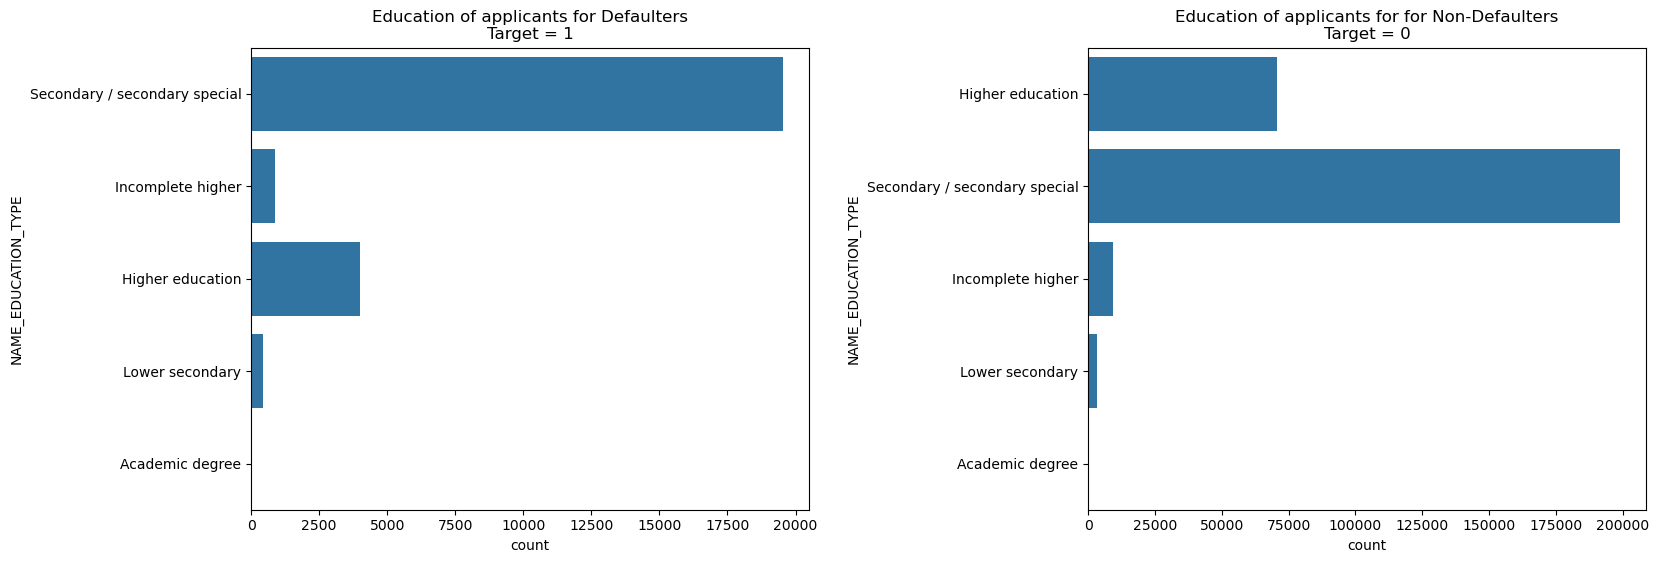

In [188]:
plt.figure(figsize = [18,6])
plt.subplot(1,2,1)
plt.title("Education of applicants for Defaulters\nTarget = 1")
sns.countplot(y = def_r.NAME_EDUCATION_TYPE)

plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,2)
plt.title("Education of applicants for for Non-Defaulters\nTarget = 0")
sns.countplot(y = non_def.NAME_EDUCATION_TYPE)
plt.show()

Observations:

1 Most of the the applicants have completed Secondary Education in both defaulter and non-defaulter categories
2 Many of the the applicants have completed Higher Education in both defaulter and non-defaulter categories
3 Academic degree holders are almost neglible in number in both defaulter and non-defaulter categories

<Figure size 1800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Family Status of applicants for Defaulters\nTarget = 1')

<Axes: title={'center': 'Family Status of applicants for Defaulters\nTarget = 1'}, xlabel='count', ylabel='NAME_FAMILY_STATUS'>

<Axes: >

Text(0.5, 1.0, 'Family Status of applicants for for Non-Defaulters\nTarget = 0')

<Axes: title={'center': 'Family Status of applicants for for Non-Defaulters\nTarget = 0'}, xlabel='count', ylabel='NAME_FAMILY_STATUS'>

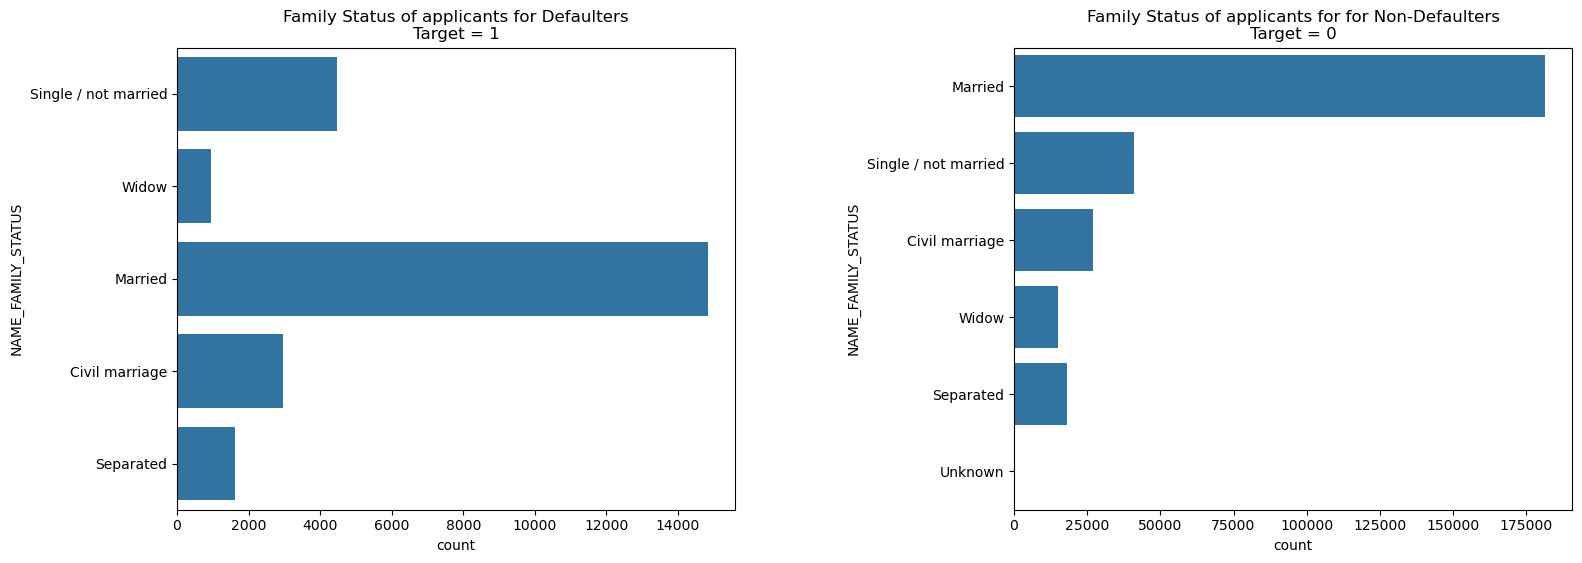

In [189]:
plt.figure(figsize = [18,6])
plt.subplot(1,2,1)
plt.title("Family Status of applicants for Defaulters\nTarget = 1")
sns.countplot(y = def_r.NAME_FAMILY_STATUS)

plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,2)
plt.title("Family Status of applicants for for Non-Defaulters\nTarget = 0")
sns.countplot(y = non_def.NAME_FAMILY_STATUS)
plt.show()

Observations:

1. Most of the applicants are married

2. Next to married, 2nd highest applicants are Single/Non-married

3. Most of the applicants are married in both defaulter and non-defaulter categories


<Figure size 1500x500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Applicants Own Car for Defaulters\nTarget = 1')

<Axes: title={'center': 'Applicants Own Car for Defaulters\nTarget = 1'}, xlabel='count', ylabel='FLAG_OWN_CAR'>

<Axes: >

Text(0.5, 1.0, 'Applicants Own Car for Non-Defaulters\nTarget = 0')

<Axes: title={'center': 'Applicants Own Car for Non-Defaulters\nTarget = 0'}, xlabel='count', ylabel='FLAG_OWN_CAR'>

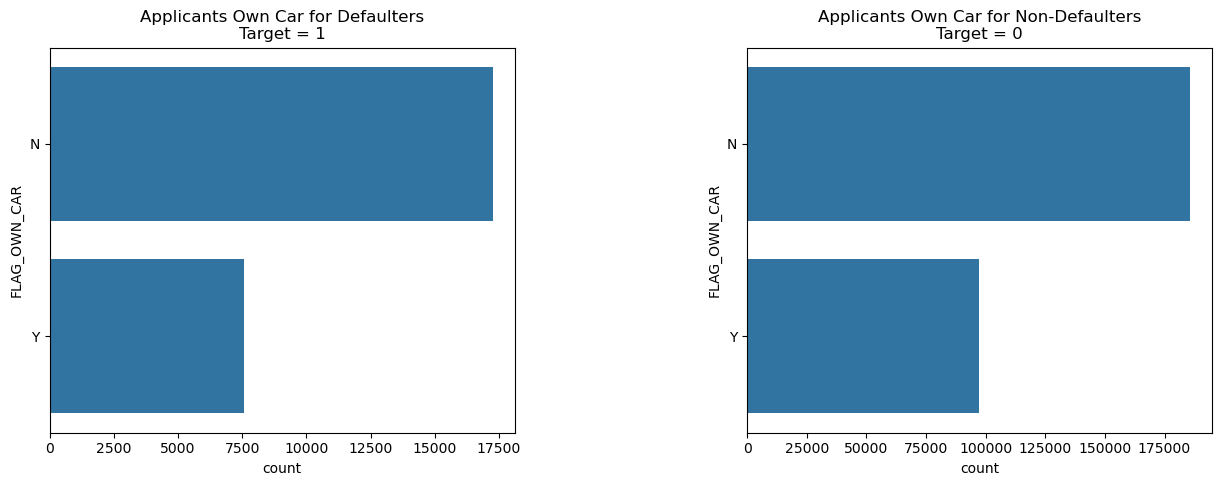

In [190]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
plt.title("Applicants Own Car for Defaulters\nTarget = 1")
sns.countplot(y = def_r.FLAG_OWN_CAR)

plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,2)
plt.title("Applicants Own Car for Non-Defaulters\nTarget = 0")
sns.countplot(y = non_def.FLAG_OWN_CAR)
plt.show()

Observations:

1. Most of the applicants don't own a car

2. It can be seen that people with cars contribute almost same to the non-defaulters and defaulters. 
We can conclude that the number of default of people having car is low compared to people who don't.

<Figure size 1500x500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Applicants Own House for Defaulters\nTarget = 1')

<Axes: title={'center': 'Applicants Own House for Defaulters\nTarget = 1'}, xlabel='count', ylabel='FLAG_OWN_REALTY'>

<Axes: >

Text(0.5, 1.0, 'Applicants Own House for Non-Defaulters\nTarget = 0')

<Axes: title={'center': 'Applicants Own House for Non-Defaulters\nTarget = 0'}, xlabel='count', ylabel='FLAG_OWN_REALTY'>

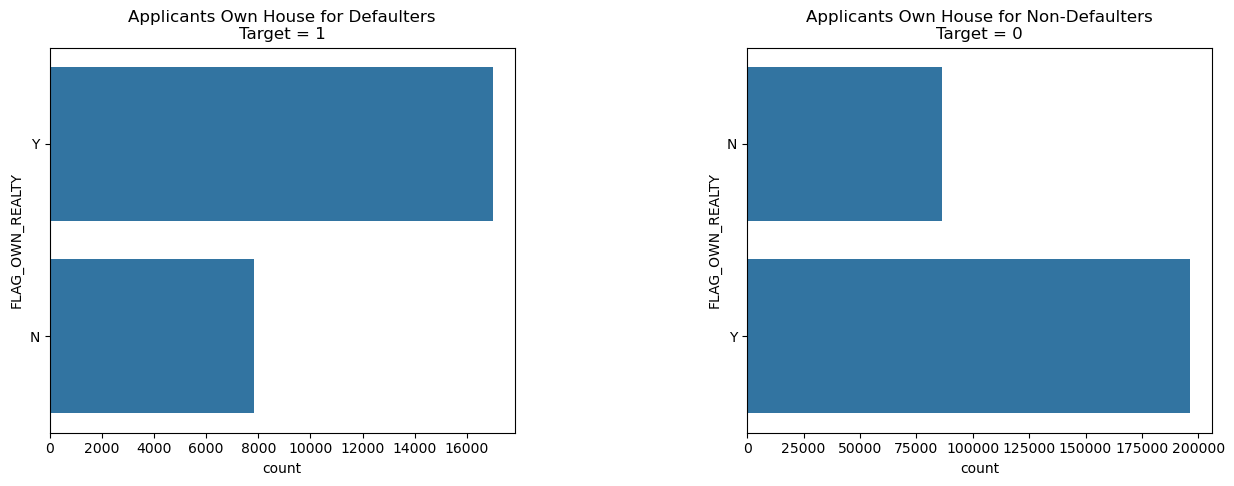

In [191]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
plt.title("Applicants Own House for Defaulters\nTarget = 1")
sns.countplot(y = def_r.FLAG_OWN_REALTY)

plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,2)
plt.title("Applicants Own House for Non-Defaulters\nTarget = 0")
sns.countplot(y = non_def.FLAG_OWN_REALTY)
plt.show()

Observation:

Most of the applicants are home owners in both Defaulters and Non-Defaulters

<Figure size 1500x500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Applicants HOUSING TYPE for Defaulters\nTarget = 1')

<Axes: title={'center': 'Applicants HOUSING TYPE for Defaulters\nTarget = 1'}, xlabel='count', ylabel='NAME_HOUSING_TYPE'>

<Axes: >

Text(0.5, 1.0, 'Applicants HOUSING TYPE  for Non-Defaulters\nTarget = 0')

<Axes: title={'center': 'Applicants HOUSING TYPE  for Non-Defaulters\nTarget = 0'}, xlabel='count', ylabel='NAME_HOUSING_TYPE'>

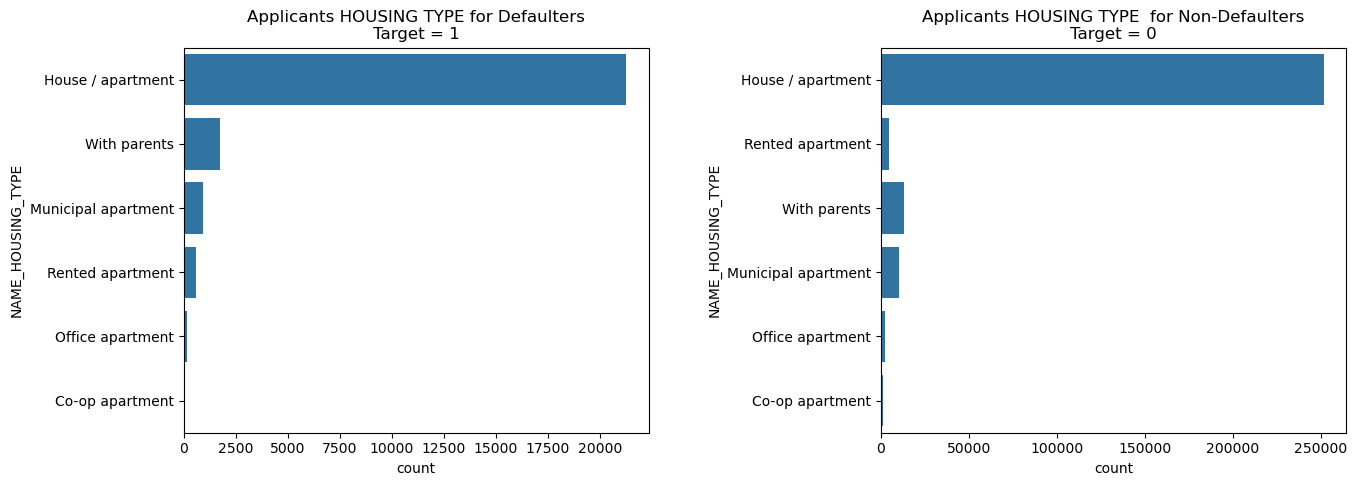

In [192]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
plt.title("Applicants HOUSING TYPE for Defaulters\nTarget = 1")
sns.countplot(y = def_r.NAME_HOUSING_TYPE)

plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,2)
plt.title("Applicants HOUSING TYPE  for Non-Defaulters\nTarget = 0")
sns.countplot(y = non_def.NAME_HOUSING_TYPE)
plt.show()

Observations:

1. Most of the applicants who own a house are non-defaulters and who don't own a house are defaulters. Its a very interesting trend here. We can say that applicants who own a house are tend to be non-defaulters

<Figure size 2000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Distribution of applicants as per Amount Goods Price for defaulters\nTarget = 0')

<Axes: title={'center': 'Distribution of applicants as per Amount Goods Price for defaulters\nTarget = 0'}, ylabel='AMT_GOODS_PRICE'>

<Axes: >

Text(0.5, 1.0, 'Distribution of applicants as per Amount Goods Price for non-defaulters\nTarget = 1')

<Axes: title={'center': 'Distribution of applicants as per Amount Goods Price for non-defaulters\nTarget = 1'}, ylabel='AMT_GOODS_PRICE'>

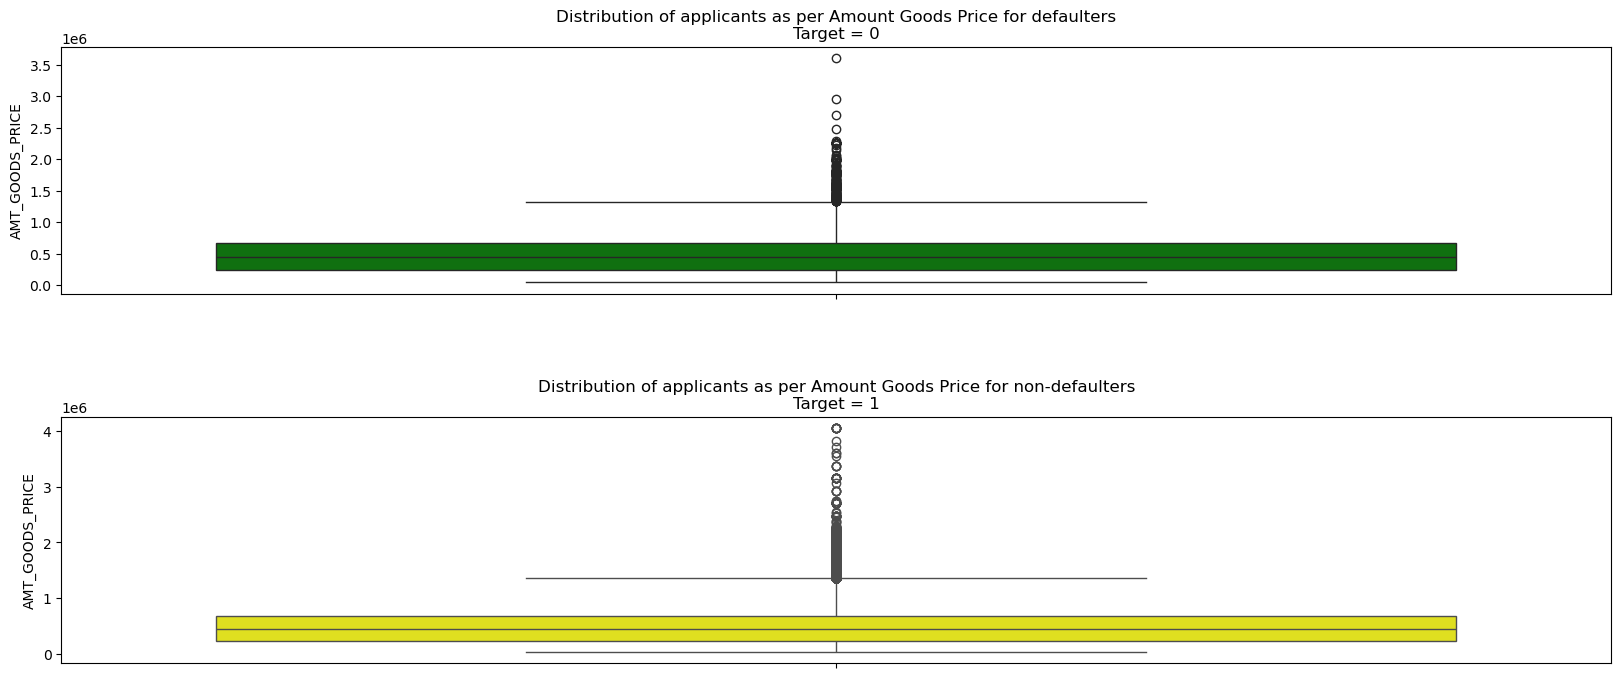

In [193]:
plt.figure(figsize = [20, 8])

plt.subplot(2, 1, 1)
plt.title("Distribution of applicants as per Amount Goods Price for defaulters\nTarget = 0")
sns.boxplot(def_r.AMT_GOODS_PRICE, color = 'green')

plt.subplots_adjust(hspace = 0.5)
plt.subplot(2, 1, 2)
plt.title("Distribution of applicants as per Amount Goods Price for non-defaulters\nTarget = 1")
sns.boxplot(non_def.AMT_GOODS_PRICE, color = 'yellow')
plt.show()

# Reading previous_application dataset

In [194]:
previous_application = pd.read_csv(r'E:\upGrad & IIITB  Data Science Program\Credit EDA Case Study Assignment\Case Study data\previous_application.csv')
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [195]:
# Shape of previous application
previous_application.shape

(1670214, 37)

In [196]:
# Number of unique id in previous application
previous_application.SK_ID_PREV.value_counts()

SK_ID_PREV
2030495    1
1035848    1
1526498    1
2148893    1
2437429    1
          ..
2811649    1
1221292    1
2780117    1
2194001    1
2418762    1
Name: count, Length: 1670214, dtype: int64

In [197]:
# Number of unique id in previous application
previous_application.SK_ID_CURR.value_counts()

SK_ID_CURR
187868    77
265681    73
173680    72
242412    68
206783    67
          ..
135285     1
311960     1
427136     1
241434     1
191629     1
Name: count, Length: 338857, dtype: int64

Merging both application

In [198]:
prev_df = app_df.merge(previous_application, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [199]:
prev_df.shape

(1413701, 117)

In [200]:
prev_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0        24700.5           351000.0     Unaccompanied          Working   
1        35698.5          1129500.0            Family    State servant   
2        35698.5          1129500.0            Family    State servant   
3        35698.5          1129500.0            Family    State servant   
4         6750.0           135000.0     Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.003541      -16765          -1188            -1186.0   
3                    0.003541      -16765          -1188            -1186.0   
4                    0.010032      -19046           -225            -4260.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2             -291           1               1                0   
3             -291           1               1                0   
4            -2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0      Core staff              2.0   
3                 1           1           0      Core staff              2.0   
4                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                  

In [201]:
previous_application.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

In [202]:
previous_application.SK_ID_CURR.value_counts().head()

SK_ID_CURR
187868    77
265681    73
173680    72
242412    68
206783    67
Name: count, dtype: int64

In [203]:
train_0 = app_df.loc[app_df['TARGET'] == 0]
train_1 = app_df.loc[app_df['TARGET'] == 1]

In [204]:
ptrain_0 = prev_df.loc[prev_df['TARGET'] == 0]
ptrain_1 = prev_df.loc[prev_df['TARGET'] == 1]

In [205]:
def plotting(column, hue):
    col = column
    hue = hue
    fig = plt.figure(figsize=(13,10))

    ax1 = plt.subplot(221)
    app_df[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)


    ax2 = plt.subplot(222)
    df = pd.DataFrame()
    df['0']= ((train_0[col].value_counts())/len(train_0))
    df['1']= ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax2)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    sns.countplot(x=col, hue=hue, data=ptrain_0, ax = ax3)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=0 in terms of percentage')

    ax4 = plt.subplot(224)
    sns.countplot(x=col, hue=hue, data=ptrain_1, ax = ax4)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=1 in terms of percentage')



    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()

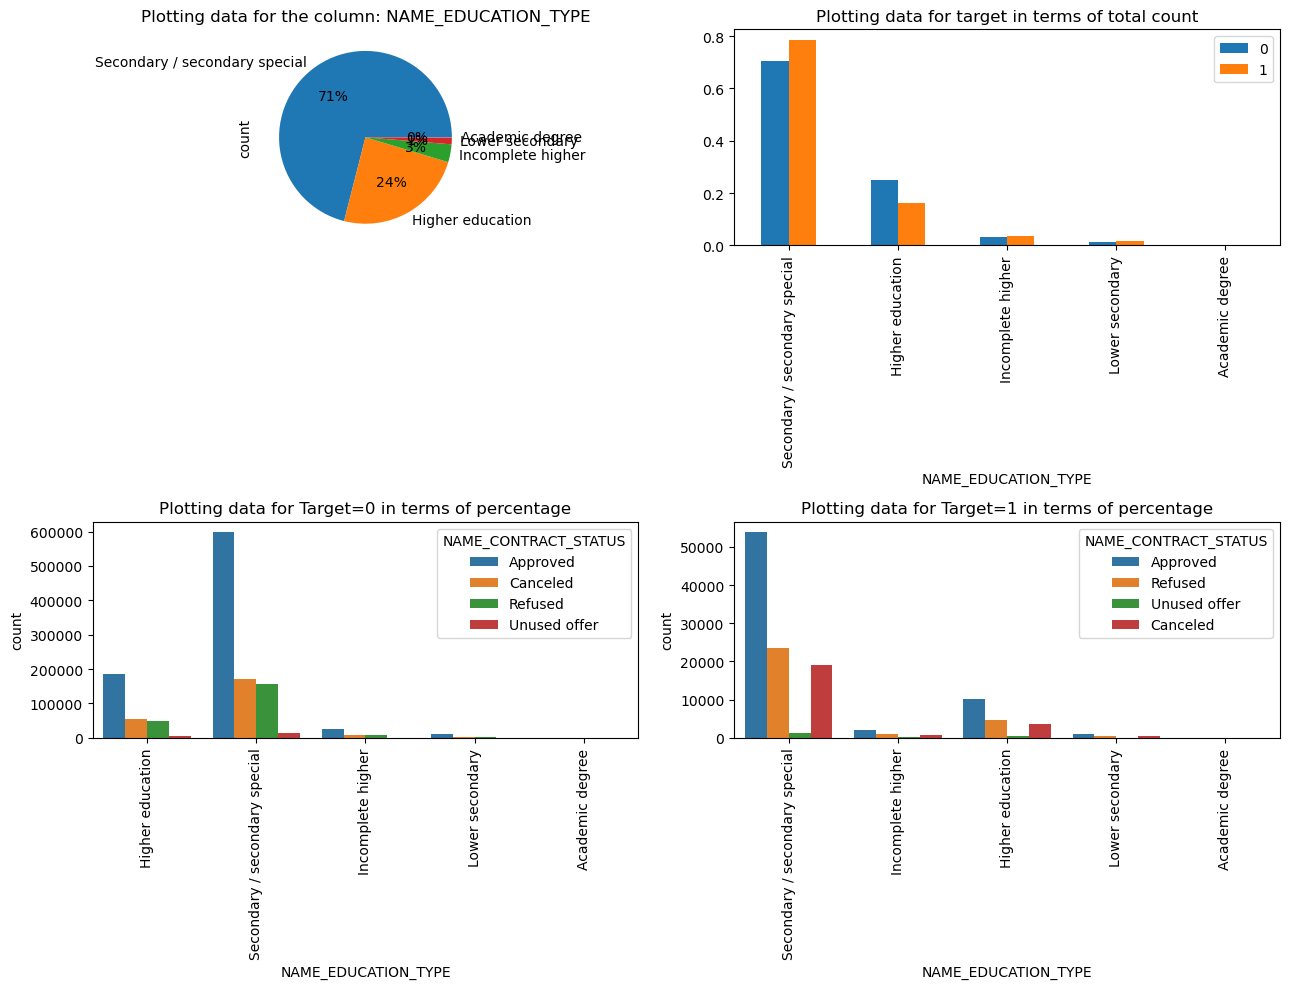

In [206]:
plotting('NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS') 

Observations:

1. Most of the applicants have completed Secondary Education in both defaulter and non-defaulter categories
2. Many of the applicants have completed Higher Education in both defaulter and non-defaulter categories
3. Academic degree holders are almost neglible in number in both defaulter and non-defaulter categories

<Figure size 2000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, "Bivariate Analysis between 'AMT_CREDIT' & 'AMT_GOODS_PRICE' for Defaulters\nTarget = 1")

<Axes: title={'center': "Bivariate Analysis between 'AMT_CREDIT' & 'AMT_GOODS_PRICE' for Defaulters\nTarget = 1"}, xlabel='AMT_CREDIT', ylabel='AMT_GOODS_PRICE'>

<Axes: >

Text(0.5, 1.0, "Bivariate Analysis between 'AMT_CREDIT' & 'AMT_GOODS_PRICE' for Non-Defaulters\nTarget = 0")

<Axes: title={'center': "Bivariate Analysis between 'AMT_CREDIT' & 'AMT_GOODS_PRICE' for Non-Defaulters\nTarget = 0"}, xlabel='AMT_CREDIT', ylabel='AMT_GOODS_PRICE'>

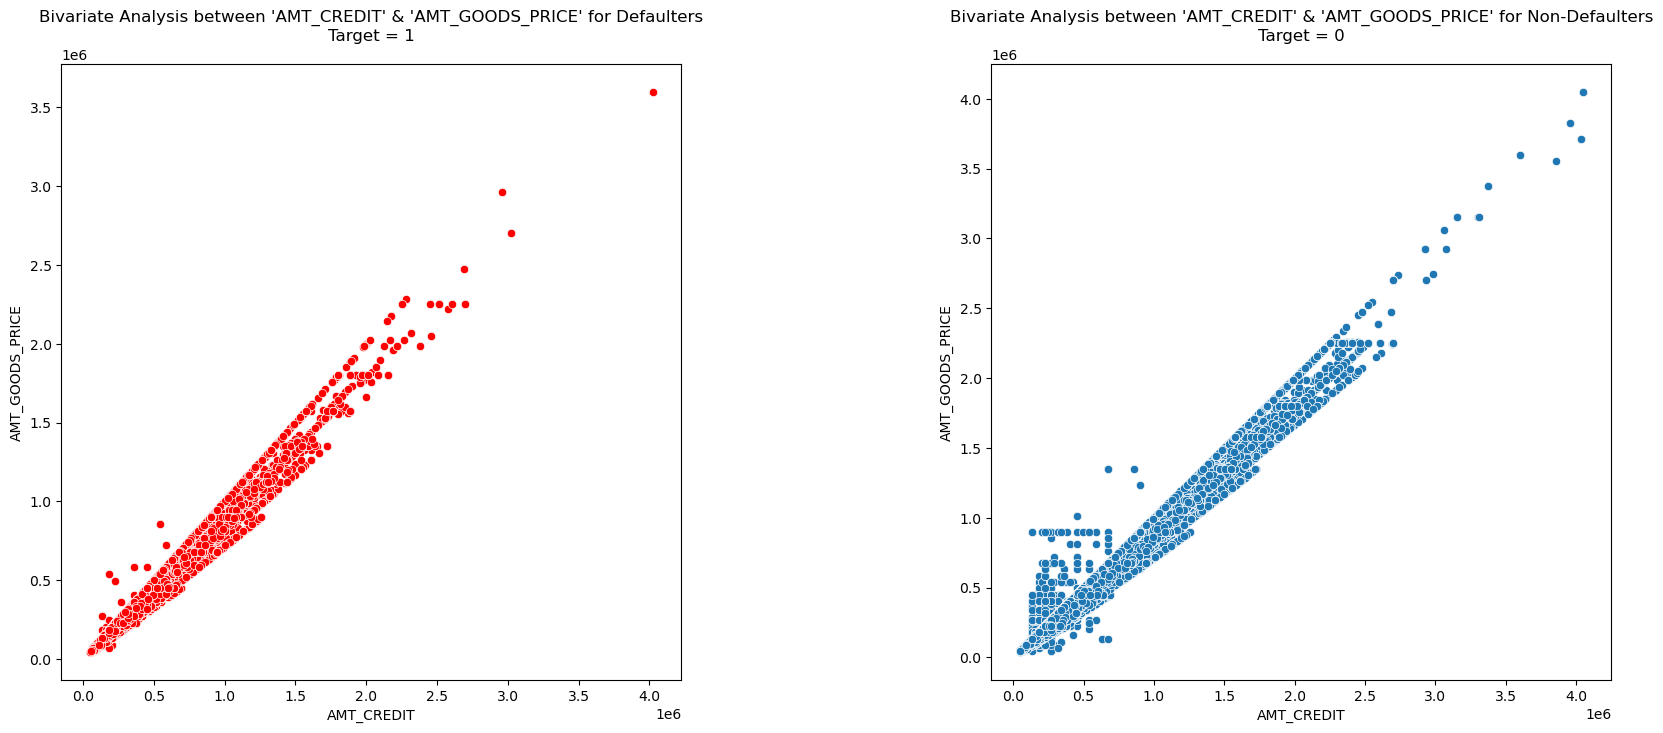

In [209]:
plt.figure(figsize = [20, 8])

plt.subplot(1,2,1)
plt.title("Bivariate Analysis between 'AMT_CREDIT' & 'AMT_GOODS_PRICE' for Defaulters\nTarget = 1")
sns.scatterplot(x = 'AMT_CREDIT', y = 'AMT_GOODS_PRICE', data = def_r, color = 'red')

plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,2)
plt.title("Bivariate Analysis between 'AMT_CREDIT' & 'AMT_GOODS_PRICE' for Non-Defaulters\nTarget = 0")
sns.scatterplot(x = 'AMT_CREDIT', y = 'AMT_GOODS_PRICE', data = non_def)
plt.show()

Amount Credit and Amount of Good price are showing same trend and which is mostly true as credit amount may be same or less than goods price

<Figure size 2000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, "Bivariate Analysis between 'AMT_CREDIT' & 'AMT_ANNUITY' for Defaulters\nTarget = 1")

<Axes: title={'center': "Bivariate Analysis between 'AMT_CREDIT' & 'AMT_ANNUITY' for Defaulters\nTarget = 1"}, xlabel='AMT_CREDIT', ylabel='AMT_ANNUITY'>

<Axes: >

Text(0.5, 1.0, "Bivariate Analysis between 'AMT_CREDIT' & 'AMT_ANNUITY' for Non-Defaulters\nTarget = 0")

<Axes: title={'center': "Bivariate Analysis between 'AMT_CREDIT' & 'AMT_ANNUITY' for Non-Defaulters\nTarget = 0"}, xlabel='AMT_CREDIT', ylabel='AMT_ANNUITY'>

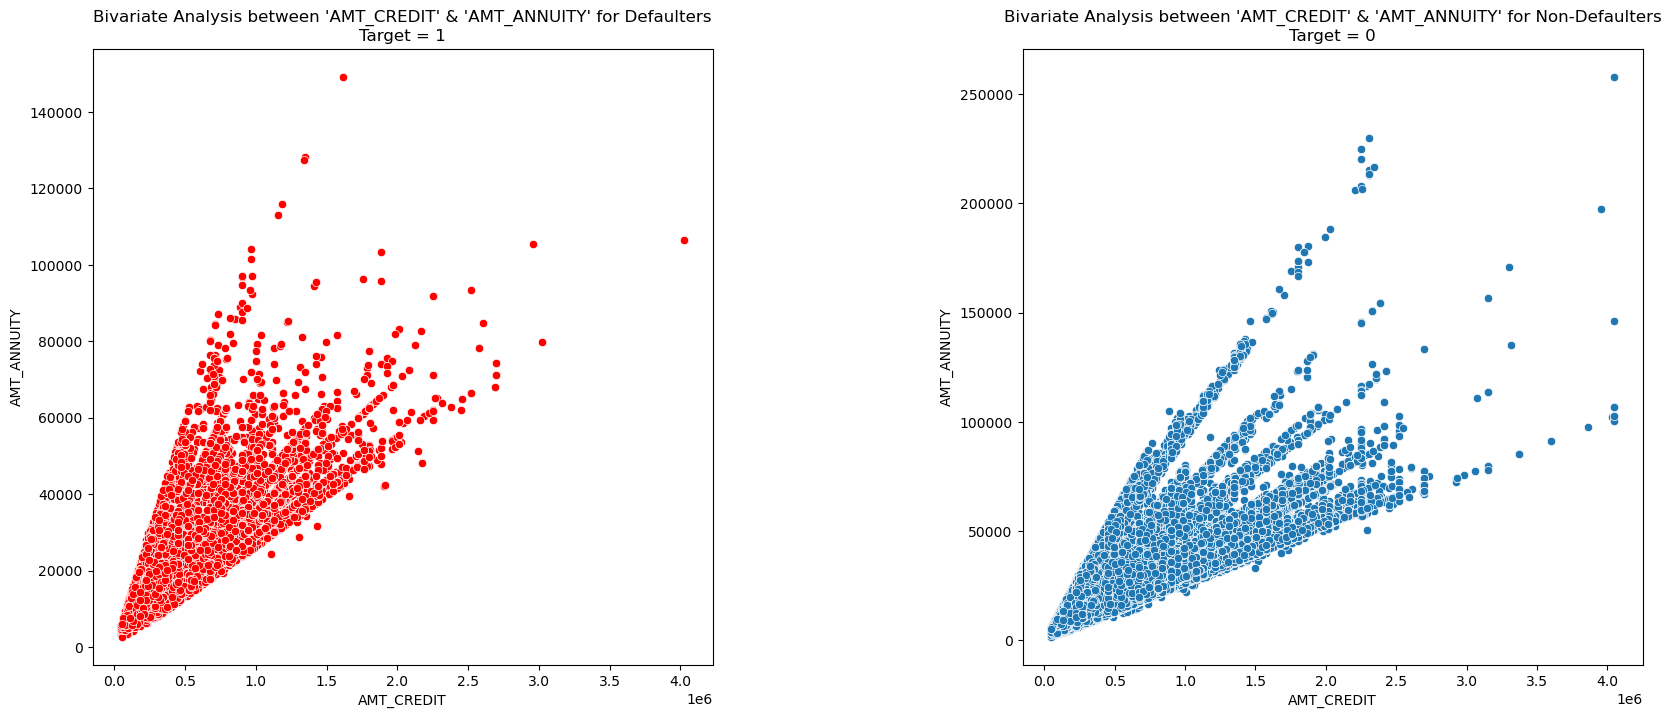

In [210]:
plt.figure(figsize = [20, 8])
plt.subplot(1,2,1)
plt.title("Bivariate Analysis between 'AMT_CREDIT' & 'AMT_ANNUITY' for Defaulters\nTarget = 1")
sns.scatterplot(x = 'AMT_CREDIT', y = 'AMT_ANNUITY', data = def_r, color = 'red')

plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,2)
plt.title("Bivariate Analysis between 'AMT_CREDIT' & 'AMT_ANNUITY' for Non-Defaulters\nTarget = 0")
sns.scatterplot(x = 'AMT_CREDIT', y = 'AMT_ANNUITY', data = non_def)
plt.show()

Amount_Credit and Amount_Annuity both are showing similar trend.